In [4]:
import  regex as re


#opening file
f  = open("gemma.fasta","r")
g = f.read()

#the forward file 
hola = g.replace("\n", "")

# print(hola)


#creating the reverse file
def complement_function(hola):
    l2 = list(hola)
    l3 = []

    for i in l2:
        if i == "A":
            l3.append("T")
        if i == "T":
            l3.append("A")
        if i == "G":
            l3.append("C")
        if i == "C":
            l3.append("G")
        if i == "N":
            l3.append("N")
    reverse = ""
    reverse = reverse.join(l3)
    return(reverse)
reverse = complement_function(hola)


# print(reverse)


def reverse_function(left1):
    llist = list(left1)
    lrlist = []


    for i in range(len(llist)):
        lrlist.append(llist[len(llist)-i -1])
    rvrse = ""
    reverse = rvrse.join(lrlist)
    return(reverse)


reverse= reverse_function(hola)

In [13]:
sml = list(hola)
smll = ""
small = smll.join(sml[0:1000])
print(small)

AGAATTCGTCTTGCTCTATTCACCCTTACTTTTCTTCTTGCCCGTTCTCTTTCTTAGTATGAATCCAGTATGCCTGCCTGTAATTGTTGCGCCCTACCTCTTTTGGCTGGCGGCTATTGCCGCCTCGTGTTTCACGGCCTCAGTTAGTACCGTTGTGACCGCCACCGGCTTGGCCCTCTCACTTCTACTCTTGGCAGCAGTGGCCAGCTCATATGCCGCTGCACAAAGGAAACTGCTGACACCGGTGACAGTGCTTACTGCGGTTGTCACTTGTGAGTACACACGCACCATTTACAATGCATGATGTTCGTGAGATTGATCTGTCTCTAACAGTTCACTTCCTCTGCTTTTCTCCTCAGTCTTTGCAATTTGCCTAACATGGAGGATTGAGGACCCACCTTTTAATTCTCTTCTGTTTGCATTGCTGGCCGCAGCTGGCGGACTACAAGGCATTTACGGTTAGTGTGCCTCTGTTATGAAATGCAGGTTTGACTTCATATGTATGCCTTGGCATGACGTCAACTTTACTTTTATTTCAGTTCTGGTGATGCTTGTGCTCCTGATACTAGCGTACAGAAGGAGATGGCGCCGTTTGACTGTTTGTGGCGGCATCATGTTTTTGGCATGTGTACTTGTCCTCATCGTCGACGCTGTTTTGCAGCTGAGTCCCCTCCTTGGAGCTGTAACTGTGGTTTCCATGACGCTGCTGCTACTGGCTTTCGTCCTCTGGCTCTCTTCGCCAGGGGGCCTAGGTACTCTTGGTGCAGCCCTTTTAACATTGGCAGCAGGTAAGCCACACGTGTGACATTGCTTGCCTTTTTGCCACATGTTTTCTGGACACAGGACTAACCATGCCATCTCTGATTATAGCTCTGGCACTGCTAGCGTCACTGATTTTGGGCACACTTAACTTGACTACAATGTTCCTTCTCATGCTCCTATGGACACTTGGTAAGTTTTCCCTTCCTTTAACTCATTACTTGTTCTTTTGTAATCGCAG

In [5]:
print(reverse_function(left1))
print(reverse_function(right1))

CCACGACNN
CNNNGACAGG


In [ ]:
#test cells for verification numbers

from datetime import datetime
import pandas as pd

################Parameter to enter######################

 #name of dataframe
dfname = pd.DataFrame()
out = "FLRf.csv" #name of out csv file
infile = hola #name of infile
left1=  "NNCAGCACCN" #name of left half to search
right1= "NGGACAGNNNC" #name of right half to search

######################For official use only########################################


df1 = pd.DataFrame(columns = ['section','mismatch', 'seq_len','start', 'end', 'consensus', 'query','motif', 'mis1', 'mis2' ])

start_time =  datetime.now().time() # time object


#forward search
# left1=  "NNCAGCACC" #name of left half to search
# right1= "GGACAGNNNC" #name of right half to search


N = "[ATGC]"

left2 = list( left1)
right2 = list(right1)

counter = 1
hit = 0
sxnlist = ['left','right', 'full']
for i in sxnlist:
    
    section = i
    if i == 'left':
        query = left2 
        condition = ((j not in [1,2]) and (n not in [1,2]))
    elif i == 'right':
        query = right2 
        condition = ((j not in [len(query)-2, len(query)-3, len(query)-4]) and
                     (n not in [len(query)-2, len(query)-3, len(query)-4]))
    elif i== "full":
        query = left2 + right2
        condition = ((j not in [1,2]) and (n not in [1,2])
                    and (j not in [len(query)-2, len(query)-3, len(query)-4]) 
                    and (n not in [len(query)-2, len(query)-3, len(query)-4]))
    query1 = query[:]
    consensus = ""
    consensus = consensus.join(query1)
    len_seq= len(consensus)


    # for 0 mistmatches

    for k in range(len(query1)):
        if query1[k] == "N":
            query1[k] = N                  
    finalquery = ""
    finalquery = finalquery.join(query1)
    p = re.compile(finalquery)
    ns =0

    #     print(finalquery)
    for m in p.finditer(infile):
        print(section,ns,len_seq, str(m.start()),str(m.end()), consensus, m.group())
        df1.loc[len(df1)] = [i,0,len_seq, str(m.start()),str(m.end()), consensus, consensus, m.group(), 'na','na']
        hit += 1
        
    
    query1 = query[:]
    
    

    # for mistmatches more than 1


    for j in range(len(query1)):
        for n in range(len(query1)):
            if  (j<=n):               
                query1[j]="N"
                query1[n]="N"
                printquery = ""
                printquery = printquery.join(query1)
                if j == n:
                    ns = 1
                elif j<n:
                    ns = 2


            
                for k in range(len(query1)):
                    if query1[k] == "N":
                        query1[k] = N                  
                finalquery = ""
                finalquery = finalquery.join(query1)
                p = re.compile(finalquery)

                for m in p.finditer(infile):
                    print(section,ns,len_seq, str(m.start()),str(m.end()), consensus, printquery, m.group(), str(j),str(n))
                    df1.loc[len(df1)] = [i,ns, len_seq,str(m.start()),str(m.end()), consensus, printquery, m.group(), str(j), str(n)]
                    hit += 1
                    query1 = query
                    counter += 1

                query1= query[:]
    print("done "+i)


print("number of iterations is " + str(counter))
end_time = datetime.now().time() # time object
print(start_time, end_time, "number of hits is ",hit)
dfname = df1
# df1.to_csv(out)
dfname
############################################################################################################################




In [147]:
dfname[['section', 'mismatch','seq_len','start','end','consensus','motif']].drop_duplicates().reset_index().to_csv("21bpsites.csv")

In [116]:
from datetime import datetime
import pandas as pd

################Parameter to enter######################

 #name of dataframe
dfname = pd.DataFrame()
out = "FLRf.csv" #name of out csv file
infile = hola #name of infile
left1=  "NNCAGCACC" #name of left half to search
right1= "GGACAGNNNC" #name of right half to search

######################For official use only########################################


df1 = pd.DataFrame(columns = ['Ns','mismatch', 'seq_len','start', 'end', 'consensus', 'query','motif', 'mis1', 'mis2' ])

start_time =  datetime.now().time() # time object


#forward search
# left1=  "NNCAGCACC" #name of left half to search
# right1= "GGACAGNNNC" #name of right half to search


N = "[ATGC]"

left2 = list( left1)
right2 = list(right1)
query = left2 + right2
counter = 1
hit = 0

for i in range(1): 
#     print(" nucleotide matches for " + str(i) + " nucleotide addition")
    if i >= 1:
        query.insert(len(left2)+i-1, "N")
      # print("N inserted query for position" + str(len(left2)+i) + "is" , query)
    query1 = query[:]
    consensus = ""
    consensus = consensus.join(query1)
    len_seq= len(consensus)
      
    
    # for 0 mistmatches
    
    for k in range(len(query)):
        if query[k] == "N":
            query[k] = N                  
        finalquery = ""
        finalquery = finalquery.join(query)
        p = re.compile(finalquery)
        ns =0
        
#     print(finalquery)
    for m in p.finditer(hola):
        print(i,ns,len_seq, str(m.start()),str(m.end()), consensus, printquery, m.group(), str(j+1),str(n+1))
        df1.loc[len(df1)] = [i,ns,len_seq, str(m.start()),str(m.end()), consensus, printquery, m.group(), str(j+1), str(n+1)]
        hit += 1
                    
                    
    # for mistmatches more than 1

    for j in range(len(query)):
        for n in range(len(query)):
#             lenqmr = len(query) - len(right1)         
            condright = (j not in [(len(query)-2), (len(query)-3), (len(query)-4)] and
                     n not in [(len(query)-2), (len(query)-3), (len(query)-4)])
            condleft = j not in [1,2] and n not in [1,2] 
            if ((j<=n) and j>1 and condleft and condright): #and ((j,n<len(left1)) or (j,n > (len(query)-len(right1)))):
                query[j]="N"
                query[n]="N"
                printquery = ""
                printquery = printquery.join(query)
                ns = 0
                if j == n:
                    ns = 1
                elif j<n:
                    ns = 2
                
                

            for k in range(len(query)):
                if query[k] == "N":
                    query[k] = N                  
                finalquery = ""
                finalquery = finalquery.join(query)
                p = re.compile(finalquery)
                
            for m in p.finditer(hola):
                print(i,ns,len_seq, str(m.start()),str(m.end()), consensus, printquery, m.group(), str(j+1),str(n+1))
                df1.loc[len(df1)] = [i,ns, len_seq,str(m.start()),str(m.end()), consensus, printquery, m.group(), str(j+1), str(n+1)]
                hit += 1

            query = query1[:]
            counter += 1
print("number of iterations is " + str(counter))
end_time = datetime.now().time() # time object
print(start_time, end_time, "number of hits is ",hit)
# dfname = df1
df1.to_csv(out)

############################################################################################################################




0 2 19 147908 147927 NNCAGCACCGGACAGNNNC NNCNNCACCGGACAGNNNC ATCACCACCGGACAGATTC 4 5
0 1 19 147908 147927 NNCAGCACCGGACAGNNNC NNCANCACCGGACAGNNNC ATCACCACCGGACAGATTC 5 5
0 2 19 147908 147927 NNCAGCACCGGACAGNNNC NNCANNACCGGACAGNNNC ATCACCACCGGACAGATTC 5 6
0 2 19 147908 147927 NNCAGCACCGGACAGNNNC NNCANCNCCGGACAGNNNC ATCACCACCGGACAGATTC 5 7
0 2 19 147908 147927 NNCAGCACCGGACAGNNNC NNCANCANCGGACAGNNNC ATCACCACCGGACAGATTC 5 8
0 2 19 147908 147927 NNCAGCACCGGACAGNNNC NNCANCACNGGACAGNNNC ATCACCACCGGACAGATTC 5 9
0 2 19 147908 147927 NNCAGCACCGGACAGNNNC NNCANCACCNGACAGNNNC ATCACCACCGGACAGATTC 5 10
0 2 19 147908 147927 NNCAGCACCGGACAGNNNC NNCANCACCGNACAGNNNC ATCACCACCGGACAGATTC 5 11
0 2 19 147908 147927 NNCAGCACCGGACAGNNNC NNCANCACCGGNCAGNNNC ATCACCACCGGACAGATTC 5 12
0 2 19 147908 147927 NNCAGCACCGGACAGNNNC NNCANCACCGGANAGNNNC ATCACCACCGGACAGATTC 5 13
0 2 19 147908 147927 NNCAGCACCGGACAGNNNC NNCANCACCGGACNGNNNC ATCACCACCGGACAGATTC 5 14
0 2 19 147908 147927 NNCAGCACCGGACAGNNNC NNCANCACCGGACANNNNC

In [6]:
from datetime import datetime
import pandas as pd

################Parameter to enter######################

 #name of dataframe
dfname = pd.DataFrame()
out = "RRr.csv" #name of out csv file
infile = reverse #name of infile
left1=  "CNNNGACAGG" #name of left half to search
right1= "" #name of right half to search

######################For official use only########################################
i=0

df1 = pd.DataFrame(columns = ['i','mismatch', 'seq_len','start', 'end', 'consensus', 'query','motif', 'mis1', 'mis2' ])

start_time =  datetime.now().time() # time object


#forward search
# left1=  "NNCAGCACC" #name of left half to search
# right1= "GGACAGNNNC" #name of right half to search


N = "[ATGC]"

left2 = list( left1)
right2 = list(right1)
query = left2 + right2
counter = 1
hit = 0

# for i in range(17): 
#     print(" nucleotide matches for " + str(i) + " nucleotide addition")
#     if i >= 1:
#         query.insert(len(left2)+i-1, "N")
#       # print("N inserted query for position" + str(len(left2)+i) + "is" , query)
query1 = query[:]
consensus = ""
consensus = consensus.join(query1)
len_seq= len(consensus)


# for 0 mistmatches

for k in range(len(query)):
    if query[k] == "N":
        query[k] = N                  
    finalquery = ""
    finalquery = finalquery.join(query)
    p = re.compile(finalquery)
    ns =0

#     print(finalquery)
for m in p.finditer(hola):
    print(i,ns,len_seq, str(m.start()),str(m.end()), consensus, printquery, m.group(), str(j+1),str(n+1))
    df1.loc[len(df1)] = [i,ns,len_seq, str(m.start()),str(m.end()), consensus, printquery, m.group(), str(j+1), str(n+1)]
    hit += 1


# for mistmatches more than 1

for j in range(len(query)):
    for n in range(len(query)):
#             lenqmr = len(query) - len(right1)         
        condright = (j not in [(len(query)-2), (len(query)-3), (len(query)-4)] and
                 n not in [(len(query)-2), (len(query)-3), (len(query)-4)])
        condleft = j not in [1,2] and n not in [1,2] 
        if ((j<=n) and j>1 and condleft and condright): #and ((j,n<len(left1)) or (j,n > (len(query)-len(right1)))):
            query[j]="N"
            query[n]="N"
            printquery = ""
            printquery = printquery.join(query)
            ns = 0
            if j == n:
                ns = 1
            elif j<n:
                ns = 2



        for k in range(len(query)):
            if query[k] == "N":
                query[k] = N                  
            finalquery = ""
            finalquery = finalquery.join(query)
            p = re.compile(finalquery)

        for m in p.finditer(hola):
            print(i,ns,len_seq, str(m.start()),str(m.end()), consensus, printquery, m.group(), str(j+1),str(n+1))
            df1.loc[len(df1)] = [i,ns, len_seq,str(m.start()),str(m.end()), consensus, printquery, m.group(), str(j+1), str(n+1)]
            hit += 1

        query = query1[:]
        counter += 1
print("number of iterations is " + str(counter))
end_time = datetime.now().time() # time object
print(start_time, end_time, "number of hits is ",hit)
dfname = df1
df1.to_csv(out)

############################################################################################################################




0 0 10 3633 3643 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CACGGACAGG 35 35
0 0 10 4790 4800 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CGTTGACAGG 35 35
0 0 10 7223 7233 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CTGTGACAGG 35 35
0 0 10 12386 12396 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 35 35
0 0 10 14199 14209 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 35 35
0 0 10 15458 15468 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 35 35
0 0 10 17271 17281 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 35 35
0 0 10 18530 18540 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 35 35
0 0 10 20343 20353 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 35 35
0 0 10 21602 21612 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 35 35
0 0 10 23415 23425 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 35 35
0 0 10 24674 24684 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 35 35
0 0 10 264

0 0 10 18530 18540 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 1 6
0 0 10 20343 20353 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 1 6
0 0 10 21602 21612 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 1 6
0 0 10 23415 23425 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 1 6
0 0 10 24674 24684 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 1 6
0 0 10 26487 26497 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 1 6
0 0 10 27746 27756 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 1 6
0 0 10 29559 29569 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 1 6
0 0 10 30818 30828 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 1 6
0 0 10 32631 32641 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 1 6
0 0 10 33890 33900 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 1 6
0 0 10 53919 53929 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCTGGACAGG 1 6
0 0 10 66157 66167 CNNNGACAG

0 0 10 53919 53929 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCTGGACAGG 1 9
0 0 10 66157 66167 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCGGGACAGG 1 9
0 0 10 68065 68075 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGCGACAGG 1 9
0 0 10 74830 74840 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CTGAGACAGG 1 9
0 0 10 79959 79969 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAAGGACAGG 1 9
0 0 10 88719 88729 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CGGAGACAGG 1 9
0 0 10 91466 91476 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CATGGACAGG 1 9
0 0 10 94839 94849 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CGACGACAGG 1 9
0 0 10 113866 113876 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAAGGACAGG 1 9
0 0 10 120246 120256 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CACTGACAGG 1 9
0 0 10 137538 137548 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 1 9
0 0 10 160710 160720 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGGGACAGG 1 9
0 0 10 167112 167122

0 0 10 7223 7233 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CTGTGACAGG 2 4
0 0 10 12386 12396 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 2 4
0 0 10 14199 14209 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 2 4
0 0 10 15458 15468 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 2 4
0 0 10 17271 17281 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 2 4
0 0 10 18530 18540 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 2 4
0 0 10 20343 20353 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 2 4
0 0 10 21602 21612 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 2 4
0 0 10 23415 23425 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 2 4
0 0 10 24674 24684 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 2 4
0 0 10 26487 26497 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 2 4
0 0 10 27746 27756 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 2 4
0 0 10 29559 29569 CNNNGACAGG 

0 0 10 26487 26497 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 2 7
0 0 10 27746 27756 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 2 7
0 0 10 29559 29569 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 2 7
0 0 10 30818 30828 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 2 7
0 0 10 32631 32641 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 2 7
0 0 10 33890 33900 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 2 7
0 0 10 53919 53929 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCTGGACAGG 2 7
0 0 10 66157 66167 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCGGGACAGG 2 7
0 0 10 68065 68075 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGCGACAGG 2 7
0 0 10 74830 74840 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CTGAGACAGG 2 7
0 0 10 79959 79969 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAAGGACAGG 2 7
0 0 10 88719 88729 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CGGAGACAGG 2 7
0 0 10 91466 91476 CNNNGACAG

0 0 10 74830 74840 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CTGAGACAGG 3 1
0 0 10 79959 79969 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAAGGACAGG 3 1
0 0 10 88719 88729 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CGGAGACAGG 3 1
0 0 10 91466 91476 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CATGGACAGG 3 1
0 0 10 94839 94849 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CGACGACAGG 3 1
0 0 10 113866 113876 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAAGGACAGG 3 1
0 0 10 120246 120256 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CACTGACAGG 3 1
0 0 10 137538 137548 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 3 1
0 0 10 160710 160720 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGGGACAGG 3 1
0 0 10 167112 167122 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CGAGGACAGG 3 1
0 0 10 3633 3643 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CACGGACAGG 3 2
0 0 10 4790 4800 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CGTTGACAGG 3 2
0 0 10 7223 7233 CNNNG

0 0 10 137538 137548 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 3 6
0 0 10 160710 160720 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGGGACAGG 3 6
0 0 10 167112 167122 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CGAGGACAGG 3 6
0 0 10 3633 3643 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CACGGACAGG 3 7
0 0 10 4790 4800 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CGTTGACAGG 3 7
0 0 10 7223 7233 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CTGTGACAGG 3 7
0 0 10 12386 12396 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 3 7
0 0 10 14199 14209 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 3 7
0 0 10 15458 15468 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 3 7
0 0 10 17271 17281 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 3 7
0 0 10 18530 18540 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 3 7
0 0 10 20343 20353 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 3 7
0 0 10 21602 21612 CNNNGACAG

0 0 10 21602 21612 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 4 2
0 0 10 23415 23425 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 4 2
0 0 10 24674 24684 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 4 2
0 0 10 26487 26497 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 4 2
0 0 10 27746 27756 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 4 2
0 0 10 29559 29569 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 4 2
0 0 10 30818 30828 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 4 2
0 0 10 32631 32641 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCCAGACAGG 4 2
0 0 10 33890 33900 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGAGACAGG 4 2
0 0 10 53919 53929 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCTGGACAGG 4 2
0 0 10 66157 66167 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CCGGGACAGG 4 2
0 0 10 68065 68075 CNNNGACAGG NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNN CAGCGACAGG 4 2
0 0 10 74830 74840 CNNNGACAG

0 2 10 113866 113876 CNNNGACAGG CNNNNACAGG CAAGGACAGG 4 5
0 2 10 114060 114070 CNNNGACAGG CNNNNACAGG CATGTACAGG 4 5
0 2 10 116655 116665 CNNNGACAGG CNNNNACAGG CGAGCACAGG 4 5
0 2 10 117501 117511 CNNNGACAGG CNNNNACAGG CCCTAACAGG 4 5
0 2 10 120246 120256 CNNNGACAGG CNNNNACAGG CACTGACAGG 4 5
0 2 10 123939 123949 CNNNGACAGG CNNNNACAGG CATAAACAGG 4 5
0 2 10 129382 129392 CNNNGACAGG CNNNNACAGG CGAGCACAGG 4 5
0 2 10 133641 133651 CNNNGACAGG CNNNNACAGG CTGGTACAGG 4 5
0 2 10 135447 135457 CNNNGACAGG CNNNNACAGG CCGCCACAGG 4 5
0 2 10 137486 137496 CNNNGACAGG CNNNNACAGG CATTCACAGG 4 5
0 2 10 137538 137548 CNNNGACAGG CNNNNACAGG CCCAGACAGG 4 5
0 2 10 145690 145700 CNNNGACAGG CNNNNACAGG CCTTAACAGG 4 5
0 2 10 151358 151368 CNNNGACAGG CNNNNACAGG CAGACACAGG 4 5
0 2 10 152212 152222 CNNNGACAGG CNNNNACAGG CAGGTACAGG 4 5
0 2 10 153924 153934 CNNNGACAGG CNNNNACAGG CACAAACAGG 4 5
0 2 10 158615 158625 CNNNGACAGG CNNNNACAGG CATCAACAGG 4 5
0 2 10 159522 159532 CNNNGACAGG CNNNNACAGG CAGGCACAGG 4 5
0 2 10 160221 

0 2 10 158979 158989 CNNNGACAGG CNNNGNCAGG CGGGGGCAGG 4 6
0 2 10 159291 159301 CNNNGACAGG CNNNGNCAGG CTCCGCCAGG 4 6
0 2 10 159534 159544 CNNNGACAGG CNNNGNCAGG CTCGGTCAGG 4 6
0 2 10 159966 159976 CNNNGACAGG CNNNGNCAGG CAGGGCCAGG 4 6
0 2 10 160296 160306 CNNNGACAGG CNNNGNCAGG CACCGCCAGG 4 6
0 2 10 160710 160720 CNNNGACAGG CNNNGNCAGG CAGGGACAGG 4 6
0 2 10 163170 163180 CNNNGACAGG CNNNGNCAGG CGGCGGCAGG 4 6
0 2 10 164159 164169 CNNNGACAGG CNNNGNCAGG CACCGTCAGG 4 6
0 2 10 164786 164796 CNNNGACAGG CNNNGNCAGG CAAAGGCAGG 4 6
0 2 10 167112 167122 CNNNGACAGG CNNNGNCAGG CGAGGACAGG 4 6
0 2 10 168108 168118 CNNNGACAGG CNNNGNCAGG CATTGTCAGG 4 6
0 2 10 3633 3643 CNNNGACAGG CNNNGNCAGG CACGGACAGG 4 7
0 2 10 4790 4800 CNNNGACAGG CNNNGNCAGG CGTTGACAGG 4 7
0 2 10 7223 7233 CNNNGACAGG CNNNGNCAGG CTGTGACAGG 4 7
0 2 10 12386 12396 CNNNGACAGG CNNNGNCAGG CAGAGACAGG 4 7
0 2 10 14199 14209 CNNNGACAGG CNNNGNCAGG CCCAGACAGG 4 7
0 2 10 15458 15468 CNNNGACAGG CNNNGNCAGG CAGAGACAGG 4 7
0 2 10 17271 17281 CNNNGACAGG CN

0 2 10 53919 53929 CNNNGACAGG CNNNGACAGN CCTGGACAGG 5 2
0 2 10 66157 66167 CNNNGACAGG CNNNGACAGN CCGGGACAGG 5 2
0 2 10 68065 68075 CNNNGACAGG CNNNGACAGN CAGCGACAGG 5 2
0 2 10 74830 74840 CNNNGACAGG CNNNGACAGN CTGAGACAGG 5 2
0 2 10 79959 79969 CNNNGACAGG CNNNGACAGN CAAGGACAGG 5 2
0 2 10 88719 88729 CNNNGACAGG CNNNGACAGN CGGAGACAGG 5 2
0 2 10 91466 91476 CNNNGACAGG CNNNGACAGN CATGGACAGG 5 2
0 2 10 94839 94849 CNNNGACAGG CNNNGACAGN CGACGACAGG 5 2
0 2 10 113866 113876 CNNNGACAGG CNNNGACAGN CAAGGACAGG 5 2
0 2 10 120246 120256 CNNNGACAGG CNNNGACAGN CACTGACAGG 5 2
0 2 10 137538 137548 CNNNGACAGG CNNNGACAGN CCCAGACAGG 5 2
0 2 10 160710 160720 CNNNGACAGG CNNNGACAGN CAGGGACAGG 5 2
0 2 10 167112 167122 CNNNGACAGG CNNNGACAGN CGAGGACAGG 5 2
0 2 10 3633 3643 CNNNGACAGG CNNNGACAGN CACGGACAGG 5 3
0 2 10 4790 4800 CNNNGACAGG CNNNGACAGN CGTTGACAGG 5 3
0 2 10 7223 7233 CNNNGACAGG CNNNGACAGN CTGTGACAGG 5 3
0 2 10 12386 12396 CNNNGACAGG CNNNGACAGN CAGAGACAGG 5 3
0 2 10 14199 14209 CNNNGACAGG CNNNGACAGN CCC

0 2 10 14691 14701 CNNNGACAGG CNNNNNCAGG CCGTCTCAGG 5 6
0 2 10 14821 14831 CNNNGACAGG CNNNNNCAGG CACCTTCAGG 5 6
0 2 10 14845 14855 CNNNGACAGG CNNNNNCAGG CCTCTCCAGG 5 6
0 2 10 15271 15281 CNNNGACAGG CNNNNNCAGG CCGGGCCAGG 5 6
0 2 10 15390 15400 CNNNGACAGG CNNNNNCAGG CCAGTCCAGG 5 6
0 2 10 15458 15468 CNNNGACAGG CNNNNNCAGG CAGAGACAGG 5 6
0 2 10 15568 15578 CNNNGACAGG CNNNNNCAGG CTGTCTCAGG 5 6
0 2 10 15769 15779 CNNNGACAGG CNNNNNCAGG CATCTTCAGG 5 6
0 2 10 15792 15802 CNNNGACAGG CNNNNNCAGG CCACCACAGG 5 6
0 2 10 15947 15957 CNNNGACAGG CNNNNNCAGG CGCCTCCAGG 5 6
0 2 10 16203 16213 CNNNGACAGG CNNNNNCAGG CCCCTCCAGG 5 6
0 2 10 16739 16749 CNNNGACAGG CNNNNNCAGG CCCGTCCAGG 5 6
0 2 10 17052 17062 CNNNGACAGG CNNNNNCAGG CAGTAACAGG 5 6
0 2 10 17271 17281 CNNNGACAGG CNNNNNCAGG CCCAGACAGG 5 6
0 2 10 17733 17743 CNNNGACAGG CNNNNNCAGG CACACCCAGG 5 6
0 2 10 17763 17773 CNNNGACAGG CNNNNNCAGG CCGTCTCAGG 5 6
0 2 10 17893 17903 CNNNGACAGG CNNNNNCAGG CACCTTCAGG 5 6
0 2 10 17917 17927 CNNNGACAGG CNNNNNCAGG CCTCTCC

0 2 10 62804 62814 CNNNGACAGG CNNNNNCAGG CGCGCGCAGG 5 6
0 2 10 62879 62889 CNNNGACAGG CNNNNNCAGG CTCTGCCAGG 5 6
0 2 10 63084 63094 CNNNGACAGG CNNNNNCAGG CACGCGCAGG 5 6
0 2 10 65898 65908 CNNNGACAGG CNNNNNCAGG CCACCTCAGG 5 6
0 2 10 66157 66167 CNNNGACAGG CNNNNNCAGG CCGGGACAGG 5 6
0 2 10 66422 66432 CNNNGACAGG CNNNNNCAGG CCGGCGCAGG 5 6
0 2 10 67533 67543 CNNNGACAGG CNNNNNCAGG CTTGCTCAGG 5 6
0 2 10 67761 67771 CNNNGACAGG CNNNNNCAGG CCAACGCAGG 5 6
0 2 10 68065 68075 CNNNGACAGG CNNNNNCAGG CAGCGACAGG 5 6
0 2 10 68966 68976 CNNNGACAGG CNNNNNCAGG CGTGTACAGG 5 6
0 2 10 70243 70253 CNNNGACAGG CNNNNNCAGG CGGCCACAGG 5 6
0 2 10 70853 70863 CNNNGACAGG CNNNNNCAGG CTTGGTCAGG 5 6
0 2 10 71447 71457 CNNNGACAGG CNNNNNCAGG CGGGGGCAGG 5 6
0 2 10 71567 71577 CNNNGACAGG CNNNNNCAGG CCTGCACAGG 5 6
0 2 10 71875 71885 CNNNGACAGG CNNNNNCAGG CTGTCTCAGG 5 6
0 2 10 72368 72378 CNNNGACAGG CNNNNNCAGG CAGATGCAGG 5 6
0 2 10 72380 72390 CNNNGACAGG CNNNNNCAGG CTGACCCAGG 5 6
0 2 10 72761 72771 CNNNGACAGG CNNNNNCAGG CGCAGGC

0 2 10 134944 134954 CNNNGACAGG CNNNNNCAGG CCGTGCCAGG 5 6
0 2 10 134958 134968 CNNNGACAGG CNNNNNCAGG CATGCTCAGG 5 6
0 2 10 135138 135148 CNNNGACAGG CNNNNNCAGG CACCACCAGG 5 6
0 2 10 135204 135214 CNNNGACAGG CNNNNNCAGG CTGGCTCAGG 5 6
0 2 10 135351 135361 CNNNGACAGG CNNNNNCAGG CCGGGCCAGG 5 6
0 2 10 135447 135457 CNNNGACAGG CNNNNNCAGG CCGCCACAGG 5 6
0 2 10 135483 135493 CNNNGACAGG CNNNNNCAGG CTTGGTCAGG 5 6
0 2 10 135552 135562 CNNNGACAGG CNNNNNCAGG CATCTTCAGG 5 6
0 2 10 136288 136298 CNNNGACAGG CNNNNNCAGG CTGAGGCAGG 5 6
0 2 10 136667 136677 CNNNGACAGG CNNNNNCAGG CCTCCCCAGG 5 6
0 2 10 137053 137063 CNNNGACAGG CNNNNNCAGG CCCCAGCAGG 5 6
0 2 10 137329 137339 CNNNGACAGG CNNNNNCAGG CTGGTGCAGG 5 6
0 2 10 137486 137496 CNNNGACAGG CNNNNNCAGG CATTCACAGG 5 6
0 2 10 137538 137548 CNNNGACAGG CNNNNNCAGG CCCAGACAGG 5 6
0 2 10 138438 138448 CNNNGACAGG CNNNNNCAGG CAGGAGCAGG 5 6
0 2 10 139457 139467 CNNNGACAGG CNNNNNCAGG CCGAACCAGG 5 6
0 2 10 143290 143300 CNNNGACAGG CNNNNNCAGG CGCTCCCAGG 5 6
0 2 10 144500 

0 2 10 113866 113876 CNNNGACAGG CNNNNNCAGG CAAGGACAGG 5 8
0 2 10 120246 120256 CNNNGACAGG CNNNNNCAGG CACTGACAGG 5 8
0 2 10 137538 137548 CNNNGACAGG CNNNNNCAGG CCCAGACAGG 5 8
0 2 10 160710 160720 CNNNGACAGG CNNNNNCAGG CAGGGACAGG 5 8
0 2 10 167112 167122 CNNNGACAGG CNNNNNCAGG CGAGGACAGG 5 8
0 2 10 3633 3643 CNNNGACAGG CNNNNNCAGG CACGGACAGG 5 9
0 2 10 4790 4800 CNNNGACAGG CNNNNNCAGG CGTTGACAGG 5 9
0 2 10 7223 7233 CNNNGACAGG CNNNNNCAGG CTGTGACAGG 5 9
0 2 10 12386 12396 CNNNGACAGG CNNNNNCAGG CAGAGACAGG 5 9
0 2 10 14199 14209 CNNNGACAGG CNNNNNCAGG CCCAGACAGG 5 9
0 2 10 15458 15468 CNNNGACAGG CNNNNNCAGG CAGAGACAGG 5 9
0 2 10 17271 17281 CNNNGACAGG CNNNNNCAGG CCCAGACAGG 5 9
0 2 10 18530 18540 CNNNGACAGG CNNNNNCAGG CAGAGACAGG 5 9
0 2 10 20343 20353 CNNNGACAGG CNNNNNCAGG CCCAGACAGG 5 9
0 2 10 21602 21612 CNNNGACAGG CNNNNNCAGG CAGAGACAGG 5 9
0 2 10 23415 23425 CNNNGACAGG CNNNNNCAGG CCCAGACAGG 5 9
0 2 10 24674 24684 CNNNGACAGG CNNNNNCAGG CAGAGACAGG 5 9
0 2 10 26487 26497 CNNNGACAGG CNNNNNCAGG CCC

0 2 10 85768 85778 CNNNGACAGG CNNNNACAGN CCTATACAGA 5 10
0 2 10 87194 87204 CNNNGACAGG CNNNNACAGN CAAATACAGG 5 10
0 2 10 88283 88293 CNNNGACAGG CNNNNACAGN CCCACACAGC 5 10
0 2 10 88719 88729 CNNNGACAGG CNNNNACAGN CGGAGACAGG 5 10
0 2 10 88887 88897 CNNNGACAGG CNNNNACAGN CAGGTACAGC 5 10
0 2 10 90002 90012 CNNNGACAGG CNNNNACAGN CTTCAACAGG 5 10
0 2 10 90717 90727 CNNNGACAGG CNNNNACAGN CGGCCACAGC 5 10
0 2 10 91377 91387 CNNNGACAGG CNNNNACAGN CTCCAACAGA 5 10
0 2 10 91466 91476 CNNNGACAGG CNNNNACAGN CATGGACAGG 5 10
0 2 10 93279 93289 CNNNGACAGG CNNNNACAGN CCAAGACAGA 5 10
0 2 10 94839 94849 CNNNGACAGG CNNNNACAGN CGACGACAGG 5 10
0 2 10 95677 95687 CNNNGACAGG CNNNNACAGN CAGGTACAGG 5 10
0 2 10 98049 98059 CNNNGACAGG CNNNNACAGN CTTAAACAGA 5 10
0 2 10 98717 98727 CNNNGACAGG CNNNNACAGN CCAGAACAGC 5 10
0 2 10 99670 99680 CNNNGACAGG CNNNNACAGN CCGGGACAGC 5 10
0 2 10 99841 99851 CNNNGACAGG CNNNNACAGN CTCATACAGT 5 10
0 2 10 102038 102048 CNNNGACAGG CNNNNACAGN CAGGGACAGA 5 10
0 2 10 102661 102671 CNNNGACA

0 2 10 167112 167122 CNNNGACAGG CNNNNACAGN CGAGGACAGG 6 1
0 2 10 3633 3643 CNNNGACAGG CNNNNACAGN CACGGACAGG 6 2
0 2 10 4790 4800 CNNNGACAGG CNNNNACAGN CGTTGACAGG 6 2
0 2 10 7223 7233 CNNNGACAGG CNNNNACAGN CTGTGACAGG 6 2
0 2 10 12386 12396 CNNNGACAGG CNNNNACAGN CAGAGACAGG 6 2
0 2 10 14199 14209 CNNNGACAGG CNNNNACAGN CCCAGACAGG 6 2
0 2 10 15458 15468 CNNNGACAGG CNNNNACAGN CAGAGACAGG 6 2
0 2 10 17271 17281 CNNNGACAGG CNNNNACAGN CCCAGACAGG 6 2
0 2 10 18530 18540 CNNNGACAGG CNNNNACAGN CAGAGACAGG 6 2
0 2 10 20343 20353 CNNNGACAGG CNNNNACAGN CCCAGACAGG 6 2
0 2 10 21602 21612 CNNNGACAGG CNNNNACAGN CAGAGACAGG 6 2
0 2 10 23415 23425 CNNNGACAGG CNNNNACAGN CCCAGACAGG 6 2
0 2 10 24674 24684 CNNNGACAGG CNNNNACAGN CAGAGACAGG 6 2
0 2 10 26487 26497 CNNNGACAGG CNNNNACAGN CCCAGACAGG 6 2
0 2 10 27746 27756 CNNNGACAGG CNNNNACAGN CAGAGACAGG 6 2
0 2 10 29559 29569 CNNNGACAGG CNNNNACAGN CCCAGACAGG 6 2
0 2 10 30818 30828 CNNNGACAGG CNNNNACAGN CAGAGACAGG 6 2
0 2 10 32631 32641 CNNNGACAGG CNNNNACAGN CCCAGACAGG 

0 1 10 100345 100355 CNNNGACAGG CNNNGNCAGG CCCGGGCAGG 6 6
0 1 10 100765 100775 CNNNGACAGG CNNNGNCAGG CTGGGCCAGG 6 6
0 1 10 101291 101301 CNNNGACAGG CNNNGNCAGG CGCAGCCAGG 6 6
0 1 10 101860 101870 CNNNGACAGG CNNNGNCAGG CCTAGCCAGG 6 6
0 1 10 103802 103812 CNNNGACAGG CNNNGNCAGG CAATGCCAGG 6 6
0 1 10 104309 104319 CNNNGACAGG CNNNGNCAGG CCTGGCCAGG 6 6
0 1 10 104792 104802 CNNNGACAGG CNNNGNCAGG CCGGGTCAGG 6 6
0 1 10 105410 105420 CNNNGACAGG CNNNGNCAGG CGCAGCCAGG 6 6
0 1 10 107705 107715 CNNNGACAGG CNNNGNCAGG CTTGGTCAGG 6 6
0 1 10 110234 110244 CNNNGACAGG CNNNGNCAGG CGAGGTCAGG 6 6
0 1 10 110347 110357 CNNNGACAGG CNNNGNCAGG CCATGTCAGG 6 6
0 1 10 112405 112415 CNNNGACAGG CNNNGNCAGG CAAAGCCAGG 6 6
0 1 10 113866 113876 CNNNGACAGG CNNNGNCAGG CAAGGACAGG 6 6
0 1 10 114827 114837 CNNNGACAGG CNNNGNCAGG CATAGGCAGG 6 6
0 1 10 116738 116748 CNNNGACAGG CNNNGNCAGG CCCGGCCAGG 6 6
0 1 10 117304 117314 CNNNGACAGG CNNNGNCAGG CTGAGCCAGG 6 6
0 1 10 120246 120256 CNNNGACAGG CNNNGNCAGG CACTGACAGG 6 6
0 1 10 120804 

0 2 10 4775 4785 CNNNGACAGG CNNNGNCAGN CACTGGCAGT 6 10
0 2 10 4790 4800 CNNNGACAGG CNNNGNCAGN CGTTGACAGG 6 10
0 2 10 4843 4853 CNNNGACAGG CNNNGNCAGN CGATGTCAGG 6 10
0 2 10 5024 5034 CNNNGACAGG CNNNGNCAGN CCCTGGCAGG 6 10
0 2 10 6081 6091 CNNNGACAGG CNNNGNCAGN CTATGGCAGA 6 10
0 2 10 6286 6296 CNNNGACAGG CNNNGNCAGN CTAGGTCAGA 6 10
0 2 10 7223 7233 CNNNGACAGG CNNNGNCAGN CTGTGACAGG 6 10
0 2 10 8968 8978 CNNNGACAGG CNNNGNCAGN CCGTGACAGC 6 10
0 2 10 9897 9907 CNNNGACAGG CNNNGNCAGN CCCTGTCAGA 6 10
0 2 10 10439 10449 CNNNGACAGG CNNNGNCAGN CCGGGCCAGC 6 10
0 2 10 10905 10915 CNNNGACAGG CNNNGNCAGN CTAGGCCAGC 6 10
0 2 10 12199 12209 CNNNGACAGG CNNNGNCAGN CCGGGCCAGG 6 10
0 2 10 12386 12396 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 6 10
0 2 10 12403 12413 CNNNGACAGG CNNNGNCAGN CCCCGGCAGC 6 10
0 2 10 12661 12671 CNNNGACAGG CNNNGNCAGN CCCAGACAGA 6 10
0 2 10 12703 12713 CNNNGACAGG CNNNGNCAGN CAGGGGCAGC 6 10
0 2 10 12746 12756 CNNNGACAGG CNNNGNCAGN CTCGGCCAGC 6 10
0 2 10 12788 12798 CNNNGACAGG CNNNGNCAGN CGGGGCCA

0 2 10 39201 39211 CNNNGACAGG CNNNGNCAGN CGGGGGCAGC 6 10
0 2 10 39287 39297 CNNNGACAGG CNNNGNCAGN CGCCGCCAGG 6 10
0 2 10 39299 39309 CNNNGACAGG CNNNGNCAGN CTGGGGCAGC 6 10
0 2 10 39326 39336 CNNNGACAGG CNNNGNCAGN CGGGGGCAGC 6 10
0 2 10 39412 39422 CNNNGACAGG CNNNGNCAGN CGCCGCCAGG 6 10
0 2 10 39424 39434 CNNNGACAGG CNNNGNCAGN CTGGGGCAGC 6 10
0 2 10 39451 39461 CNNNGACAGG CNNNGNCAGN CGGGGGCAGC 6 10
0 2 10 39537 39547 CNNNGACAGG CNNNGNCAGN CGCCGCCAGG 6 10
0 2 10 39549 39559 CNNNGACAGG CNNNGNCAGN CTGGGGCAGC 6 10
0 2 10 39576 39586 CNNNGACAGG CNNNGNCAGN CGGGGGCAGC 6 10
0 2 10 39662 39672 CNNNGACAGG CNNNGNCAGN CGCCGCCAGG 6 10
0 2 10 39674 39684 CNNNGACAGG CNNNGNCAGN CTGGGGCAGC 6 10
0 2 10 39701 39711 CNNNGACAGG CNNNGNCAGN CGGGGGCAGC 6 10
0 2 10 39787 39797 CNNNGACAGG CNNNGNCAGN CGCCGCCAGG 6 10
0 2 10 39799 39809 CNNNGACAGG CNNNGNCAGN CTGGGGCAGC 6 10
0 2 10 42718 42728 CNNNGACAGG CNNNGNCAGN CTGAGCCAGT 6 10
0 2 10 43797 43807 CNNNGACAGG CNNNGNCAGN CATTGACAGC 6 10
0 2 10 43867 43877 CNNNGACAGG C

0 2 10 106334 106344 CNNNGACAGG CNNNGNCAGN CTTTGGCAGA 6 10
0 2 10 107705 107715 CNNNGACAGG CNNNGNCAGN CTTGGTCAGG 6 10
0 2 10 110234 110244 CNNNGACAGG CNNNGNCAGN CGAGGTCAGG 6 10
0 2 10 110270 110280 CNNNGACAGG CNNNGNCAGN CTGCGACAGC 6 10
0 2 10 110347 110357 CNNNGACAGG CNNNGNCAGN CCATGTCAGG 6 10
0 2 10 111122 111132 CNNNGACAGG CNNNGNCAGN CTCCGGCAGC 6 10
0 2 10 111205 111215 CNNNGACAGG CNNNGNCAGN CAATGACAGT 6 10
0 2 10 111895 111905 CNNNGACAGG CNNNGNCAGN CTGAGGCAGC 6 10
0 2 10 112252 112262 CNNNGACAGG CNNNGNCAGN CCAGGCCAGC 6 10
0 2 10 112405 112415 CNNNGACAGG CNNNGNCAGN CAAAGCCAGG 6 10
0 2 10 112570 112580 CNNNGACAGG CNNNGNCAGN CAGTGCCAGT 6 10
0 2 10 112767 112777 CNNNGACAGG CNNNGNCAGN CCAAGTCAGA 6 10
0 2 10 113107 113117 CNNNGACAGG CNNNGNCAGN CCTGGCCAGC 6 10
0 2 10 113866 113876 CNNNGACAGG CNNNGNCAGN CAAGGACAGG 6 10
0 2 10 114183 114193 CNNNGACAGG CNNNGNCAGN CGTGGTCAGA 6 10
0 2 10 114649 114659 CNNNGACAGG CNNNGNCAGN CCCAGGCAGC 6 10
0 2 10 114827 114837 CNNNGACAGG CNNNGNCAGN CATAGGCAGG 6 

0 2 10 4790 4800 CNNNGACAGG CNNNGNCAGN CGTTGACAGG 7 1
0 2 10 7223 7233 CNNNGACAGG CNNNGNCAGN CTGTGACAGG 7 1
0 2 10 12386 12396 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 7 1
0 2 10 14199 14209 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 7 1
0 2 10 15458 15468 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 7 1
0 2 10 17271 17281 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 7 1
0 2 10 18530 18540 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 7 1
0 2 10 20343 20353 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 7 1
0 2 10 21602 21612 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 7 1
0 2 10 23415 23425 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 7 1
0 2 10 24674 24684 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 7 1
0 2 10 26487 26497 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 7 1
0 2 10 27746 27756 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 7 1
0 2 10 29559 29569 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 7 1
0 2 10 30818 30828 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 7 1
0 2 10 32631 32641 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 7 1
0 2 10 33890 33900 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 7 1
0 2 10 53919 53929 CNNNGACAGG CNNNGNCAGN CCTGGACAGG 

0 2 10 7223 7233 CNNNGACAGG CNNNGNCAGN CTGTGACAGG 7 7
0 2 10 12386 12396 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 7 7
0 2 10 14199 14209 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 7 7
0 2 10 15458 15468 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 7 7
0 2 10 17271 17281 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 7 7
0 2 10 18530 18540 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 7 7
0 2 10 20343 20353 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 7 7
0 2 10 21602 21612 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 7 7
0 2 10 23415 23425 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 7 7
0 2 10 24674 24684 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 7 7
0 2 10 26487 26497 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 7 7
0 2 10 27746 27756 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 7 7
0 2 10 29559 29569 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 7 7
0 2 10 30818 30828 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 7 7
0 2 10 32631 32641 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 7 7
0 2 10 33890 33900 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 7 7
0 2 10 53919 53929 CNNNGACAGG CNNNGNCAGN CCTGGACAGG 7 7
0 2 10 66157 66167 CNNNGACAGG CNNNGNCAGN CCGGGACAG

0 2 10 20343 20353 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 8 3
0 2 10 21602 21612 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 8 3
0 2 10 23415 23425 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 8 3
0 2 10 24674 24684 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 8 3
0 2 10 26487 26497 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 8 3
0 2 10 27746 27756 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 8 3
0 2 10 29559 29569 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 8 3
0 2 10 30818 30828 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 8 3
0 2 10 32631 32641 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 8 3
0 2 10 33890 33900 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 8 3
0 2 10 53919 53929 CNNNGACAGG CNNNGNCAGN CCTGGACAGG 8 3
0 2 10 66157 66167 CNNNGACAGG CNNNGNCAGN CCGGGACAGG 8 3
0 2 10 68065 68075 CNNNGACAGG CNNNGNCAGN CAGCGACAGG 8 3
0 2 10 74830 74840 CNNNGACAGG CNNNGNCAGN CTGAGACAGG 8 3
0 2 10 79959 79969 CNNNGACAGG CNNNGNCAGN CAAGGACAGG 8 3
0 2 10 88719 88729 CNNNGACAGG CNNNGNCAGN CGGAGACAGG 8 3
0 2 10 91466 91476 CNNNGACAGG CNNNGNCAGN CATGGACAGG 8 3
0 2 10 94839 94849 CNNNGACAGG CNNNGNCAGN CGACGAC

0 2 10 91466 91476 CNNNGACAGG CNNNGNCAGN CATGGACAGG 8 9
0 2 10 94839 94849 CNNNGACAGG CNNNGNCAGN CGACGACAGG 8 9
0 2 10 113866 113876 CNNNGACAGG CNNNGNCAGN CAAGGACAGG 8 9
0 2 10 120246 120256 CNNNGACAGG CNNNGNCAGN CACTGACAGG 8 9
0 2 10 137538 137548 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 8 9
0 2 10 160710 160720 CNNNGACAGG CNNNGNCAGN CAGGGACAGG 8 9
0 2 10 167112 167122 CNNNGACAGG CNNNGNCAGN CGAGGACAGG 8 9
0 2 10 3633 3643 CNNNGACAGG CNNNGNCAGN CACGGACAGG 8 10
0 2 10 4790 4800 CNNNGACAGG CNNNGNCAGN CGTTGACAGG 8 10
0 2 10 7223 7233 CNNNGACAGG CNNNGNCAGN CTGTGACAGG 8 10
0 2 10 12386 12396 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 8 10
0 2 10 14199 14209 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 8 10
0 2 10 15458 15468 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 8 10
0 2 10 17271 17281 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 8 10
0 2 10 18530 18540 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 8 10
0 2 10 20343 20353 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 8 10
0 2 10 21602 21612 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 8 10
0 2 10 23415 23425 CNNNGACAGG CNNN

0 2 10 137538 137548 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 9 4
0 2 10 160710 160720 CNNNGACAGG CNNNGNCAGN CAGGGACAGG 9 4
0 2 10 167112 167122 CNNNGACAGG CNNNGNCAGN CGAGGACAGG 9 4
0 2 10 3633 3643 CNNNGACAGG CNNNGNCAGN CACGGACAGG 9 5
0 2 10 4790 4800 CNNNGACAGG CNNNGNCAGN CGTTGACAGG 9 5
0 2 10 7223 7233 CNNNGACAGG CNNNGNCAGN CTGTGACAGG 9 5
0 2 10 12386 12396 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 9 5
0 2 10 14199 14209 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 9 5
0 2 10 15458 15468 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 9 5
0 2 10 17271 17281 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 9 5
0 2 10 18530 18540 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 9 5
0 2 10 20343 20353 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 9 5
0 2 10 21602 21612 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 9 5
0 2 10 23415 23425 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 9 5
0 2 10 24674 24684 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 9 5
0 2 10 26487 26497 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 9 5
0 2 10 27746 27756 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 9 5
0 2 10 29559 29569 CNNNGACAGG CNNNGNCAGN CCCAGAC

0 2 10 53919 53929 CNNNGACAGG CNNNGNCAGN CCTGGACAGG 10 1
0 2 10 66157 66167 CNNNGACAGG CNNNGNCAGN CCGGGACAGG 10 1
0 2 10 68065 68075 CNNNGACAGG CNNNGNCAGN CAGCGACAGG 10 1
0 2 10 74830 74840 CNNNGACAGG CNNNGNCAGN CTGAGACAGG 10 1
0 2 10 79959 79969 CNNNGACAGG CNNNGNCAGN CAAGGACAGG 10 1
0 2 10 88719 88729 CNNNGACAGG CNNNGNCAGN CGGAGACAGG 10 1
0 2 10 91466 91476 CNNNGACAGG CNNNGNCAGN CATGGACAGG 10 1
0 2 10 94839 94849 CNNNGACAGG CNNNGNCAGN CGACGACAGG 10 1
0 2 10 113866 113876 CNNNGACAGG CNNNGNCAGN CAAGGACAGG 10 1
0 2 10 120246 120256 CNNNGACAGG CNNNGNCAGN CACTGACAGG 10 1
0 2 10 137538 137548 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 10 1
0 2 10 160710 160720 CNNNGACAGG CNNNGNCAGN CAGGGACAGG 10 1
0 2 10 167112 167122 CNNNGACAGG CNNNGNCAGN CGAGGACAGG 10 1
0 2 10 3633 3643 CNNNGACAGG CNNNGNCAGN CACGGACAGG 10 2
0 2 10 4790 4800 CNNNGACAGG CNNNGNCAGN CGTTGACAGG 10 2
0 2 10 7223 7233 CNNNGACAGG CNNNGNCAGN CTGTGACAGG 10 2
0 2 10 12386 12396 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 10 2
0 2 10 14199 14209 CNNNGACA

0 2 10 21602 21612 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 10 6
0 2 10 23415 23425 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 10 6
0 2 10 24674 24684 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 10 6
0 2 10 26487 26497 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 10 6
0 2 10 27746 27756 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 10 6
0 2 10 29559 29569 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 10 6
0 2 10 30818 30828 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 10 6
0 2 10 32631 32641 CNNNGACAGG CNNNGNCAGN CCCAGACAGG 10 6
0 2 10 33890 33900 CNNNGACAGG CNNNGNCAGN CAGAGACAGG 10 6
0 2 10 53919 53929 CNNNGACAGG CNNNGNCAGN CCTGGACAGG 10 6
0 2 10 66157 66167 CNNNGACAGG CNNNGNCAGN CCGGGACAGG 10 6
0 2 10 68065 68075 CNNNGACAGG CNNNGNCAGN CAGCGACAGG 10 6
0 2 10 74830 74840 CNNNGACAGG CNNNGNCAGN CTGAGACAGG 10 6
0 2 10 79959 79969 CNNNGACAGG CNNNGNCAGN CAAGGACAGG 10 6
0 2 10 88719 88729 CNNNGACAGG CNNNGNCAGN CGGAGACAGG 10 6
0 2 10 91466 91476 CNNNGACAGG CNNNGNCAGN CATGGACAGG 10 6
0 2 10 94839 94849 CNNNGACAGG CNNNGNCAGN CGACGACAGG 10 6
0 2 10 113866 113876 CNNNGACAGG

0 1 10 124773 124783 CNNNGACAGG CNNNGACAGN CATGGACAGT 10 10
0 1 10 126006 126016 CNNNGACAGG CNNNGACAGN CGGGGACAGA 10 10
0 1 10 127276 127286 CNNNGACAGG CNNNGACAGN CTAAGACAGT 10 10
0 1 10 128742 128752 CNNNGACAGG CNNNGACAGN CCATGACAGT 10 10
0 1 10 129723 129733 CNNNGACAGG CNNNGACAGN CCTTGACAGT 10 10
0 1 10 130458 130468 CNNNGACAGG CNNNGACAGN CAGAGACAGC 10 10
0 1 10 131647 131657 CNNNGACAGG CNNNGACAGN CAAAGACAGC 10 10
0 1 10 132335 132345 CNNNGACAGG CNNNGACAGN CCCAGACAGT 10 10
0 1 10 137538 137548 CNNNGACAGG CNNNGACAGN CCCAGACAGG 10 10
0 1 10 146491 146501 CNNNGACAGG CNNNGACAGN CAGGGACAGT 10 10
0 1 10 146823 146833 CNNNGACAGG CNNNGACAGN CGTAGACAGT 10 10
0 1 10 148954 148964 CNNNGACAGG CNNNGACAGN CGATGACAGC 10 10
0 1 10 151912 151922 CNNNGACAGG CNNNGACAGN CAGGGACAGC 10 10
0 1 10 160710 160720 CNNNGACAGG CNNNGACAGN CAGGGACAGG 10 10
0 1 10 161607 161617 CNNNGACAGG CNNNGACAGN CTAAGACAGT 10 10
0 1 10 162692 162702 CNNNGACAGG CNNNGACAGN CCGAGACAGC 10 10
0 1 10 167112 167122 CNNNGACAGG CNNNGACA

In [9]:
dfname

,Ns,mismatch,seq_len,start,end,consensus,query,motif,mis1,mis2
0,0,2,19,147908,147927,NNCAGCACCGGACAGNNNC,NNCNNCACCGGACAGNNNC,ATCACCACCGGACAGATTC,4,5
1,0,1,19,147908,147927,NNCAGCACCGGACAGNNNC,NNCANCACCGGACAGNNNC,ATCACCACCGGACAGATTC,5,5
2,0,2,19,147908,147927,NNCAGCACCGGACAGNNNC,NNCANNACCGGACAGNNNC,ATCACCACCGGACAGATTC,5,6
3,0,2,19,147908,147927,NNCAGCACCGGACAGNNNC,NNCANCNCCGGACAGNNNC,ATCACCACCGGACAGATTC,5,7
4,0,2,19,147908,147927,NNCAGCACCGGACAGNNNC,NNCANCANCGGACAGNNNC,ATCACCACCGGACAGATTC,5,8
...,...,...,...,...,...,...,...,...,...,...
344,15,2,34,49044,49078,NNCAGCACCNNNNNNNNNNNNNNNGGACAGNNNC,NNCAGCNCCNNNNNNNNNNNNNNNGGACNGNNNC,GGCAGCTCCTGTATTTAACTTTGCGGACAGAGGC,7,29
345,15,2,34,49044,49078,NNCAGCACCNNNNNNNNNNNNNNNGGACAGNNNC,NNCAGCNCCNNNNNNNNNNNNNNNGGACANNNNC,GGCAGCTCCTGTATTTAACTTTGCGGACAGAGGC,7,30
346,15,2,34,49044,49078,NNCAGCACCNNNNNNNNNNNNNNNGGACAGNNNC,NNCAGCNCCNNNNNNNNNNNNNNNGGACAGNNNN,GGCAGCTCCTGTATTTAACTTTGCGGACAGAGGC,7,34
347,16,2,35,98695,98730,NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNC,NNCAGCANCNNNNNNNNNNNNNNNNGNACAGNNNC,CTCAGCATCCCTCTCCCCTGGCCCAGAACAGCACC,8,27


In [39]:
def complement_function(hola):
    l2 = list(hola)
    l3 = []

    for i in l2:
        if i == "A":
            l3.append("T")
        if i == "T":
            l3.append("A")
        if i == "G":
            l3.append("C")
        if i == "C":
            l3.append("G")
        if i == "N":
            l3.append("N")
    reverse = ""
    reverse = reverse.join(l3)
    return(reverse)
reverse = complement_function(hola)
reverse

'TCTTAAGCAGAACGAGATAAGTGGGAATGAAAAGAAGAACGGGCAAGAGAAAGAATCATACTTAGGTCATACGGACGGACATTAACAACGCGGGATGGAGAAAACCGACCGCCGATAACGGCGGAGCACAAAGTGCCGGAGTCAATCATGGCAACACTGGCGGTGGCCGAACCGGGAGAGTGAAGATGAGAACCGTCGTCACCGGTCGAGTATACGGCGACGTGTTTCCTTTGACGACTGTGGCCACTGTCACGAATGACGCCAACAGTGAACACTCATGTGTGCGTGGTAAATGTTACGTACTACAAGCACTCTAACTAGACAGAGATTGTCAAGTGAAGGAGACGAAAAGAGGAGTCAGAAACGTTAAACGGATTGTACCTCCTAACTCCTGGGTGGAAAATTAAGAGAAGACAAACGTAACGACCGGCGTCGACCGCCTGATGTTCCGTAAATGCCAATCACACGGAGACAATACTTTACGTCCAAACTGAAGTATACATACGGAACCGTACTGCAGTTGAAATGAAAATAAAGTCAAGACCACTACGAACACGAGGACTATGATCGCATGTCTTCCTCTACCGCGGCAAACTGACAAACACCGCCGTAGTACAAAAACCGTACACATGAACAGGAGTAGCAGCTGCGACAAAACGTCGACTCAGGGGAGGAACCTCGACATTGACACCAAAGGTACTGCGACGACGATGACCGAAAGCAGGAGACCGAGAGAAGCGGTCCCCCGGATCCATGAGAACCACGTCGGGAAAATTGTAACCGTCGTCCATTCGGTGTGCACACTGTAACGAACGGAAAAACGGTGTACAAAAGACCTGTGTCCTGATTGGTACGGTAGAGACTAATATCGAGACCGTGACGATCGCAGTGACTAAAACCCGTGTGAATTGAACTGATGTTACAAGGAAGAGTACGAGGATACCTGTGAACCATTCAAAAGGGAAGGAAATTGAGTAATGAACAAGAAAACATTAGCGT

In [38]:


def reverse_function(left1):
    llist = list(left1)
    lrlist = []


    for i in range(len(llist)):
    lrlist.append(llist[len(llist)-i -1])
    rvrse = ""
    reverse = rvrse.join(lrlist)
    return(reverse)


reverse_function("")


'nattukujihs'

In [59]:
 #forward search
left1=  "NNCAGCACC" #9
right1= "GGACAGNNNC" #10

# left1=  "NNCAG" #9
# right1= "GNNNC" #10
N = "[ATGC]"

left2 = list( left1)
# print("left is" ,left2)
right2 = list(right1)
# print("right is" ,right2)
query = left2 + right2
# print("original query is" , query, "\n")
counter = 1
print("Start","End","Consensus-sequence", "Query", "Motif", "position", )
for i in range(5): 
    print(" nucleotide matches for " + str(i) + " nucleotide addition")
    if i >= 1:
        query.insert(len(left2)+i-1, "N")
      # print("N inserted query for position" + str(len(left2)+i) + "is" , query)
    query1 = query[:]
    consensus = ""
    consensus = consensus.join(query1)

    for j in range(len(query)):
        for n in range(len(query)):
            lenqmr = len(query) - len(right1)         
            cond1 = (j!=(len(query)-2) and j!=(len(query)-3) and j!=(len(query)-4) and
                     n!=(len(query)-2) and n!=(len(query)-3) and n!=(len(query)-4))
            if (j<=n) and j>1 and cond1: #and ((j,n<len(left1)) or (j,n > (len(query)-len(right1)))):
                query[j]="N"
                query[n]="N"
                printquery = ""
                printquery = printquery.join(query)

                for k in range(len(query)):
                    if query[k] == "N":
                        query[k] = N                  
                    finalquery = ""
                    finalquery = finalquery.join(query)
                    p = re.compile("TACATCACCATGGACAGCAAC")
                    hit = 0
                    for m in p.finditer(hola):
                        print(str(m.start()) +"-"+str(m.end()), consensus, printquery, m.group(), str(j+1),str(n+1))
                query = query1[:]
                counter += 1
print("number of iterations is " + str(counter))

Start End Consensus-sequence Query Motif position
 nucleotide matches for 0 nucleotide addition
117214-117235 NNCAGCACCGGACAGNNNC NNNAGCACCGGACAGNNNC TACATCACCATGGACAGCAAC 3 3
117214-117235 NNCAGCACCGGACAGNNNC NNNAGCACCGGACAGNNNC TACATCACCATGGACAGCAAC 3 3
117214-117235 NNCAGCACCGGACAGNNNC NNNAGCACCGGACAGNNNC TACATCACCATGGACAGCAAC 3 3
117214-117235 NNCAGCACCGGACAGNNNC NNNAGCACCGGACAGNNNC TACATCACCATGGACAGCAAC 3 3
117214-117235 NNCAGCACCGGACAGNNNC NNNAGCACCGGACAGNNNC TACATCACCATGGACAGCAAC 3 3
117214-117235 NNCAGCACCGGACAGNNNC NNNAGCACCGGACAGNNNC TACATCACCATGGACAGCAAC 3 3
117214-117235 NNCAGCACCGGACAGNNNC NNNAGCACCGGACAGNNNC TACATCACCATGGACAGCAAC 3 3
117214-117235 NNCAGCACCGGACAGNNNC NNNAGCACCGGACAGNNNC TACATCACCATGGACAGCAAC 3 3
117214-117235 NNCAGCACCGGACAGNNNC NNNAGCACCGGACAGNNNC TACATCACCATGGACAGCAAC 3 3
117214-117235 NNCAGCACCGGACAGNNNC NNNAGCACCGGACAGNNNC TACATCACCATGGACAGCAAC 3 3
117214-117235 NNCAGCACCGGACAGNNNC NNNAGCACCGGACAGNNNC TACATCACCATGGACAGCAAC 3 3
117214-117235 NNCAGCACCG

117214-117235 NNCAGCACCGGACAGNNNC NNCAGCNCCGGANAGNNNC TACATCACCATGGACAGCAAC 7 13
117214-117235 NNCAGCACCGGACAGNNNC NNCAGCNCCGGACNGNNNC TACATCACCATGGACAGCAAC 7 14
117214-117235 NNCAGCACCGGACAGNNNC NNCAGCNCCGGACNGNNNC TACATCACCATGGACAGCAAC 7 14
117214-117235 NNCAGCACCGGACAGNNNC NNCAGCNCCGGACNGNNNC TACATCACCATGGACAGCAAC 7 14
117214-117235 NNCAGCACCGGACAGNNNC NNCAGCNCCGGACNGNNNC TACATCACCATGGACAGCAAC 7 14
117214-117235 NNCAGCACCGGACAGNNNC NNCAGCNCCGGACNGNNNC TACATCACCATGGACAGCAAC 7 14
117214-117235 NNCAGCACCGGACAGNNNC NNCAGCNCCGGACNGNNNC TACATCACCATGGACAGCAAC 7 14
117214-117235 NNCAGCACCGGACAGNNNC NNCAGCNCCGGACNGNNNC TACATCACCATGGACAGCAAC 7 14
117214-117235 NNCAGCACCGGACAGNNNC NNCAGCNCCGGACNGNNNC TACATCACCATGGACAGCAAC 7 14
117214-117235 NNCAGCACCGGACAGNNNC NNCAGCNCCGGACNGNNNC TACATCACCATGGACAGCAAC 7 14
117214-117235 NNCAGCACCGGACAGNNNC NNCAGCNCCGGACNGNNNC TACATCACCATGGACAGCAAC 7 14
117214-117235 NNCAGCACCGGACAGNNNC NNCAGCNCCGGACNGNNNC TACATCACCATGGACAGCAAC 7 14
117214-117235 NNCAGCACCGGACA

117214-117235 NNCAGCACCNGGACAGNNNC NNNAGCACCNNGACAGNNNC TACATCACCATGGACAGCAAC 3 11
117214-117235 NNCAGCACCNGGACAGNNNC NNNAGCACCNNGACAGNNNC TACATCACCATGGACAGCAAC 3 11
117214-117235 NNCAGCACCNGGACAGNNNC NNNAGCACCNNGACAGNNNC TACATCACCATGGACAGCAAC 3 11
117214-117235 NNCAGCACCNGGACAGNNNC NNNAGCACCNNGACAGNNNC TACATCACCATGGACAGCAAC 3 11
117214-117235 NNCAGCACCNGGACAGNNNC NNNAGCACCNNGACAGNNNC TACATCACCATGGACAGCAAC 3 11
117214-117235 NNCAGCACCNGGACAGNNNC NNNAGCACCNNGACAGNNNC TACATCACCATGGACAGCAAC 3 11
117214-117235 NNCAGCACCNGGACAGNNNC NNNAGCACCNNGACAGNNNC TACATCACCATGGACAGCAAC 3 11
117214-117235 NNCAGCACCNGGACAGNNNC NNNAGCACCNNGACAGNNNC TACATCACCATGGACAGCAAC 3 11
117214-117235 NNCAGCACCNGGACAGNNNC NNNAGCACCNNGACAGNNNC TACATCACCATGGACAGCAAC 3 11
117214-117235 NNCAGCACCNGGACAGNNNC NNNAGCACCNNGACAGNNNC TACATCACCATGGACAGCAAC 3 11
117214-117235 NNCAGCACCNGGACAGNNNC NNNAGCACCNNGACAGNNNC TACATCACCATGGACAGCAAC 3 11
117214-117235 NNCAGCACCNGGACAGNNNC NNNAGCACCNNGACAGNNNC TACATCACCATGGACAGCAAC 3 11
1172

117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCNCCNGGACANNNNC TACATCACCATGGACAGCAAC 7 16
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCNCCNGGACANNNNC TACATCACCATGGACAGCAAC 7 16
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCNCCNGGACANNNNC TACATCACCATGGACAGCAAC 7 16
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCNCCNGGACANNNNC TACATCACCATGGACAGCAAC 7 16
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCNCCNGGACANNNNC TACATCACCATGGACAGCAAC 7 16
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCNCCNGGACANNNNC TACATCACCATGGACAGCAAC 7 16
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCNCCNGGACANNNNC TACATCACCATGGACAGCAAC 7 16
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCNCCNGGACANNNNC TACATCACCATGGACAGCAAC 7 16
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCNCCNGGACANNNNC TACATCACCATGGACAGCAAC 7 16
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCNCCNGGACANNNNC TACATCACCATGGACAGCAAC 7 16
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCNCCNGGACANNNNC TACATCACCATGGACAGCAAC 7 16
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCNCCNGGACANNNNC TACATCACCATGGACAGCAAC 7 16
1172

117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCACCNGGACNGNNNC TACATCACCATGGACAGCAAC 15 15
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCACCNGGACNGNNNC TACATCACCATGGACAGCAAC 15 15
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCACCNGGACNGNNNC TACATCACCATGGACAGCAAC 15 15
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCACCNGGACNGNNNC TACATCACCATGGACAGCAAC 15 15
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCACCNGGACNGNNNC TACATCACCATGGACAGCAAC 15 15
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCACCNGGACNNNNNC TACATCACCATGGACAGCAAC 15 16
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCACCNGGACNNNNNC TACATCACCATGGACAGCAAC 15 16
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCACCNGGACNNNNNC TACATCACCATGGACAGCAAC 15 16
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCACCNGGACNNNNNC TACATCACCATGGACAGCAAC 15 16
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCACCNGGACNNNNNC TACATCACCATGGACAGCAAC 15 16
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCACCNGGACNNNNNC TACATCACCATGGACAGCAAC 15 16
117214-117235 NNCAGCACCNGGACAGNNNC NNCAGCACCNGGACNNNNNC TACATCACCATGGACAGCAA

117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGNNCCNNGGACAGNNNC TACATCACCATGGACAGCAAC 6 7
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGNNCCNNGGACAGNNNC TACATCACCATGGACAGCAAC 6 7
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGNNCCNNGGACAGNNNC TACATCACCATGGACAGCAAC 6 7
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGNNCCNNGGACAGNNNC TACATCACCATGGACAGCAAC 6 7
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGNNCCNNGGACAGNNNC TACATCACCATGGACAGCAAC 6 7
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGNNCCNNGGACAGNNNC TACATCACCATGGACAGCAAC 6 7
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGNNCCNNGGACAGNNNC TACATCACCATGGACAGCAAC 6 7
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGNNCCNNGGACAGNNNC TACATCACCATGGACAGCAAC 6 7
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGNNCCNNGGACAGNNNC TACATCACCATGGACAGCAAC 6 7
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGNNCCNNGGACAGNNNC TACATCACCATGGACAGCAAC 6 7
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGNNCCNNGGACAGNNNC TACATCACCATGGACAGCAAC 6 7
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGNNCCNNGGACAGNNNC TACATCACCATGGACAGC

117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGCACCNNNGACAGNNNC TACATCACCATGGACAGCAAC 11 12
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGCACCNNNGACAGNNNC TACATCACCATGGACAGCAAC 11 12
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGCACCNNNGACAGNNNC TACATCACCATGGACAGCAAC 11 12
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGCACCNNNGACAGNNNC TACATCACCATGGACAGCAAC 11 12
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGCACCNNNGACAGNNNC TACATCACCATGGACAGCAAC 11 12
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGCACCNNNGACAGNNNC TACATCACCATGGACAGCAAC 11 12
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGCACCNNNGACAGNNNC TACATCACCATGGACAGCAAC 11 12
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGCACCNNNGACAGNNNC TACATCACCATGGACAGCAAC 11 12
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGCACCNNNGACAGNNNC TACATCACCATGGACAGCAAC 11 12
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGCACCNNNGACAGNNNC TACATCACCATGGACAGCAAC 11 12
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGCACCNNNGACAGNNNC TACATCACCATGGACAGCAAC 11 12
117214-117235 NNCAGCACCNNGGACAGNNNC NNCAGCACCNNNGACAGN

117214-117235 NNCAGCACCNNNGGACAGNNNC NNCNNCACCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 4 5
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCNNCACCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 4 5
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCNNCACCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 4 5
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCNNCACCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 4 5
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCNNCACCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 4 5
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCNNCACCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 4 5
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCNNCACCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 4 5
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCNNCACCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 4 5
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCNNCACCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 4 5
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCNNCACCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 4 5
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCNNCACCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 4 5
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCNNCACCNNNGGACA

117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCNCCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 7 12
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCNCCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 7 12
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCNCCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 7 12
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCNCCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 7 12
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCNCCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 7 12
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCNCCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 7 12
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCNCCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 7 12
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCNCCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 7 12
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCNCCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 7 12
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCNCCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 7 12
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCNCCNNNGGACAGNNNC TACATCACCATGGACAGCAAC 7 12
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGC

117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCACCNNNGNACAGNNNC TACATCACCATGGACAGCAAC 12 14
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCACCNNNGNACAGNNNC TACATCACCATGGACAGCAAC 12 14
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCACCNNNGNACAGNNNC TACATCACCATGGACAGCAAC 12 14
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCACCNNNGNACAGNNNC TACATCACCATGGACAGCAAC 12 14
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCACCNNNGNACAGNNNC TACATCACCATGGACAGCAAC 12 14
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCACCNNNGNACAGNNNC TACATCACCATGGACAGCAAC 12 14
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCACCNNNGNACAGNNNC TACATCACCATGGACAGCAAC 12 14
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCACCNNNGNACAGNNNC TACATCACCATGGACAGCAAC 12 14
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCACCNNNGNACAGNNNC TACATCACCATGGACAGCAAC 12 14
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCACCNNNGNACAGNNNC TACATCACCATGGACAGCAAC 12 14
117214-117235 NNCAGCACCNNNGGACAGNNNC NNCAGCACCNNNGNACAGNNNC TACATCACCATGGACAGCAAC 12 14
117214-117235 NNCAGCACCNNNGGACAG

117214-117235 NNCAGCACCNNNNGGACAGNNNC NNNAGCACCNNNNGGANAGNNNC TACATCACCATGGACAGCAAC 3 17
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNNAGCACCNNNNGGANAGNNNC TACATCACCATGGACAGCAAC 3 17
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNNAGCACCNNNNGGANAGNNNC TACATCACCATGGACAGCAAC 3 17
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNNAGCACCNNNNGGANAGNNNC TACATCACCATGGACAGCAAC 3 17
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNNAGCACCNNNNGGANAGNNNC TACATCACCATGGACAGCAAC 3 17
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNNAGCACCNNNNGGANAGNNNC TACATCACCATGGACAGCAAC 3 17
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNNAGCACCNNNNGGACNGNNNC TACATCACCATGGACAGCAAC 3 18
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNNAGCACCNNNNGGACNGNNNC TACATCACCATGGACAGCAAC 3 18
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNNAGCACCNNNNGGACNGNNNC TACATCACCATGGACAGCAAC 3 18
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNNAGCACCNNNNGGACNGNNNC TACATCACCATGGACAGCAAC 3 18
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNNAGCACCNNNNGGACNGNNNC TACATCACCATGGACAGCAAC 3 18
117214-117235 NNCAGCA

117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGNACCNNNNGNACAGNNNC TACATCACCATGGACAGCAAC 6 15
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGNACCNNNNGNACAGNNNC TACATCACCATGGACAGCAAC 6 15
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGNACCNNNNGNACAGNNNC TACATCACCATGGACAGCAAC 6 15
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGNACCNNNNGNACAGNNNC TACATCACCATGGACAGCAAC 6 15
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGNACCNNNNGNACAGNNNC TACATCACCATGGACAGCAAC 6 15
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGNACCNNNNGNACAGNNNC TACATCACCATGGACAGCAAC 6 15
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGNACCNNNNGNACAGNNNC TACATCACCATGGACAGCAAC 6 15
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGNACCNNNNGNACAGNNNC TACATCACCATGGACAGCAAC 6 15
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGNACCNNNNGNACAGNNNC TACATCACCATGGACAGCAAC 6 15
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGNACCNNNNGNACAGNNNC TACATCACCATGGACAGCAAC 6 15
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGNACCNNNNGNACAGNNNC TACATCACCATGGACAGCAAC 6 15
117214-117235 NNCAGCA

117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGGACAGNNNC TACATCACCATGGACAGCAAC 10 13
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGGACAGNNNC TACATCACCATGGACAGCAAC 10 13
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGGACAGNNNC TACATCACCATGGACAGCAAC 10 13
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGGACAGNNNC TACATCACCATGGACAGCAAC 10 13
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGGACAGNNNC TACATCACCATGGACAGCAAC 10 13
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGGACAGNNNC TACATCACCATGGACAGCAAC 10 13
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGGACAGNNNC TACATCACCATGGACAGCAAC 10 13
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGGACAGNNNC TACATCACCATGGACAGCAAC 10 13
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGGACAGNNNC TACATCACCATGGACAGCAAC 10 13
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGGACAGNNNC TACATCACCATGGACAGCAAC 10 13
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGGACAGNNNC TACATCACCATGGACAGCAAC 10 13
117214-117

117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGNACANNNNC TACATCACCATGGACAGCAAC 15 19
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGNACANNNNC TACATCACCATGGACAGCAAC 15 19
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGNACANNNNC TACATCACCATGGACAGCAAC 15 19
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGNACANNNNC TACATCACCATGGACAGCAAC 15 19
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGNACANNNNC TACATCACCATGGACAGCAAC 15 19
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGNACANNNNC TACATCACCATGGACAGCAAC 15 19
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGNACANNNNC TACATCACCATGGACAGCAAC 15 19
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGNACANNNNC TACATCACCATGGACAGCAAC 15 19
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGNACANNNNC TACATCACCATGGACAGCAAC 15 19
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGNACANNNNC TACATCACCATGGACAGCAAC 15 19
117214-117235 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGNACAGNNNN TACATCACCATGGACAGCAAC 15 23
117214-117

In [64]:
from datetime import datetime
import pandas as pd

df1 = pd.DataFrame(columns = ['Ns','mismatch', 'seq_len','start', 'end', 'consensus', 'query','motif', 'mis1', 'mis2' ])

start_time =  datetime.now().time() # time object


#forward search
left1=  "NNCAGCACC" #9
right1= "GGACAGNNNC" #10

# left1=  "NNCAG" #9
# right1= "GNNNC" #10
N = "[ATGC]"

left2 = list( left1)
# print("left is" ,left2)
right2 = list(right1)
# print("right is" ,right2)
query = left2 + right2
# print("original query is" , query, "\n")
counter = 1
hit = 0
# print("Start","End","Consensus-sequence", "Query", "Motif", "position", )
for i in range(17): 
    print(" nucleotide matches for " + str(i) + " nucleotide addition")
    if i >= 1:
        query.insert(len(left2)+i-1, "N")
      # print("N inserted query for position" + str(len(left2)+i) + "is" , query)
    query1 = query[:]
    consensus = ""
    consensus = consensus.join(query1)
    len_seq= len(consensus)
    
    
    
    # for 0 mistmatches
    
    for k in range(len(query)):
        if query[k] == "N":
            query[k] = N                  
        finalquery = ""
        finalquery = finalquery.join(query)
        p = re.compile(finalquery)
        ns =0
        
#     print(finalquery)
    for m in p.finditer(hola):
        print(i,ns,len_seq, str(m.start()),str(m.end()), consensus, printquery, m.group(), str(j+1),str(n+1))
        df1.loc[len(df1)] = [i,ns,len_seq, str(m.start()),str(m.end()), consensus, printquery, m.group(), str(j+1), str(n+1)]
        hit += 1
                    
                    
    # for mistmatches more than 1

    for j in range(len(query)):
        for n in range(len(query)):
            lenqmr = len(query) - len(right1)         
            condright = (j not in [(len(query)-2), (len(query)-3), (len(query)-4)] and
                     n not in [(len(query)-2), (len(query)-3), (len(query)-4)])
            condleft = j not in [1,2] and n not in [1,2] 
            if ((j<=n) and j>1 and condleft and condright): #and ((j,n<len(left1)) or (j,n > (len(query)-len(right1)))):
                query[j]="N"
                query[n]="N"
                printquery = ""
                printquery = printquery.join(query)
                ns = 0
                if j == n:
                    ns = 1
                elif j<n:
                    ns = 2
                
                

            for k in range(len(query)):
                if query[k] == "N":
                    query[k] = N                  
                finalquery = ""
                finalquery = finalquery.join(query)
                p = re.compile(finalquery)
                
            for m in p.finditer(hola):
                print(i,ns,len_seq, str(m.start()),str(m.end()), consensus, printquery, m.group(), str(j+1),str(n+1))
                df1.loc[len(df1)] = [i,ns, len_seq,str(m.start()),str(m.end()), consensus, printquery, m.group(), str(j+1), str(n+1)]
                hit += 1

            query = query1[:]
            counter += 1
print("number of iterations is " + str(counter))
end_time = datetime.now().time() # time object
print(start_time, end_time, "number of hits is ",hit)
df1
df1.to_csv("countf.csv")

 nucleotide matches for 0 nucleotide addition
0 2 19 147908 147927 NNCAGCACCGGACAGNNNC NNCNNCACCGGACAGNNNC ATCACCACCGGACAGATTC 4 5
0 1 19 147908 147927 NNCAGCACCGGACAGNNNC NNCANCACCGGACAGNNNC ATCACCACCGGACAGATTC 5 5
0 2 19 147908 147927 NNCAGCACCGGACAGNNNC NNCANNACCGGACAGNNNC ATCACCACCGGACAGATTC 5 6
0 2 19 147908 147927 NNCAGCACCGGACAGNNNC NNCANCNCCGGACAGNNNC ATCACCACCGGACAGATTC 5 7
0 2 19 147908 147927 NNCAGCACCGGACAGNNNC NNCANCANCGGACAGNNNC ATCACCACCGGACAGATTC 5 8
0 2 19 147908 147927 NNCAGCACCGGACAGNNNC NNCANCACNGGACAGNNNC ATCACCACCGGACAGATTC 5 9
0 2 19 147908 147927 NNCAGCACCGGACAGNNNC NNCANCACCNGACAGNNNC ATCACCACCGGACAGATTC 5 10
0 2 19 147908 147927 NNCAGCACCGGACAGNNNC NNCANCACCGNACAGNNNC ATCACCACCGGACAGATTC 5 11
0 2 19 147908 147927 NNCAGCACCGGACAGNNNC NNCANCACCGGNCAGNNNC ATCACCACCGGACAGATTC 5 12
0 2 19 147908 147927 NNCAGCACCGGACAGNNNC NNCANCACCGGANAGNNNC ATCACCACCGGACAGATTC 5 13
0 2 19 147908 147927 NNCAGCACCGGACAGNNNC NNCANCACCGGACNGNNNC ATCACCACCGGACAGATTC 5 14
0 2 19 147908 

 nucleotide matches for 5 nucleotide addition
5 2 24 124762 124786 NNCAGCACCNNNNNGGACAGNNNC NNCAGNNCCNNNNNGGACAGNNNC TCCAGATCCAGCATGGACAGTTCC 6 7
5 2 24 80570 80594 NNCAGCACCNNNNNGGACAGNNNC NNCAGCANCNNNNNGNACAGNNNC TACAGCAGCTGGATGTACAGCTAC 8 16
5 2 24 62745 62769 NNCAGCACCNNNNNGGACAGNNNC NNCAGCACCNNNNNGGNCANNNNC ACCAGCACCGGCTGGGCCAAATCC 17 20
5 2 24 99297 99321 NNCAGCACCNNNNNGGACAGNNNC NNCAGCACCNNNNNGGNCANNNNC CTCAGCACCTCCCAGGCCACCAGC 17 20
 nucleotide matches for 6 nucleotide addition
 nucleotide matches for 7 nucleotide addition
7 2 26 151026 151052 NNCAGCACCNNNNNNNGGACAGNNNC NNCNGCACCNNNNNNNGGNCAGNNNC TCCGGCACCCCAGCCTGGTCAGCCGC 4 19
7 2 26 45468 45494 NNCAGCACCNNNNNNNGGACAGNNNC NNCAGCACNNNNNNNNGNACAGNNNC GGCAGCACAGGGCGGTGTACAGGCCC 9 18
7 2 26 63600 63626 NNCAGCACCNNNNNNNGGACAGNNNC NNCAGCACCNNNNNNNNGACNGNNNC CGCAGCACCGTCAAGGTGACGGTGCC 17 21
 nucleotide matches for 8 nucleotide addition
8 2 27 46285 46312 NNCAGCACCNNNNNNNNGGACAGNNNC NNCNGCACCNNNNNNNNGGACANNNNC GTCGGCACCAGTTTCTGGGACACC

13 2 32 12361 12393 NNCAGCACCNNNNNNNNNNNNNGGACAGNNNC NNCAGCACCNNNNNNNNNNNNNGGNCAGNNNC CCCAGCACCCGGTCCCTCCGGGGGGCAGAGAC 12 25
13 2 32 15433 15465 NNCAGCACCNNNNNNNNNNNNNGGACAGNNNC NNCAGCACCNNNNNNNNNNNNNGGNCAGNNNC CCCAGCACCCGGTCCCTCCGGGGGGCAGAGAC 12 25
13 2 32 18505 18537 NNCAGCACCNNNNNNNNNNNNNGGACAGNNNC NNCAGCACCNNNNNNNNNNNNNGGNCAGNNNC CCCAGCACCCGGTCCCTCCGGGGGGCAGAGAC 12 25
13 2 32 21577 21609 NNCAGCACCNNNNNNNNNNNNNGGACAGNNNC NNCAGCACCNNNNNNNNNNNNNGGNCAGNNNC CCCAGCACCCGGTCCCTCCGGGGGGCAGAGAC 12 25
13 2 32 24649 24681 NNCAGCACCNNNNNNNNNNNNNGGACAGNNNC NNCAGCACCNNNNNNNNNNNNNGGNCAGNNNC CCCAGCACCCGGTCCCTCCGGGGGGCAGAGAC 12 25
13 2 32 27721 27753 NNCAGCACCNNNNNNNNNNNNNGGACAGNNNC NNCAGCACCNNNNNNNNNNNNNGGNCAGNNNC CCCAGCACCCGGTCCCTCCGGGGGGCAGAGAC 12 25
13 2 32 30793 30825 NNCAGCACCNNNNNNNNNNNNNGGACAGNNNC NNCAGCACCNNNNNNNNNNNNNGGNCAGNNNC CCCAGCACCCGGTCCCTCCGGGGGGCAGAGAC 12 25
13 2 32 33865 33897 NNCAGCACCNNNNNNNNNNNNNGGACAGNNNC NNCAGCACCNNNNNNNNNNNNNGGNCAGNNNC CCCAGCACCCGGTCCCTCCGGGGGGCAGAGAC 12 25


13 2 32 12361 12393 NNCAGCACCNNNNNNNNNNNNNGGACAGNNNC NNCAGCACCNNNNNNNNNNNNNNGNCAGNNNC CCCAGCACCCGGTCCCTCCGGGGGGCAGAGAC 23 25
13 2 32 15433 15465 NNCAGCACCNNNNNNNNNNNNNGGACAGNNNC NNCAGCACCNNNNNNNNNNNNNNGNCAGNNNC CCCAGCACCCGGTCCCTCCGGGGGGCAGAGAC 23 25
13 2 32 18505 18537 NNCAGCACCNNNNNNNNNNNNNGGACAGNNNC NNCAGCACCNNNNNNNNNNNNNNGNCAGNNNC CCCAGCACCCGGTCCCTCCGGGGGGCAGAGAC 23 25
13 2 32 21577 21609 NNCAGCACCNNNNNNNNNNNNNGGACAGNNNC NNCAGCACCNNNNNNNNNNNNNNGNCAGNNNC CCCAGCACCCGGTCCCTCCGGGGGGCAGAGAC 23 25
13 2 32 24649 24681 NNCAGCACCNNNNNNNNNNNNNGGACAGNNNC NNCAGCACCNNNNNNNNNNNNNNGNCAGNNNC CCCAGCACCCGGTCCCTCCGGGGGGCAGAGAC 23 25
13 2 32 27721 27753 NNCAGCACCNNNNNNNNNNNNNGGACAGNNNC NNCAGCACCNNNNNNNNNNNNNNGNCAGNNNC CCCAGCACCCGGTCCCTCCGGGGGGCAGAGAC 23 25
13 2 32 30793 30825 NNCAGCACCNNNNNNNNNNNNNGGACAGNNNC NNCAGCACCNNNNNNNNNNNNNNGNCAGNNNC CCCAGCACCCGGTCCCTCCGGGGGGCAGAGAC 23 25
13 2 32 33865 33897 NNCAGCACCNNNNNNNNNNNNNGGACAGNNNC NNCAGCACCNNNNNNNNNNNNNNGNCAGNNNC CCCAGCACCCGGTCCCTCCGGGGGGCAGAGAC 23 25


15 2 34 49044 49078 NNCAGCACCNNNNNNNNNNNNNNNGGACAGNNNC NNCAGCNCCNNNNNNNNNNNNNNNGGACAGNNNC GGCAGCTCCTGTATTTAACTTTGCGGACAGAGGC 7 13
15 2 34 49044 49078 NNCAGCACCNNNNNNNNNNNNNNNGGACAGNNNC NNCAGCNCCNNNNNNNNNNNNNNNGGACAGNNNC GGCAGCTCCTGTATTTAACTTTGCGGACAGAGGC 7 14
15 2 34 49044 49078 NNCAGCACCNNNNNNNNNNNNNNNGGACAGNNNC NNCAGCNCCNNNNNNNNNNNNNNNGGACAGNNNC GGCAGCTCCTGTATTTAACTTTGCGGACAGAGGC 7 15
15 2 34 49044 49078 NNCAGCACCNNNNNNNNNNNNNNNGGACAGNNNC NNCAGCNCCNNNNNNNNNNNNNNNGGACAGNNNC GGCAGCTCCTGTATTTAACTTTGCGGACAGAGGC 7 16
15 2 34 49044 49078 NNCAGCACCNNNNNNNNNNNNNNNGGACAGNNNC NNCAGCNCCNNNNNNNNNNNNNNNGGACAGNNNC GGCAGCTCCTGTATTTAACTTTGCGGACAGAGGC 7 17
15 2 34 49044 49078 NNCAGCACCNNNNNNNNNNNNNNNGGACAGNNNC NNCAGCNCCNNNNNNNNNNNNNNNGGACAGNNNC GGCAGCTCCTGTATTTAACTTTGCGGACAGAGGC 7 18
15 2 34 49044 49078 NNCAGCACCNNNNNNNNNNNNNNNGGACAGNNNC NNCAGCNCCNNNNNNNNNNNNNNNGGACAGNNNC GGCAGCTCCTGTATTTAACTTTGCGGACAGAGGC 7 19
15 2 34 49044 49078 NNCAGCACCNNNNNNNNNNNNNNNGGACAGNNNC NNCAGCNCCNNNNNNNNNNNNNNNGGACAGNNNC 

,Ns,mismatch,seq_len,start,end,consensus,query,motif,mis1,mis2
0,0,2,19,147908,147927,NNCAGCACCGGACAGNNNC,NNCNNCACCGGACAGNNNC,ATCACCACCGGACAGATTC,4,5
1,0,1,19,147908,147927,NNCAGCACCGGACAGNNNC,NNCANCACCGGACAGNNNC,ATCACCACCGGACAGATTC,5,5
2,0,2,19,147908,147927,NNCAGCACCGGACAGNNNC,NNCANNACCGGACAGNNNC,ATCACCACCGGACAGATTC,5,6
3,0,2,19,147908,147927,NNCAGCACCGGACAGNNNC,NNCANCNCCGGACAGNNNC,ATCACCACCGGACAGATTC,5,7
4,0,2,19,147908,147927,NNCAGCACCGGACAGNNNC,NNCANCANCGGACAGNNNC,ATCACCACCGGACAGATTC,5,8
...,...,...,...,...,...,...,...,...,...,...
344,15,2,34,49044,49078,NNCAGCACCNNNNNNNNNNNNNNNGGACAGNNNC,NNCAGCNCCNNNNNNNNNNNNNNNGGACNGNNNC,GGCAGCTCCTGTATTTAACTTTGCGGACAGAGGC,7,29
345,15,2,34,49044,49078,NNCAGCACCNNNNNNNNNNNNNNNGGACAGNNNC,NNCAGCNCCNNNNNNNNNNNNNNNGGACANNNNC,GGCAGCTCCTGTATTTAACTTTGCGGACAGAGGC,7,30
346,15,2,34,49044,49078,NNCAGCACCNNNNNNNNNNNNNNNGGACAGNNNC,NNCAGCNCCNNNNNNNNNNNNNNNGGACAGNNNN,GGCAGCTCCTGTATTTAACTTTGCGGACAGAGGC,7,34
347,16,2,35,98695,98730,NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNC,NNCAGCANCNNNNNNNNNNNNNNNNGNACAGNNNC,CTCAGCATCCCTCTCCCCTGGCCCAGAACAGCACC,8,27


In [53]:
df1

,Ns,mismatch,start,end,consensus,query,motif,mis1,mis2
0,0,2,147908,147927,NNCAGCACCGGACAGNNNC,NNCNNCACCGGACAGNNNC,ATCACCACCGGACAGATTC,4,5
1,0,2,147908,147927,NNCAGCACCGGACAGNNNC,NNCNNCACCGGACAGNNNC,ATCACCACCGGACAGATTC,4,5
2,0,1,147908,147927,NNCAGCACCGGACAGNNNC,NNCANCACCGGACAGNNNC,ATCACCACCGGACAGATTC,5,5
3,0,1,147908,147927,NNCAGCACCGGACAGNNNC,NNCANCACCGGACAGNNNC,ATCACCACCGGACAGATTC,5,5
4,0,2,147908,147927,NNCAGCACCGGACAGNNNC,NNCANNACCGGACAGNNNC,ATCACCACCGGACAGATTC,5,6
5,0,2,147908,147927,NNCAGCACCGGACAGNNNC,NNCANNACCGGACAGNNNC,ATCACCACCGGACAGATTC,5,6
6,0,2,147908,147927,NNCAGCACCGGACAGNNNC,NNCANCNCCGGACAGNNNC,ATCACCACCGGACAGATTC,5,7
7,0,2,147908,147927,NNCAGCACCGGACAGNNNC,NNCANCNCCGGACAGNNNC,ATCACCACCGGACAGATTC,5,7
8,0,2,147908,147927,NNCAGCACCGGACAGNNNC,NNCANCANCGGACAGNNNC,ATCACCACCGGACAGATTC,5,8
9,0,2,147908,147927,NNCAGCACCGGACAGNNNC,NNCANCANCGGACAGNNNC,ATCACCACCGGACAGATTC,5,8


In [50]:
x = re.findall("aa", "aaaa")
print(x)

['aa', 'aa']


In [65]:
#reverse search
from datetime import datetime
import pandas as pd

df2 = pd.DataFrame(columns = ['Ns','mismatch', 'seq_len','start', 'end', 'consensus', 'query','motif', 'mis1', 'mis2' ])

start_time =  datetime.now().time() # time object


#forward search
left1=  "NNCAGCACC" #9
right1= "GGACAGNNNC" #10

# left1=  "NNCAG" #9
# right1= "GNNNC" #10
N = "[ATGC]"

left2 = list( left1)
# print("left is" ,left2)
right2 = list(right1)
# print("right is" ,right2)
query = left2 + right2
# print("original query is" , query, "\n")
counter = 1
hit = 0
# print("Start","End","Consensus-sequence", "Query", "Motif", "position", )
for i in range(17): 
    print(" nucleotide matches for " + str(i) + " nucleotide addition")
    if i >= 1:
        query.insert(len(left2)+i-1, "N")
      # print("N inserted query for position" + str(len(left2)+i) + "is" , query)
    query1 = query[:]
    consensus = ""
    consensus = consensus.join(query1)
    lenseq =len(consensus)
    
    
    
    # for 0 mistmatches
    
    for k in range(len(query)):
        if query[k] == "N":
            query[k] = N                  
        finalquery = ""
        finalquery = finalquery.join(query)
        p = re.compile(finalquery)
        ns =0
        
#     print(finalquery)
    for m in p.finditer(reverse):
        print(i,ns, str(m.start()),str(m.end()), consensus, printquery, m.group(), str(j+1),str(n+1))
        df2.loc[len(df2)] = [i,ns,lenseq, str(m.start()),str(m.end()), consensus, printquery, m.group(), str(j+1), str(n+1)]
        hit += 1
                    
                    
    # for mistmatches more than 1

    for j in range(len(query)):
        for n in range(len(query)):
            lenqmr = len(query) - len(right1)         
            condright = (j not in [(len(query)-2), (len(query)-3), (len(query)-4)] and
                     n not in [(len(query)-2), (len(query)-3), (len(query)-4)])
            condleft = j not in [1,2] and n not in [1,2] 
            if ((j<=n) and j>1 and condleft and condright): #and ((j,n<len(left1)) or (j,n > (len(query)-len(right1)))):
                query[j]="N"
                query[n]="N"
                printquery = ""
                printquery = printquery.join(query)
                ns = 0
                if j == n:
                    ns = 1
                elif j<n:
                    ns = 2
                
                

            for k in range(len(query)):
                if query[k] == "N":
                    query[k] = N                  
                finalquery = ""
                finalquery = finalquery.join(query)
                p = re.compile(finalquery)
                
            for m in p.finditer(reverse):
                print(i,ns, str(m.start()),str(m.end()), consensus, printquery, m.group(), str(j+1),str(n+1))
                df2.loc[len(df2)] = [i,ns,lenseq, str(m.start()),str(m.end()), consensus, printquery, m.group(), str(j+1), str(n+1)]
                hit += 1

            query = query1[:]
            counter += 1
print("number of iterations is " + str(counter))
end_time = datetime.now().time() # time object
print(start_time, end_time, "number of hits is ",hit)
df2


 nucleotide matches for 0 nucleotide addition
 nucleotide matches for 1 nucleotide addition
1 2 42457 42477 NNCAGCACCNGGACAGNNNC NNCANCACCNGGACAGNNNN TACAACACCTGGACAGTCAA 5 20
1 2 105670 105690 NNCAGCACCNGGACAGNNNC NNCAGCANCNGGACNGNNNC CGCAGCAACGGGACTGGCGC 8 15
 nucleotide matches for 2 nucleotide addition
2 2 4133 4154 NNCAGCACCNNGGACAGNNNC NNCANCACCNNNGACAGNNNC GGCACCACCGGAGACAGAGGC 5 12
2 2 8495 8516 NNCAGCACCNNGGACAGNNNC NNCAGNACCNNGGACNGNNNC GACAGAACCAGGGACGGACCC 6 16
 nucleotide matches for 3 nucleotide addition
 nucleotide matches for 4 nucleotide addition
4 2 117584 117607 NNCAGCACCNNNNGGACAGNNNC NNCAGCACCNNNNGNANAGNNNC CGCAGCACCGGGAGCAGAGGAGC 15 17
 nucleotide matches for 5 nucleotide addition
5 2 87840 87864 NNCAGCACCNNNNNGGACAGNNNC NNCNGCACCNNNNNGGACNGNNNC GACGGCACCCCGGAGGACGGCGCC 4 19
 nucleotide matches for 6 nucleotide addition
6 2 55763 55788 NNCAGCACCNNNNNNGGACAGNNNC NNCAGCACCNNNNNNNNACAGNNNC AACAGCACCAACCGCCCACAGCGTC 16 17
 nucleotide matches for 7 nucleotide addition


,Ns,mismatch,seq_len,start,end,consensus,query,motif,mis1,mis2
0,1,2,20,42457,42477,NNCAGCACCNGGACAGNNNC,NNCANCACCNGGACAGNNNN,TACAACACCTGGACAGTCAA,5,20
1,1,2,20,105670,105690,NNCAGCACCNGGACAGNNNC,NNCAGCANCNGGACNGNNNC,CGCAGCAACGGGACTGGCGC,8,15
2,2,2,21,4133,4154,NNCAGCACCNNGGACAGNNNC,NNCANCACCNNNGACAGNNNC,GGCACCACCGGAGACAGAGGC,5,12
3,2,2,21,8495,8516,NNCAGCACCNNGGACAGNNNC,NNCAGNACCNNGGACNGNNNC,GACAGAACCAGGGACGGACCC,6,16
4,4,2,23,117584,117607,NNCAGCACCNNNNGGACAGNNNC,NNCAGCACCNNNNGNANAGNNNC,CGCAGCACCGGGAGCAGAGGAGC,15,17
5,5,2,24,87840,87864,NNCAGCACCNNNNNGGACAGNNNC,NNCNGCACCNNNNNGGACNGNNNC,GACGGCACCCCGGAGGACGGCGCC,4,19
6,6,2,25,55763,55788,NNCAGCACCNNNNNNGGACAGNNNC,NNCAGCACCNNNNNNNNACAGNNNC,AACAGCACCAACCGCCCACAGCGTC,16,17
7,7,2,26,124547,124573,NNCAGCACCNNNNNNNGGACAGNNNC,NNCAGNACCNNNNNNNGGANAGNNNC,GTCAGAACCTCTTGGGGGAGAGTCAC,6,20
8,7,2,26,56960,56986,NNCAGCACCNNNNNNNGGACAGNNNC,NNCAGCANCNNNNNNNGGACANNNNC,CCCAGCATCTGCTACCGGACAAGGAC,8,22
9,8,2,27,77461,77488,NNCAGCACCNNNNNNNNGGACAGNNNC,NNCANCACCNNNNNNNNGNACAGNNNC,GACACCACCCGAGACATGAACAGGCCC,5,19


In [66]:
print(hola)

AGAATTCGTCTTGCTCTATTCACCCTTACTTTTCTTCTTGCCCGTTCTCTTTCTTAGTATGAATCCAGTATGCCTGCCTGTAATTGTTGCGCCCTACCTCTTTTGGCTGGCGGCTATTGCCGCCTCGTGTTTCACGGCCTCAGTTAGTACCGTTGTGACCGCCACCGGCTTGGCCCTCTCACTTCTACTCTTGGCAGCAGTGGCCAGCTCATATGCCGCTGCACAAAGGAAACTGCTGACACCGGTGACAGTGCTTACTGCGGTTGTCACTTGTGAGTACACACGCACCATTTACAATGCATGATGTTCGTGAGATTGATCTGTCTCTAACAGTTCACTTCCTCTGCTTTTCTCCTCAGTCTTTGCAATTTGCCTAACATGGAGGATTGAGGACCCACCTTTTAATTCTCTTCTGTTTGCATTGCTGGCCGCAGCTGGCGGACTACAAGGCATTTACGGTTAGTGTGCCTCTGTTATGAAATGCAGGTTTGACTTCATATGTATGCCTTGGCATGACGTCAACTTTACTTTTATTTCAGTTCTGGTGATGCTTGTGCTCCTGATACTAGCGTACAGAAGGAGATGGCGCCGTTTGACTGTTTGTGGCGGCATCATGTTTTTGGCATGTGTACTTGTCCTCATCGTCGACGCTGTTTTGCAGCTGAGTCCCCTCCTTGGAGCTGTAACTGTGGTTTCCATGACGCTGCTGCTACTGGCTTTCGTCCTCTGGCTCTCTTCGCCAGGGGGCCTAGGTACTCTTGGTGCAGCCCTTTTAACATTGGCAGCAGGTAAGCCACACGTGTGACATTGCTTGCCTTTTTGCCACATGTTTTCTGGACACAGGACTAACCATGCCATCTCTGATTATAGCTCTGGCACTGCTAGCGTCACTGATTTTGGGCACACTTAACTTGACTACAATGTTCCTTCTCATGCTCCTATGGACACTTGGTAAGTTTTCCCTTCCTTTAACTCATTACTTGTTCTTTTGTAATCGCAG

In [ ]:
for i in saml:
  if i <= 2 or i>=5 and i<7:
    print(i)

0
1
2
5
6


In [ ]:
if j<=n and ((j,n<len(left1)) or (j,n > (len(query)-len(right1)))):

In [ ]:
print(g)

GAAGGGGAAAGAGGGAGGGGGAGAAGAGGGGGAAAGAGAAGAGAGAAGAGAGGGAGGAGAGGGGGAAAGA
GAAGAGAGAAGAGAGGGAGGAGAGGGAGGGGGAGAAGAGGGGGAAAGAGAAGAGAGAAGAGAGGGAGGAG
AGGGGGAAAGAGAAGAGAGAAGAGAGGGAGGAGAGGGGGAAAGAGAGGAGGAGGAGGAGGAGGGGGAAGG
AAAAGAGAGGAGAGAGGGGGAGGGAGGGGGGGAGGAGAGAGGAGGAGGAGGAGAGAGGGGAGGAAGGAGA
AAGAGAGAGAAAGAAGGGGAGAAAGAAGGGAAGGAAGAAGAGGGAGGGGGAGGGAGAGAAGGAGGAGGAG
AAGAAGAGAGAGAGGAAGAGGAAGGAAAAAGAAGGAGAAAAAAAAGGGGAGAAAGAGGAGGAGGGAAAGG
AGAAGAAGGAAAAGAGAGGAGGAGAAAAGAAGAAGAAAGAGAGGAAAAAAGAGGAGGAAGAGGAGAAGGA
AGAAGGGAAGGAAGAAGGGGAAAAGGAGGGAGAAGGAGGGAGGAAGAGGGGAGAGGAAGAGGAAAAAGAA
GAAGGAGAAAGGAAAGAGAGGGAAGAAAAAAGAGAGAAAGGGAAGGAAAAGAGGGGGAGAGGAAAAAAAA
AGGAAGGGAAAGAAAGAAGAAAGGAAGAAAGGAGGGGAAGAAGAAGAGGAGAAAAGGAAGGAAGAAAGGG
AGAGGGAGGAAAAAGGAGAGAGGGAAGAGGAGGAGGGAGAGAGGGGAAAGAGGAGAAAGAGGGAAAGAGA
AGGAAGAGAAAGGGAAAGGGGGAGAGGGGGAAAGGGAGAAAAAGAAAGAGAAGAGAAGGAGAAAAGAAAG
GGGAGGAAGAGGAGAGAGAAGGAGAGAAGAGAAGAAAAAGAAGAAGAAAAAAAAAAAAAAAAGGAAGAGA
GGAAAGGAAAAGAGGAGAAGGAGGGGAGGAGGAGAGGAGAGAGAGAAAAGGAAGAAGAGGGAAAAGAGAA
GGGGGA

NameError: name 'df1' is not defined

In [1]:
import pandas as pd


In [7]:
fw = pd.read_csv('sorted/2FLRf.csv')
r = pd.read_csv('sorted/21FLf.csv')
l = pd.read_csv('sorted/21FRf.csv')

In [10]:
l

,mismatch,seq_len,start,end,motif
0,0,10,102424,102434,GGACAGGTGC
1,0,10,112708,112718,GGACAGCACC
2,0,10,113869,113879,GGACAGGTGC
3,0,10,117225,117235,GGACAGCAAC
4,0,10,124776,124786,GGACAGTTCC
...,...,...,...,...,...
1125,2,10,99444,99454,GGAAACCACC
1126,2,10,99625,99635,GGATAGGGGA
1127,2,10,99673,99683,GGACAGCGCC
1128,2,10,99745,99755,GGACAGACCC


In [12]:
fw1 = pd.read_csv('FLRf.csv')

In [13]:
fw1

,Unnamed: 0,Ns,mismatch,seq_len,start,end,consensus,query,motif,mis1,mis2
0,0,0,2,19,147908,147927,NNCAGCACCGGACAGNNNC,NNCNNCACCGGACAGNNNC,ATCACCACCGGACAGATTC,4,5
1,1,0,1,19,147908,147927,NNCAGCACCGGACAGNNNC,NNCANCACCGGACAGNNNC,ATCACCACCGGACAGATTC,5,5
2,2,0,2,19,147908,147927,NNCAGCACCGGACAGNNNC,NNCANNACCGGACAGNNNC,ATCACCACCGGACAGATTC,5,6
3,3,0,2,19,147908,147927,NNCAGCACCGGACAGNNNC,NNCANCNCCGGACAGNNNC,ATCACCACCGGACAGATTC,5,7
4,4,0,2,19,147908,147927,NNCAGCACCGGACAGNNNC,NNCANCANCGGACAGNNNC,ATCACCACCGGACAGATTC,5,8
...,...,...,...,...,...,...,...,...,...,...,...
344,344,15,2,34,49044,49078,NNCAGCACCNNNNNNNNNNNNNNNGGACAGNNNC,NNCAGCNCCNNNNNNNNNNNNNNNGGACNGNNNC,GGCAGCTCCTGTATTTAACTTTGCGGACAGAGGC,7,29
345,345,15,2,34,49044,49078,NNCAGCACCNNNNNNNNNNNNNNNGGACAGNNNC,NNCAGCNCCNNNNNNNNNNNNNNNGGACANNNNC,GGCAGCTCCTGTATTTAACTTTGCGGACAGAGGC,7,30
346,346,15,2,34,49044,49078,NNCAGCACCNNNNNNNNNNNNNNNGGACAGNNNC,NNCAGCNCCNNNNNNNNNNNNNNNGGACAGNNNN,GGCAGCTCCTGTATTTAACTTTGCGGACAGAGGC,7,34
347,347,16,2,35,98695,98730,NNCAGCACCNNNNNNNNNNNNNNNNGGACAGNNNC,NNCAGCANCNNNNNNNNNNNNNNNNGNACAGNNNC,CTCAGCATCCCTCTCCCCTGGCCCAGAACAGCACC,8,27


In [27]:
fw1.head()
fw1=fw1.drop(['Unnamed: 0'],axis=1)

In [50]:
for index,row in r.iterrows():
    x = row['start']
    y= row['end']
    fw1.loc[(fw1['start'] >= x) & (fw1['end']<=y)]

In [41]:
for (colname,colval) in r.iteritems():
    print(colname, colval.values)

mismatch [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2

C:\Users\iwinj\AppData\Local\Temp\ipykernel_15748\3680245846.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (colname,colval) in r.iteritems():


In [62]:
dfname

,section,mismatch,seq_len,start,end,consensus,query,motif,mis1,mis2
0,left,0,9,2609,2618,NNCAGCACC,NNCAGCACC,GCCAGCACC,na,na
1,left,0,9,12361,12370,NNCAGCACC,NNCAGCACC,CCCAGCACC,na,na
2,left,0,9,15433,15442,NNCAGCACC,NNCAGCACC,CCCAGCACC,na,na
3,left,0,9,18505,18514,NNCAGCACC,NNCAGCACC,CCCAGCACC,na,na
4,left,0,9,21577,21586,NNCAGCACC,NNCAGCACC,CCCAGCACC,na,na
...,...,...,...,...,...,...,...,...,...,...
18708,full,2,19,147908,147927,NNCAGCACCGGACAGNNNC,NNCANCACCGGACANNNNC,ATCACCACCGGACAGATTC,4,14
18709,full,2,19,147908,147927,NNCAGCACCGGACAGNNNC,NNCANCACCGGACAGNNNC,ATCACCACCGGACAGATTC,4,15
18710,full,2,19,147908,147927,NNCAGCACCGGACAGNNNC,NNCANCACCGGACAGNNNC,ATCACCACCGGACAGATTC,4,16
18711,full,2,19,147908,147927,NNCAGCACCGGACAGNNNC,NNCANCACCGGACAGNNNC,ATCACCACCGGACAGATTC,4,17


In [83]:
r1 = dfname.loc[dfname['section']=='right']
r2 = r1[['mismatch','start','end']].drop_duplicates()
print("number of 0 mismatch in right " + str(len(r2.loc[dfname['mismatch']==0])))
print("number of 1 mismatch in right " + str(len(r2.loc[dfname['mismatch']==1])))
print("number of 2 mismatch in right " + str(len(r2.loc[dfname['mismatch']==2])))


number of 0 mismatch in right 31
number of 1 mismatch in right 474
number of 2 mismatch in right 3594


In [ ]:
item = ['left','right','full']
count = [0,1,2]
for i in item:
   
#         print
        
    l1 = dfname.loc[(dfname['section']==i)  ]
    l2 = l1[['start','end']].drop_duplicates()
    print("number of  matches in "+  str(i) + " "+str(len(l2)))
for i in item:
    for j in count: 
        
        
        l3 = dfname.loc[(dfname['section']==i) & (dfname['mismatch']==j) ]
        l4 = l3[['start','end']].drop_duplicates()
        
        print("number of " + str(j) +  " mismatch in "+  str(i) + " "+str(len(l4)))

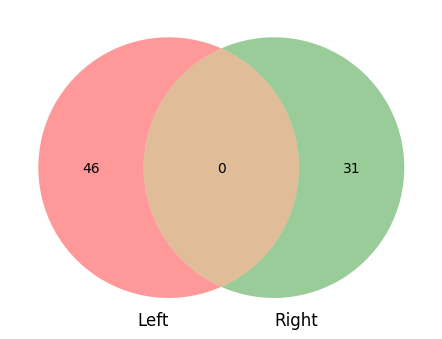

In [145]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
venn2_unweighted(subsets = (46,31, 0), set_labels = ('Left', 'Right'))

image_format = 'png' # e.g .png, .svg, etc.
image_name = 'novariability.png'
plt.savefig(image_name, format=image_format, dpi=1200)
plt.show()

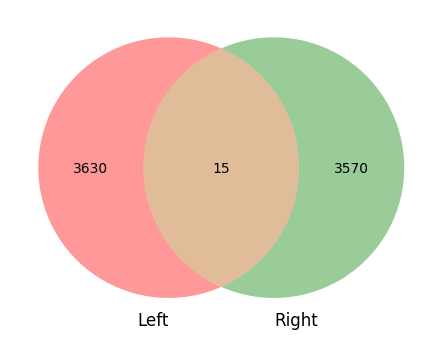

In [150]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
venn2_unweighted(subsets = (3630, 3570, 15), set_labels = ('Left', 'Right'))

image_format = 'jpg' # e.g .png, .svg, etc.
image_name = '21withmutation.jpg'
plt.savefig(image_name, format=image_format, dpi=1200)
plt.show()

In [155]:
reverse_function("NNCAGCACCGGACAGNNNC")

'CNNNGACAGGCCACGACNN'

In [158]:
#test cells for verification numbers REVERSE

from datetime import datetime
import pandas as pd

################Parameter to enter######################

 #name of dataframe
dfname = pd.DataFrame()
out = "FLRf.csv" #name of out csv file
infile = reverse #name of infile
left1=  "NCCACGACNN" #name of left half to search
right1= "CNNNGACAGGN" #name of right half to search

######################For official use only########################################


df1 = pd.DataFrame(columns = ['section','mismatch', 'seq_len','start', 'end', 'consensus', 'query','motif', 'mis1', 'mis2' ])

start_time =  datetime.now().time() # time object


#forward search
# left1=  "NNCAGCACC" #name of left half to search
# right1= "GGACAGNNNC" #name of right half to search


N = "[ATGC]"

left2 = list( left1)
right2 = list(right1)

counter = 1
hit = 0
sxnlist = ['left','right', 'full']
for i in sxnlist:
    
    section = i
    if i == 'left':
        query = left2 
        condition = ((j not in [1,2]) and (n not in [1,2]))
    elif i == 'right':
        query = right2 
        condition = ((j not in [len(query)-2, len(query)-3, len(query)-4]) and
                     (n not in [len(query)-2, len(query)-3, len(query)-4]))
    elif i== "full":
        query = right2 + left2
        condition = ((j not in [1,2]) and (n not in [1,2])
                    and (j not in [len(query)-2, len(query)-3, len(query)-4]) 
                    and (n not in [len(query)-2, len(query)-3, len(query)-4]))
    query1 = query[:]
    consensus = ""
    consensus = consensus.join(query1)
    len_seq= len(consensus)


    # for 0 mistmatches

    for k in range(len(query1)):
        if query1[k] == "N":
            query1[k] = N                  
    finalquery = ""
    finalquery = finalquery.join(query1)
    p = re.compile(finalquery)
    ns =0

    #     print(finalquery)
    for m in p.finditer(infile):
        print(section,ns,len_seq, str(m.start()),str(m.end()), consensus, m.group())
        df1.loc[len(df1)] = [i,0,len_seq, str(m.start()),str(m.end()), consensus, consensus, m.group(), 'na','na']
        hit += 1
        
    
    query1 = query[:]
    
    

    # for mistmatches more than 1


    for j in range(len(query1)):
        for n in range(len(query1)):
            if  (j<=n):               
                query1[j]="N"
                query1[n]="N"
                printquery = ""
                printquery = printquery.join(query1)
                if j == n:
                    ns = 1
                elif j<n:
                    ns = 2


            
                for k in range(len(query1)):
                    if query1[k] == "N":
                        query1[k] = N                  
                finalquery = ""
                finalquery = finalquery.join(query1)
                p = re.compile(finalquery)

                for m in p.finditer(infile):
                    print(section,ns,len_seq, str(m.start()),str(m.end()), consensus, printquery, m.group(), str(j),str(n))
                    df1.loc[len(df1)] = [i,ns, len_seq,str(m.start()),str(m.end()), consensus, printquery, m.group(), str(j), str(n)]
                    hit += 1
                    query1 = query
                    counter += 1

                query1= query[:]
    print("done "+i)


print("number of iterations is " + str(counter))
end_time = datetime.now().time() # time object
print(start_time, end_time, "number of hits is ",hit)
dfnameR = df1
# df1.to_csv(out)
dfnameR
############################################################################################################################

dfnameR[['section', 'mismatch','seq_len','start','end','consensus','motif']].drop_duplicates().reset_index().to_csv("bsitesRev.csv")


left 0 10 7215 7225 NCCACGACNN ACCACGACAC
left 0 10 9642 9652 NCCACGACNN TCCACGACTA
left 0 10 14433 14443 NCCACGACNN ACCACGACTC
left 0 10 17114 17124 NCCACGACNN CCCACGACCT
left 0 10 17969 17979 NCCACGACNN CCCACGACTG
left 0 10 18068 18078 NCCACGACNN ACCACGACCG
left 0 10 19426 19436 NCCACGACNN CCCACGACCC
left 0 10 21252 21262 NCCACGACNN CCCACGACGC
left 0 10 25145 25155 NCCACGACNN TCCACGACTA
left 0 10 27765 27775 NCCACGACNN CCCACGACCC
left 0 10 42842 42852 NCCACGACNN CCCACGACAC
left 0 10 44923 44933 NCCACGACNN TCCACGACGA
left 0 10 51212 51222 NCCACGACNN ACCACGACGG
left 0 10 51239 51249 NCCACGACNN TCCACGACGT
left 0 10 57160 57170 NCCACGACNN ACCACGACGG
left 0 10 57302 57312 NCCACGACNN CCCACGACTC
left 0 10 58267 58277 NCCACGACNN GCCACGACCT
left 0 10 58303 58313 NCCACGACNN ACCACGACCA
left 0 10 59104 59114 NCCACGACNN ACCACGACAG
left 0 10 61527 61537 NCCACGACNN ACCACGACAA
left 0 10 61539 61549 NCCACGACNN TCCACGACAG
left 0 10 63028 63038 NCCACGACNN GCCACGACCA
left 0 10 68587 68597 NCCACGACNN GCC

left 2 10 57302 57312 NCCACGACNN NCNACGACNN CCCACGACTC 0 2
left 2 10 58267 58277 NCCACGACNN NCNACGACNN GCCACGACCT 0 2
left 2 10 58303 58313 NCCACGACNN NCNACGACNN ACCACGACCA 0 2
left 2 10 59104 59114 NCCACGACNN NCNACGACNN ACCACGACAG 0 2
left 2 10 61185 61195 NCCACGACNN NCNACGACNN TCTACGACCT 0 2
left 2 10 61527 61537 NCCACGACNN NCNACGACNN ACCACGACAA 0 2
left 2 10 61539 61549 NCCACGACNN NCNACGACNN TCCACGACAG 0 2
left 2 10 63028 63038 NCCACGACNN NCNACGACNN GCCACGACCA 0 2
left 2 10 66707 66717 NCCACGACNN NCNACGACNN ACAACGACAT 0 2
left 2 10 68587 68597 NCCACGACNN NCNACGACNN GCCACGACGG 0 2
left 2 10 71456 71466 NCCACGACNN NCNACGACNN ACCACGACAC 0 2
left 2 10 72516 72526 NCCACGACNN NCNACGACNN TCCACGACTC 0 2
left 2 10 72884 72894 NCCACGACNN NCNACGACNN TCGACGACGA 0 2
left 2 10 73092 73102 NCCACGACNN NCNACGACNN CCCACGACAA 0 2
left 2 10 73118 73128 NCCACGACNN NCNACGACNN CCTACGACTC 0 2
left 2 10 77042 77052 NCCACGACNN NCNACGACNN GCCACGACGT 0 2
left 2 10 77817 77827 NCCACGACNN NCNACGACNN GCTACGACTA 0

left 2 10 73859 73869 NCCACGACNN NCCNCGACNN GCCTCGACGA 0 3
left 2 10 74050 74060 NCCACGACNN NCCNCGACNN GCCTCGACTC 0 3
left 2 10 77042 77052 NCCACGACNN NCCNCGACNN GCCACGACGT 0 3
left 2 10 79394 79404 NCCACGACNN NCCNCGACNN TCCACGACCC 0 3
left 2 10 81104 81114 NCCACGACNN NCCNCGACNN GCCACGACGG 0 3
left 2 10 83019 83029 NCCACGACNN NCCNCGACNN GCCCCGACCC 0 3
left 2 10 83438 83448 NCCACGACNN NCCNCGACNN CCCTCGACCA 0 3
left 2 10 83751 83761 NCCACGACNN NCCNCGACNN CCCTCGACAG 0 3
left 2 10 87083 87093 NCCACGACNN NCCNCGACNN GCCCCGACAA 0 3
left 2 10 89922 89932 NCCACGACNN NCCNCGACNN CCCCCGACGT 0 3
left 2 10 91641 91651 NCCACGACNN NCCNCGACNN ACCTCGACTG 0 3
left 2 10 92487 92497 NCCACGACNN NCCNCGACNN TCCCCGACCT 0 3
left 2 10 95175 95185 NCCACGACNN NCCNCGACNN ACCTCGACTG 0 3
left 2 10 97108 97118 NCCACGACNN NCCNCGACNN CCCTCGACCG 0 3
left 2 10 98329 98339 NCCACGACNN NCCNCGACNN CCCTCGACCA 0 3
left 2 10 102738 102748 NCCACGACNN NCCNCGACNN TCCGCGACCG 0 3
left 2 10 102924 102934 NCCACGACNN NCCNCGACNN CCCACGAC

left 2 10 156380 156390 NCCACGACNN NCCANGACNN CCCACGACCC 0 4
left 2 10 156572 156582 NCCACGACNN NCCANGACNN TCCATGACCC 0 4
left 2 10 159452 159462 NCCACGACNN NCCANGACNN CCCACGACCC 0 4
left 2 10 159644 159654 NCCACGACNN NCCANGACNN TCCATGACCC 0 4
left 2 10 161862 161872 NCCACGACNN NCCANGACNN CCCAGGACCA 0 4
left 2 10 165188 165198 NCCACGACNN NCCANGACNN TCCAGGACTC 0 4
left 2 10 169022 169032 NCCACGACNN NCCANGACNN ACCAGGACAT 0 4
left 2 10 169204 169214 NCCACGACNN NCCANGACNN CCCACGACCG 0 4
left 2 10 6519 6529 NCCACGACNN NCCACNACNN TCCACAACCG 0 5
left 2 10 7212 7222 NCCACGACNN NCCACNACNN CCCACCACGA 0 5
left 2 10 7440 7450 NCCACGACNN NCCACNACNN CCCACAACGC 0 5
left 2 10 9546 9556 NCCACGACNN NCCACNACNN TCCACCACGT 0 5
left 2 10 9642 9652 NCCACGACNN NCCACNACNN TCCACGACTA 0 5
left 2 10 11015 11025 NCCACGACNN NCCACNACNN GCCACCACGC 0 5
left 2 10 14433 14443 NCCACGACNN NCCACNACNN ACCACGACTC 0 5
left 2 10 15189 15199 NCCACGACNN NCCACNACNN CCCACCACTA 0 5
left 2 10 15653 15663 NCCACGACNN NCCACNACNN CCCACC

left 2 10 102924 102934 NCCACGACNN NCCACGNCNN CCCACGACCG 0 6
left 2 10 102971 102981 NCCACGACNN NCCACGNCNN TCCACGACGA 0 6
left 2 10 106114 106124 NCCACGACNN NCCACGNCNN ACCACGTCTC 0 6
left 2 10 108213 108223 NCCACGACNN NCCACGNCNN GCCACGACGC 0 6
left 2 10 109068 109078 NCCACGACNN NCCACGNCNN GCCACGACCA 0 6
left 2 10 110962 110972 NCCACGACNN NCCACGNCNN CCCACGTCTT 0 6
left 2 10 111297 111307 NCCACGACNN NCCACGNCNN CCCACGTCTA 0 6
left 2 10 111504 111514 NCCACGACNN NCCACGNCNN ACCACGGCCG 0 6
left 2 10 113435 113445 NCCACGACNN NCCACGNCNN GCCACGACTA 0 6
left 2 10 116329 116339 NCCACGACNN NCCACGNCNN TCCACGTCCT 0 6
left 2 10 116680 116690 NCCACGACNN NCCACGNCNN TCCACGTCCG 0 6
left 2 10 117140 117150 NCCACGACNN NCCACGNCNN ACCACGCCGC 0 6
left 2 10 123515 123525 NCCACGACNN NCCACGNCNN TCCACGTCAG 0 6
left 2 10 125079 125089 NCCACGACNN NCCACGNCNN GCCACGTCTC 0 6
left 2 10 125528 125538 NCCACGACNN NCCACGNCNN ACCACGGCTG 0 6
left 2 10 130684 130694 NCCACGACNN NCCACGNCNN CCCACGACCC 0 6
left 2 10 131987 131997 

left 2 10 150236 150246 NCCACGACNN NCCACGACNN CCCACGACCC 0 8
left 2 10 153308 153318 NCCACGACNN NCCACGACNN CCCACGACCC 0 8
left 2 10 156380 156390 NCCACGACNN NCCACGACNN CCCACGACCC 0 8
left 2 10 159452 159462 NCCACGACNN NCCACGACNN CCCACGACCC 0 8
left 2 10 169204 169214 NCCACGACNN NCCACGACNN CCCACGACCG 0 8
left 2 10 7215 7225 NCCACGACNN NCCACGACNN ACCACGACAC 0 9
left 2 10 9642 9652 NCCACGACNN NCCACGACNN TCCACGACTA 0 9
left 2 10 14433 14443 NCCACGACNN NCCACGACNN ACCACGACTC 0 9
left 2 10 17114 17124 NCCACGACNN NCCACGACNN CCCACGACCT 0 9
left 2 10 17969 17979 NCCACGACNN NCCACGACNN CCCACGACTG 0 9
left 2 10 18068 18078 NCCACGACNN NCCACGACNN ACCACGACCG 0 9
left 2 10 19426 19436 NCCACGACNN NCCACGACNN CCCACGACCC 0 9
left 2 10 21252 21262 NCCACGACNN NCCACGACNN CCCACGACGC 0 9
left 2 10 25145 25155 NCCACGACNN NCCACGACNN TCCACGACTA 0 9
left 2 10 27765 27775 NCCACGACNN NCCACGACNN CCCACGACCC 0 9
left 2 10 42842 42852 NCCACGACNN NCCACGACNN CCCACGACAC 0 9
left 2 10 44923 44933 NCCACGACNN NCCACGACNN TCCACG

left 2 10 33429 33439 NCCACGACNN NNNACGACNN CGGACGACGG 1 2
left 2 10 33608 33618 NCCACGACNN NNNACGACNN AACACGACGA 1 2
left 2 10 34234 34244 NCCACGACNN NNNACGACNN AACACGACAC 1 2
left 2 10 34525 34535 NCCACGACNN NNNACGACNN CCGACGACTC 1 2
left 2 10 34759 34769 NCCACGACNN NNNACGACNN GGGACGACCC 1 2
left 2 10 34828 34838 NCCACGACNN NNNACGACNN CACACGACAT 1 2
left 2 10 36338 36348 NCCACGACNN NNNACGACNN TCGACGACTG 1 2
left 2 10 37942 37952 NCCACGACNN NNNACGACNN GCGACGACCA 1 2
left 2 10 39943 39953 NCCACGACNN NNNACGACNN CGTACGACGG 1 2
left 2 10 40146 40156 NCCACGACNN NNNACGACNN GATACGACTT 1 2
left 2 10 40362 40372 NCCACGACNN NNNACGACNN CGAACGACCA 1 2
left 2 10 40431 40441 NCCACGACNN NNNACGACNN TAAACGACAG 1 2
left 2 10 40461 40471 NCCACGACNN NNNACGACNN ATTACGACGA 1 2
left 2 10 40621 40631 NCCACGACNN NNNACGACNN CCTACGACCG 1 2
left 2 10 40955 40965 NCCACGACNN NNNACGACNN CCTACGACCT 1 2
left 2 10 41351 41361 NCCACGACNN NNNACGACNN GGGACGACAG 1 2
left 2 10 41482 41492 NCCACGACNN NNNACGACNN GGTACGACGG 1

left 2 10 144393 144403 NCCACGACNN NNNACGACNN CCAACGACTC 1 2
left 2 10 144734 144744 NCCACGACNN NNNACGACNN AGAACGACCT 1 2
left 2 10 145221 145231 NCCACGACNN NNNACGACNN CCGACGACAG 1 2
left 2 10 146818 146828 NCCACGACNN NNNACGACNN CGGACGACGG 1 2
left 2 10 147164 147174 NCCACGACNN NNNACGACNN CCCACGACCC 1 2
left 2 10 147465 147475 NCCACGACNN NNNACGACNN CCAACGACTC 1 2
left 2 10 147806 147816 NCCACGACNN NNNACGACNN AGAACGACCT 1 2
left 2 10 148293 148303 NCCACGACNN NNNACGACNN CCGACGACAG 1 2
left 2 10 149890 149900 NCCACGACNN NNNACGACNN CGGACGACGG 1 2
left 2 10 150236 150246 NCCACGACNN NNNACGACNN CCCACGACCC 1 2
left 2 10 150537 150547 NCCACGACNN NNNACGACNN CCAACGACTC 1 2
left 2 10 150878 150888 NCCACGACNN NNNACGACNN AGAACGACCT 1 2
left 2 10 151365 151375 NCCACGACNN NNNACGACNN CCGACGACAG 1 2
left 2 10 152962 152972 NCCACGACNN NNNACGACNN CGGACGACGG 1 2
left 2 10 153308 153318 NCCACGACNN NNNACGACNN CCCACGACCC 1 2
left 2 10 153609 153619 NCCACGACNN NNNACGACNN CCAACGACTC 1 2
left 2 10 153950 153960 

left 2 10 42196 42206 NCCACGACNN NNCNCGACNN TGCGCGACTC 1 3
left 2 10 42842 42852 NCCACGACNN NNCNCGACNN CCCACGACAC 1 3
left 2 10 44314 44324 NCCACGACNN NNCNCGACNN ACCCCGACAC 1 3
left 2 10 44385 44395 NCCACGACNN NNCNCGACNN GGCCCGACGA 1 3
left 2 10 44421 44431 NCCACGACNN NNCNCGACNN CCCCCGACAG 1 3
left 2 10 44923 44933 NCCACGACNN NNCNCGACNN TCCACGACGA 1 3
left 2 10 46553 46563 NCCACGACNN NNCNCGACNN CACCCGACGC 1 3
left 2 10 47109 47119 NCCACGACNN NNCNCGACNN CCCCCGACAG 1 3
left 2 10 48209 48219 NCCACGACNN NNCNCGACNN CGCCCGACGG 1 3
left 2 10 48263 48273 NCCACGACNN NNCNCGACNN ACCTCGACGT 1 3
left 2 10 48324 48334 NCCACGACNN NNCNCGACNN GTCCCGACAC 1 3
left 2 10 49061 49071 NCCACGACNN NNCNCGACNN TACACGACCT 1 3
left 2 10 49421 49431 NCCACGACNN NNCNCGACNN TGCCCGACCA 1 3
left 2 10 51014 51024 NCCACGACNN NNCNCGACNN GGCACGACCT 1 3
left 2 10 51212 51222 NCCACGACNN NNCNCGACNN ACCACGACGG 1 3
left 2 10 51239 51249 NCCACGACNN NNCNCGACNN TCCACGACGT 1 3
left 2 10 52696 52706 NCCACGACNN NNCNCGACNN CTCACGACAC 1

left 2 10 117427 117437 NCCACGACNN NNCNCGACNN CCCCCGACCG 1 3
left 2 10 117685 117695 NCCACGACNN NNCNCGACNN GCCTCGACGA 1 3
left 2 10 117721 117731 NCCACGACNN NNCNCGACNN CCCGCGACCT 1 3
left 2 10 118156 118166 NCCACGACNN NNCNCGACNN TCCTCGACTC 1 3
left 2 10 118753 118763 NCCACGACNN NNCNCGACNN GGCACGACCT 1 3
left 2 10 118936 118946 NCCACGACNN NNCNCGACNN CCCTCGACGA 1 3
left 2 10 119116 119126 NCCACGACNN NNCNCGACNN ACCGCGACGA 1 3
left 2 10 120292 120302 NCCACGACNN NNCNCGACNN TCCTCGACAA 1 3
left 2 10 121099 121109 NCCACGACNN NNCNCGACNN AGCCCGACGC 1 3
left 2 10 121366 121376 NCCACGACNN NNCNCGACNN CCCGCGACCG 1 3
left 2 10 122251 122261 NCCACGACNN NNCNCGACNN GCCGCGACTA 1 3
left 2 10 122769 122779 NCCACGACNN NNCNCGACNN TCCTCGACGG 1 3
left 2 10 123970 123980 NCCACGACNN NNCNCGACNN TCCCCGACCA 1 3
left 2 10 125094 125104 NCCACGACNN NNCNCGACNN CCCTCGACGG 1 3
left 2 10 126345 126355 NCCACGACNN NNCNCGACNN GACACGACGG 1 3
left 2 10 126535 126545 NCCACGACNN NNCNCGACNN TACTCGACCG 1 3
left 2 10 126916 126926 

left 2 10 27765 27775 NCCACGACNN NNCANGACNN CCCACGACCC 1 4
left 2 10 31060 31070 NCCACGACNN NNCANGACNN CCCAGGACTC 1 4
left 2 10 31334 31344 NCCACGACNN NNCANGACNN TACACGACGC 1 4
left 2 10 33608 33618 NCCACGACNN NNCANGACNN AACACGACGA 1 4
left 2 10 34234 34244 NCCACGACNN NNCANGACNN AACACGACAC 1 4
left 2 10 34828 34838 NCCACGACNN NNCANGACNN CACACGACAT 1 4
left 2 10 35338 35348 NCCACGACNN NNCANGACNN TCCAGGACCG 1 4
left 2 10 35521 35531 NCCACGACNN NNCANGACNN GACAGGACGG 1 4
left 2 10 38038 38048 NCCACGACNN NNCANGACNN TTCAGGACCC 1 4
left 2 10 38168 38178 NCCACGACNN NNCANGACNN ACCAGGACAT 1 4
left 2 10 38434 38444 NCCACGACNN NNCANGACNN TCCAGGACCG 1 4
left 2 10 39984 39994 NCCACGACNN NNCANGACNN TACAAGACTT 1 4
left 2 10 40208 40218 NCCACGACNN NNCANGACNN GCCATGACCT 1 4
left 2 10 41881 41891 NCCACGACNN NNCANGACNN ACCAGGACGA 1 4
left 2 10 42052 42062 NCCACGACNN NNCANGACNN GACAGGACTT 1 4
left 2 10 42694 42704 NCCACGACNN NNCANGACNN TTCAAGACTA 1 4
left 2 10 42842 42852 NCCACGACNN NNCANGACNN CCCACGACAC 1

left 2 10 167185 167195 NCCACGACNN NNCANGACNN GGCACGACGT 1 4
left 2 10 168469 168479 NCCACGACNN NNCANGACNN ATCACGACCG 1 4
left 2 10 169022 169032 NCCACGACNN NNCANGACNN ACCAGGACAT 1 4
left 2 10 169204 169214 NCCACGACNN NNCANGACNN CCCACGACCG 1 4
left 2 10 170639 170649 NCCACGACNN NNCANGACNN GTCACGACGA 1 4
left 2 10 170975 170985 NCCACGACNN NNCANGACNN ATCAGGACAC 1 4
left 2 10 3210 3220 NCCACGACNN NNCACNACNN AACACGACAA 1 5
left 2 10 3533 3543 NCCACGACNN NNCACNACNN GTCACTACTT 1 5
left 2 10 5322 5332 NCCACGACNN NNCACNACNN AACACTACGT 1 5
left 2 10 5389 5399 NCCACGACNN NNCACNACNN TACACAACTC 1 5
left 2 10 5449 5459 NCCACGACNN NNCACNACNN AGCACAACGT 1 5
left 2 10 5814 5824 NCCACGACNN NNCACNACNN GACACTACGA 1 5
left 2 10 6519 6529 NCCACGACNN NNCACNACNN TCCACAACCG 1 5
left 2 10 6581 6591 NCCACGACNN NNCACNACNN AGCACCACGT 1 5
left 2 10 7212 7222 NCCACGACNN NNCACNACNN CCCACCACGA 1 5
left 2 10 7230 7240 NCCACGACNN NNCACNACNN GTCACCACAA 1 5
left 2 10 7281 7291 NCCACGACNN NNCACNACNN AGCACGACCC 1 5
left 2 

left 2 10 134699 134709 NCCACGACNN NNCACNACNN GACACGACCA 1 5
left 2 10 134714 134724 NCCACGACNN NNCACNACNN ACCACCACCG 1 5
left 2 10 134870 134880 NCCACGACNN NNCACNACNN CGCACCACCA 1 5
left 2 10 134924 134934 NCCACGACNN NNCACNACNN ATCACCACAC 1 5
left 2 10 134975 134985 NCCACGACNN NNCACNACNN ATCACAACGT 1 5
left 2 10 135077 135087 NCCACGACNN NNCACNACNN CCCACGACAG 1 5
left 2 10 135272 135282 NCCACGACNN NNCACNACNN TCCACTACCG 1 5
left 2 10 135308 135318 NCCACGACNN NNCACNACNN TCCACCACCC 1 5
left 2 10 135332 135342 NCCACGACNN NNCACNACNN CCCACCACCA 1 5
left 2 10 135344 135354 NCCACGACNN NNCACNACNN TCCACCACCT 1 5
left 2 10 135362 135372 NCCACGACNN NNCACNACNN CCCACCACCC 1 5
left 2 10 135380 135390 NCCACGACNN NNCACNACNN CCCACCACCC 1 5
left 2 10 135398 135408 NCCACGACNN NNCACNACNN CCCACCACCA 1 5
left 2 10 135413 135423 NCCACGACNN NNCACNACNN CCCACCACCC 1 5
left 2 10 135713 135723 NCCACGACNN NNCACNACNN GTCACGACCC 1 5
left 2 10 137590 137600 NCCACGACNN NNCACNACNN GACACCACCA 1 5
left 2 10 137948 137958 

left 2 10 91132 91142 NCCACGACNN NNCACGNCNN TCCACGGCCG 1 6
left 2 10 91635 91645 NCCACGACNN NNCACGNCNN AGCACGACCT 1 6
left 2 10 91945 91955 NCCACGACNN NNCACGNCNN GCCACGGCTC 1 6
left 2 10 92248 92258 NCCACGACNN NNCACGNCNN ACCACGTCCT 1 6
left 2 10 93898 93908 NCCACGACNN NNCACGNCNN GTCACGACAA 1 6
left 2 10 94566 94576 NCCACGACNN NNCACGNCNN GACACGACTG 1 6
left 2 10 96385 96395 NCCACGACNN NNCACGNCNN TCCACGGCTC 1 6
left 2 10 98479 98489 NCCACGACNN NNCACGNCNN CCCACGTCGC 1 6
left 2 10 98790 98800 NCCACGACNN NNCACGNCNN GACACGGCCT 1 6
left 2 10 98800 98810 NCCACGACNN NNCACGNCNN GGCACGCCGC 1 6
left 2 10 99022 99032 NCCACGACNN NNCACGNCNN GACACGACGT 1 6
left 2 10 100247 100257 NCCACGACNN NNCACGNCNN GACACGTCCC 1 6
left 2 10 101723 101733 NCCACGACNN NNCACGNCNN ACCACGCCAA 1 6
left 2 10 102156 102166 NCCACGACNN NNCACGNCNN CCCACGTCTC 1 6
left 2 10 102561 102571 NCCACGACNN NNCACGNCNN ACCACGTCCG 1 6
left 2 10 102699 102709 NCCACGACNN NNCACGNCNN TGCACGACCA 1 6
left 2 10 102924 102934 NCCACGACNN NNCACGNCNN 

left 2 10 63028 63038 NCCACGACNN NNCACGANNN GCCACGACCA 1 7
left 2 10 64526 64536 NCCACGACNN NNCACGANNN TGCACGAACA 1 7
left 2 10 68144 68154 NCCACGACNN NNCACGANNN ACCACGAACG 1 7
left 2 10 68587 68597 NCCACGACNN NNCACGANNN GCCACGACGG 1 7
left 2 10 71456 71466 NCCACGACNN NNCACGANNN ACCACGACAC 1 7
left 2 10 71943 71953 NCCACGACNN NNCACGANNN CACACGACGG 1 7
left 2 10 72516 72526 NCCACGACNN NNCACGANNN TCCACGACTC 1 7
left 2 10 73092 73102 NCCACGACNN NNCACGANNN CCCACGACAA 1 7
left 2 10 73718 73728 NCCACGACNN NNCACGANNN TGCACGAGTA 1 7
left 2 10 74817 74827 NCCACGACNN NNCACGANNN GTCACGAACC 1 7
left 2 10 76557 76567 NCCACGACNN NNCACGANNN GTCACGACGA 1 7
left 2 10 77042 77052 NCCACGACNN NNCACGANNN GCCACGACGT 1 7
left 2 10 78040 78050 NCCACGACNN NNCACGANNN CACACGAAAT 1 7
left 2 10 78724 78734 NCCACGACNN NNCACGANNN AACACGACGA 1 7
left 2 10 79394 79404 NCCACGACNN NNCACGANNN TCCACGACCC 1 7
left 2 10 79670 79680 NCCACGACNN NNCACGANNN CGCACGAAGG 1 7
left 2 10 81092 81102 NCCACGACNN NNCACGANNN CACACGACAC 1

left 2 10 27765 27775 NCCACGACNN NNCACGACNN CCCACGACCC 1 9
left 2 10 31334 31344 NCCACGACNN NNCACGACNN TACACGACGC 1 9
left 2 10 33608 33618 NCCACGACNN NNCACGACNN AACACGACGA 1 9
left 2 10 34234 34244 NCCACGACNN NNCACGACNN AACACGACAC 1 9
left 2 10 34828 34838 NCCACGACNN NNCACGACNN CACACGACAT 1 9
left 2 10 42842 42852 NCCACGACNN NNCACGACNN CCCACGACAC 1 9
left 2 10 44923 44933 NCCACGACNN NNCACGACNN TCCACGACGA 1 9
left 2 10 49061 49071 NCCACGACNN NNCACGACNN TACACGACCT 1 9
left 2 10 51014 51024 NCCACGACNN NNCACGACNN GGCACGACCT 1 9
left 2 10 51212 51222 NCCACGACNN NNCACGACNN ACCACGACGG 1 9
left 2 10 51239 51249 NCCACGACNN NNCACGACNN TCCACGACGT 1 9
left 2 10 52696 52706 NCCACGACNN NNCACGACNN CTCACGACAC 1 9
left 2 10 57160 57170 NCCACGACNN NNCACGACNN ACCACGACGG 1 9
left 2 10 57302 57312 NCCACGACNN NNCACGACNN CCCACGACTC 1 9
left 2 10 57422 57432 NCCACGACNN NNCACGACNN AACACGACTT 1 9
left 2 10 57787 57797 NCCACGACNN NNCACGACNN TACACGACGG 1 9
left 2 10 58267 58277 NCCACGACNN NNCACGACNN GCCACGACCT 1

left 1 10 168151 168161 NCCACGACNN NCNACGACNN CCGACGACAC 2 2
left 1 10 168593 168603 NCCACGACNN NCNACGACNN TCGACGACTG 2 2
left 1 10 169204 169214 NCCACGACNN NCNACGACNN CCCACGACCG 2 2
left 2 10 515 525 NCCACGACNN NCNNCGACNN CCCCCGACCC 2 3
left 2 10 1053 1063 NCCACGACNN NCNNCGACNN CCCCCGACCC 2 3
left 2 10 1576 1586 NCCACGACNN NCNNCGACNN CCCCCGACCC 2 3
left 2 10 2114 2124 NCCACGACNN NCNNCGACNN CCCCCGACCC 2 3
left 2 10 5817 5827 NCCACGACNN NCNNCGACNN ACTACGACTT 2 3
left 2 10 5957 5967 NCCACGACNN NCNNCGACNN TCGTCGACAC 2 3
left 2 10 5982 5992 NCCACGACNN NCNNCGACNN ACGACGACAG 2 3
left 2 10 6752 6762 NCCACGACNN NCNNCGACNN TCCTCGACTC 2 3
left 2 10 6961 6971 NCCACGACNN NCNNCGACNN CCACCGACTC 2 3
left 2 10 7086 7096 NCCACGACNN NCNNCGACNN CCTTCGACAT 2 3
left 2 10 7098 7108 NCCACGACNN NCNNCGACNN GCCTCGACCG 2 3
left 2 10 7215 7225 NCCACGACNN NCNNCGACNN ACCACGACAC 2 3
left 2 10 7335 7345 NCCACGACNN NCNNCGACNN GCTCCGACCC 2 3
left 2 10 8138 8148 NCCACGACNN NCNNCGACNN TCGGCGACGT 2 3
left 2 10 8154 8164 N

left 2 10 71456 71466 NCCACGACNN NCNNCGACNN ACCACGACAC 2 3
left 2 10 71509 71519 NCCACGACNN NCNNCGACNN ACCTCGACCC 2 3
left 2 10 71524 71534 NCCACGACNN NCNNCGACNN ACGGCGACCT 2 3
left 2 10 71561 71571 NCCACGACNN NCNNCGACNN GCGGCGACAG 2 3
left 2 10 71888 71898 NCCACGACNN NCNNCGACNN CCTGCGACCG 2 3
left 2 10 72139 72149 NCCACGACNN NCNNCGACNN ACCGCGACAG 2 3
left 2 10 72429 72439 NCCACGACNN NCNNCGACNN ACCTCGACCC 2 3
left 2 10 72498 72508 NCCACGACNN NCNNCGACNN ACCCCGACCA 2 3
left 2 10 72516 72526 NCCACGACNN NCNNCGACNN TCCACGACTC 2 3
left 2 10 72881 72891 NCCACGACNN NCNNCGACNN ACATCGACGA 2 3
left 2 10 73092 73102 NCCACGACNN NCNNCGACNN CCCACGACAA 2 3
left 2 10 73118 73128 NCCACGACNN NCNNCGACNN CCTACGACTC 2 3
left 2 10 73443 73453 NCCACGACNN NCNNCGACNN GCTGCGACTT 2 3
left 2 10 73632 73642 NCCACGACNN NCNNCGACNN ACCCCGACTC 2 3
left 2 10 73859 73869 NCCACGACNN NCNNCGACNN GCCTCGACGA 2 3
left 2 10 73919 73929 NCCACGACNN NCNNCGACNN TCGCCGACTA 2 3
left 2 10 74050 74060 NCCACGACNN NCNNCGACNN GCCTCGACTC 2

left 2 10 144092 144102 NCCACGACNN NCNNCGACNN CCCACGACCC 2 3
left 2 10 144209 144219 NCCACGACNN NCNNCGACNN CCGGCGACCC 2 3
left 2 10 144362 144372 NCCACGACNN NCNNCGACNN CCTCCGACCC 2 3
left 2 10 144393 144403 NCCACGACNN NCNNCGACNN CCAACGACTC 2 3
left 2 10 144815 144825 NCCACGACNN NCNNCGACNN TCCTCGACAG 2 3
left 2 10 145221 145231 NCCACGACNN NCNNCGACNN CCGACGACAG 2 3
left 2 10 145564 145574 NCCACGACNN NCNNCGACNN ACCCCGACGG 2 3
left 2 10 145686 145696 NCCACGACNN NCNNCGACNN CCCCCGACCC 2 3
left 2 10 145940 145950 NCCACGACNN NCNNCGACNN GCTCCGACCC 2 3
left 2 10 145973 145983 NCCACGACNN NCNNCGACNN CCTCCGACCT 2 3
left 2 10 146062 146072 NCCACGACNN NCNNCGACNN CCGCCGACGT 2 3
left 2 10 146246 146256 NCCACGACNN NCNNCGACNN TCTTCGACCC 2 3
left 2 10 146339 146349 NCCACGACNN NCNNCGACNN ACCCCGACCT 2 3
left 2 10 146733 146743 NCCACGACNN NCNNCGACNN CCGCCGACCG 2 3
left 2 10 146872 146882 NCCACGACNN NCNNCGACNN CCCCCGACTC 2 3
left 2 10 147164 147174 NCCACGACNN NCNNCGACNN CCCACGACCC 2 3
left 2 10 147281 147291 

left 2 10 41954 41964 NCCACGACNN NCNANGACNN CCAAAGACAC 2 4
left 2 10 42544 42554 NCCACGACNN NCNANGACNN TCGACGACTC 2 4
left 2 10 42842 42852 NCCACGACNN NCNANGACNN CCCACGACAC 2 4
left 2 10 43051 43061 NCCACGACNN NCNANGACNN ACGACGACTG 2 4
left 2 10 43453 43463 NCCACGACNN NCNANGACNN TCTACGACAA 2 4
left 2 10 43705 43715 NCCACGACNN NCNANGACNN GCAACGACTG 2 4
left 2 10 44923 44933 NCCACGACNN NCNANGACNN TCCACGACGA 2 4
left 2 10 45638 45648 NCCACGACNN NCNANGACNN CCGAAGACCT 2 4
left 2 10 45661 45671 NCCACGACNN NCNANGACNN TCGAGGACCA 2 4
left 2 10 46088 46098 NCCACGACNN NCNANGACNN CCTAGGACCA 2 4
left 2 10 46417 46427 NCCACGACNN NCNANGACNN TCGAGGACCG 2 4
left 2 10 47060 47070 NCCACGACNN NCNANGACNN TCTAGGACGT 2 4
left 2 10 48465 48475 NCCACGACNN NCNANGACNN CCTATGACGG 2 4
left 2 10 50480 50490 NCCACGACNN NCNANGACNN TCGAAGACGC 2 4
left 2 10 50600 50610 NCCACGACNN NCNANGACNN ACAAAGACCT 2 4
left 2 10 51212 51222 NCCACGACNN NCNANGACNN ACCACGACGG 2 4
left 2 10 51239 51249 NCCACGACNN NCNANGACNN TCCACGACGT 2

left 2 10 144284 144294 NCCACGACNN NCNANGACNN TCCATGACCC 2 4
left 2 10 144393 144403 NCCACGACNN NCNANGACNN CCAACGACTC 2 4
left 2 10 144628 144638 NCCACGACNN NCNANGACNN CCAAGGACAC 2 4
left 2 10 145221 145231 NCCACGACNN NCNANGACNN CCGACGACAG 2 4
left 2 10 145547 145557 NCCACGACNN NCNANGACNN ACAATGACGT 2 4
left 2 10 145648 145658 NCCACGACNN NCNANGACNN CCGAAGACCC 2 4
left 2 10 147164 147174 NCCACGACNN NCNANGACNN CCCACGACCC 2 4
left 2 10 147356 147366 NCCACGACNN NCNANGACNN TCCATGACCC 2 4
left 2 10 147465 147475 NCCACGACNN NCNANGACNN CCAACGACTC 2 4
left 2 10 147700 147710 NCCACGACNN NCNANGACNN CCAAGGACAC 2 4
left 2 10 148293 148303 NCCACGACNN NCNANGACNN CCGACGACAG 2 4
left 2 10 148619 148629 NCCACGACNN NCNANGACNN ACAATGACGT 2 4
left 2 10 148720 148730 NCCACGACNN NCNANGACNN CCGAAGACCC 2 4
left 2 10 150236 150246 NCCACGACNN NCNANGACNN CCCACGACCC 2 4
left 2 10 150428 150438 NCCACGACNN NCNANGACNN TCCATGACCC 2 4
left 2 10 150537 150547 NCCACGACNN NCNANGACNN CCAACGACTC 2 4
left 2 10 150772 150782 

left 2 10 59104 59114 NCCACGACNN NCNACNACNN ACCACGACAG 2 5
left 2 10 59284 59294 NCCACGACNN NCNACNACNN TCGACCACCT 2 5
left 2 10 61185 61195 NCCACGACNN NCNACNACNN TCTACGACCT 2 5
left 2 10 61524 61534 NCCACGACNN NCNACNACNN TCCACCACGA 2 5
left 2 10 61539 61549 NCCACGACNN NCNACNACNN TCCACGACAG 2 5
left 2 10 63028 63038 NCCACGACNN NCNACNACNN GCCACGACCA 2 5
left 2 10 63402 63412 NCCACGACNN NCNACNACNN GCCACCACCC 2 5
left 2 10 63457 63467 NCCACGACNN NCNACNACNN CCCACTACCA 2 5
left 2 10 63895 63905 NCCACGACNN NCNACNACNN CCCACTACCG 2 5
left 2 10 64128 64138 NCCACGACNN NCNACNACNN CCTACTACCT 2 5
left 2 10 64281 64291 NCCACGACNN NCNACNACNN TCGACAACGG 2 5
left 2 10 64778 64788 NCCACGACNN NCNACNACNN TCCACCACCC 2 5
left 2 10 64872 64882 NCCACGACNN NCNACNACNN GCCACTACCC 2 5
left 2 10 65151 65161 NCCACGACNN NCNACNACNN GCCACCACCC 2 5
left 2 10 65498 65508 NCCACGACNN NCNACNACNN CCTACTACCC 2 5
left 2 10 65528 65538 NCCACGACNN NCNACNACNN ACAACTACCG 2 5
left 2 10 66296 66306 NCCACGACNN NCNACNACNN CCGACTACGG 2

left 2 10 147164 147174 NCCACGACNN NCNACNACNN CCCACGACCC 2 5
left 2 10 147465 147475 NCCACGACNN NCNACNACNN CCAACGACTC 2 5
left 2 10 147653 147663 NCCACGACNN NCNACNACNN CCGACTACGT 2 5
left 2 10 148075 148085 NCCACGACNN NCNACNACNN GCCACTACTT 2 5
left 2 10 148293 148303 NCCACGACNN NCNACNACNN CCGACGACAG 2 5
left 2 10 149881 149891 NCCACGACNN NCNACNACNN ACCACCACTC 2 5
left 2 10 150236 150246 NCCACGACNN NCNACNACNN CCCACGACCC 2 5
left 2 10 150537 150547 NCCACGACNN NCNACNACNN CCAACGACTC 2 5
left 2 10 150725 150735 NCCACGACNN NCNACNACNN CCGACTACGT 2 5
left 2 10 151147 151157 NCCACGACNN NCNACNACNN GCCACTACTT 2 5
left 2 10 151365 151375 NCCACGACNN NCNACNACNN CCGACGACAG 2 5
left 2 10 152953 152963 NCCACGACNN NCNACNACNN ACCACCACTC 2 5
left 2 10 153308 153318 NCCACGACNN NCNACNACNN CCCACGACCC 2 5
left 2 10 153609 153619 NCCACGACNN NCNACNACNN CCAACGACTC 2 5
left 2 10 153797 153807 NCCACGACNN NCNACNACNN CCGACTACGT 2 5
left 2 10 154219 154229 NCCACGACNN NCNACNACNN GCCACTACTT 2 5
left 2 10 154437 154447 

left 2 10 47735 47745 NCCACGACNN NCNACGNCNN CCCACGGCTA 2 6
left 2 10 48254 48264 NCCACGACNN NCNACGNCNN ACGACGCCGA 2 6
left 2 10 48300 48310 NCCACGACNN NCNACGNCNN CCTACGGCCC 2 6
left 2 10 50298 50308 NCCACGACNN NCNACGNCNN CCAACGGCTC 2 6
left 2 10 50334 50344 NCCACGACNN NCNACGNCNN CCTACGGCGG 2 6
left 2 10 50567 50577 NCCACGACNN NCNACGNCNN TCCACGTCAA 2 6
left 2 10 51212 51222 NCCACGACNN NCNACGNCNN ACCACGACGG 2 6
left 2 10 51239 51249 NCCACGACNN NCNACGNCNN TCCACGACGT 2 6
left 2 10 51530 51540 NCCACGACNN NCNACGNCNN ACCACGGCCT 2 6
left 2 10 51910 51920 NCCACGACNN NCNACGNCNN CCGACGACGG 2 6
left 2 10 54199 54209 NCCACGACNN NCNACGNCNN CCCACGTCCC 2 6
left 2 10 54360 54370 NCCACGACNN NCNACGNCNN ACTACGCCTA 2 6
left 2 10 54587 54597 NCCACGACNN NCNACGNCNN ACAACGACAG 2 6
left 2 10 55038 55048 NCCACGACNN NCNACGNCNN TCCACGTCGC 2 6
left 2 10 55568 55578 NCCACGACNN NCNACGNCNN ACTACGACAA 2 6
left 2 10 55707 55717 NCCACGACNN NCNACGNCNN ACTACGACAT 2 6
left 2 10 56162 56172 NCCACGACNN NCNACGNCNN ACGACGCCGA 2

left 2 10 138249 138259 NCCACGACNN NCNACGNCNN CCAACGACTC 2 6
left 2 10 139020 139030 NCCACGACNN NCNACGNCNN TCGACGTCCT 2 6
left 2 10 139077 139087 NCCACGACNN NCNACGNCNN CCGACGACAG 2 6
left 2 10 139921 139931 NCCACGACNN NCNACGNCNN CCGACGTCCC 2 6
left 2 10 140057 140067 NCCACGACNN NCNACGNCNN CCGACGGCCC 2 6
left 2 10 140351 140361 NCCACGACNN NCNACGNCNN CCGACGGCCC 2 6
left 2 10 140689 140699 NCCACGACNN NCNACGNCNN TCTACGGCCT 2 6
left 2 10 140977 140987 NCCACGACNN NCNACGNCNN TCGACGGCCC 2 6
left 2 10 141020 141030 NCCACGACNN NCNACGNCNN CCCACGACCC 2 6
left 2 10 141219 141229 NCCACGACNN NCNACGNCNN CCCACGTCCC 2 6
left 2 10 141321 141331 NCCACGACNN NCNACGNCNN CCAACGACTC 2 6
left 2 10 142092 142102 NCCACGACNN NCNACGNCNN TCGACGTCCT 2 6
left 2 10 142149 142159 NCCACGACNN NCNACGNCNN CCGACGACAG 2 6
left 2 10 142993 143003 NCCACGACNN NCNACGNCNN CCGACGTCCC 2 6
left 2 10 143129 143139 NCCACGACNN NCNACGNCNN CCGACGGCCC 2 6
left 2 10 143423 143433 NCCACGACNN NCNACGNCNN CCGACGGCCC 2 6
left 2 10 143761 143771 

left 2 10 51910 51920 NCCACGACNN NCNACGANNN CCGACGACGG 2 7
left 2 10 52304 52314 NCCACGACNN NCNACGANNN ACGACGATAA 2 7
left 2 10 52386 52396 NCCACGACNN NCNACGANNN TCCACGAAGC 2 7
left 2 10 53628 53638 NCCACGACNN NCNACGANNN ACTACGATTA 2 7
left 2 10 53848 53858 NCCACGACNN NCNACGANNN GCGACGAACG 2 7
left 2 10 54542 54552 NCCACGACNN NCNACGANNN GCCACGATTT 2 7
left 2 10 54576 54586 NCCACGACNN NCNACGANNN CCAACGAGCC 2 7
left 2 10 54587 54597 NCCACGACNN NCNACGANNN ACAACGACAG 2 7
left 2 10 54673 54683 NCCACGACNN NCNACGANNN GCTACGAGGA 2 7
left 2 10 54890 54900 NCCACGACNN NCNACGANNN CCTACGAGAC 2 7
left 2 10 55568 55578 NCCACGACNN NCNACGANNN ACTACGACAA 2 7
left 2 10 55707 55717 NCCACGACNN NCNACGANNN ACTACGACAT 2 7
left 2 10 55919 55929 NCCACGACNN NCNACGANNN ACGACGAGCC 2 7
left 2 10 56393 56403 NCCACGACNN NCNACGANNN CCGACGACTC 2 7
left 2 10 57080 57090 NCCACGACNN NCNACGANNN CCGACGAAGG 2 7
left 2 10 57160 57170 NCCACGACNN NCNACGANNN ACCACGACGG 2 7
left 2 10 57302 57312 NCCACGACNN NCNACGANNN CCCACGACTC 2

left 2 10 56393 56403 NCCACGACNN NCNACGACNN CCGACGACTC 2 8
left 2 10 57160 57170 NCCACGACNN NCNACGACNN ACCACGACGG 2 8
left 2 10 57302 57312 NCCACGACNN NCNACGACNN CCCACGACTC 2 8
left 2 10 58267 58277 NCCACGACNN NCNACGACNN GCCACGACCT 2 8
left 2 10 58303 58313 NCCACGACNN NCNACGACNN ACCACGACCA 2 8
left 2 10 59104 59114 NCCACGACNN NCNACGACNN ACCACGACAG 2 8
left 2 10 61185 61195 NCCACGACNN NCNACGACNN TCTACGACCT 2 8
left 2 10 61527 61537 NCCACGACNN NCNACGACNN ACCACGACAA 2 8
left 2 10 61539 61549 NCCACGACNN NCNACGACNN TCCACGACAG 2 8
left 2 10 63028 63038 NCCACGACNN NCNACGACNN GCCACGACCA 2 8
left 2 10 66707 66717 NCCACGACNN NCNACGACNN ACAACGACAT 2 8
left 2 10 68587 68597 NCCACGACNN NCNACGACNN GCCACGACGG 2 8
left 2 10 71456 71466 NCCACGACNN NCNACGACNN ACCACGACAC 2 8
left 2 10 72516 72526 NCCACGACNN NCNACGACNN TCCACGACTC 2 8
left 2 10 72884 72894 NCCACGACNN NCNACGACNN TCGACGACGA 2 8
left 2 10 73092 73102 NCCACGACNN NCNACGACNN CCCACGACAA 2 8
left 2 10 73118 73128 NCCACGACNN NCNACGACNN CCTACGACTC 2

left 2 10 126793 126803 NCCACGACNN NCNACGACNN GCGACGACCT 2 9
left 2 10 128242 128252 NCCACGACNN NCNACGACNN CCGACGACTT 2 9
left 2 10 130684 130694 NCCACGACNN NCNACGACNN CCCACGACCC 2 9
left 2 10 133959 133969 NCCACGACNN NCNACGACNN TCAACGACCG 2 9
left 2 10 134120 134130 NCCACGACNN NCNACGACNN CCAACGACCT 2 9
left 2 10 134705 134715 NCCACGACNN NCNACGACNN ACCACGACGA 2 9
left 2 10 135077 135087 NCCACGACNN NCNACGACNN CCCACGACAG 2 9
left 2 10 137948 137958 NCCACGACNN NCNACGACNN CCCACGACCC 2 9
left 2 10 138249 138259 NCCACGACNN NCNACGACNN CCAACGACTC 2 9
left 2 10 139077 139087 NCCACGACNN NCNACGACNN CCGACGACAG 2 9
left 2 10 141020 141030 NCCACGACNN NCNACGACNN CCCACGACCC 2 9
left 2 10 141321 141331 NCCACGACNN NCNACGACNN CCAACGACTC 2 9
left 2 10 142149 142159 NCCACGACNN NCNACGACNN CCGACGACAG 2 9
left 2 10 144092 144102 NCCACGACNN NCNACGACNN CCCACGACCC 2 9
left 2 10 144393 144403 NCCACGACNN NCNACGACNN CCAACGACTC 2 9
left 2 10 145221 145231 NCCACGACNN NCNACGACNN CCGACGACAG 2 9
left 2 10 147164 147174 

left 1 10 108387 108397 NCCACGACNN NCCNCGACNN GCCCCGACAG 3 3
left 1 10 108576 108586 NCCACGACNN NCCNCGACNN TCCTCGACCG 3 3
left 1 10 109029 109039 NCCACGACNN NCCNCGACNN ACCTCGACCC 3 3
left 1 10 109068 109078 NCCACGACNN NCCNCGACNN GCCACGACCA 3 3
left 1 10 109452 109462 NCCACGACNN NCCNCGACNN TCCCCGACAG 3 3
left 1 10 109596 109606 NCCACGACNN NCCNCGACNN ACCTCGACCA 3 3
left 1 10 110994 111004 NCCACGACNN NCCNCGACNN CCCCCGACAG 3 3
left 1 10 111618 111628 NCCACGACNN NCCNCGACNN ACCTCGACCC 3 3
left 1 10 113435 113445 NCCACGACNN NCCNCGACNN GCCACGACTA 3 3
left 1 10 115483 115493 NCCACGACNN NCCNCGACNN ACCGCGACAA 3 3
left 1 10 116914 116924 NCCACGACNN NCCNCGACNN TCCGCGACCC 3 3
left 1 10 117427 117437 NCCACGACNN NCCNCGACNN CCCCCGACCG 3 3
left 1 10 117685 117695 NCCACGACNN NCCNCGACNN GCCTCGACGA 3 3
left 1 10 117721 117731 NCCACGACNN NCCNCGACNN CCCGCGACCT 3 3
left 1 10 118156 118166 NCCACGACNN NCCNCGACNN TCCTCGACTC 3 3
left 1 10 118936 118946 NCCACGACNN NCCNCGACNN CCCTCGACGA 3 3
left 1 10 119116 119126 

left 2 10 19426 19436 NCCACGACNN NCCNNGACNN CCCACGACCC 3 4
left 2 10 19498 19508 NCCACGACNN NCCNNGACNN ACCCGGACTA 3 4
left 2 10 20002 20012 NCCACGACNN NCCNNGACNN ACCGGGACAA 3 4
left 2 10 20130 20140 NCCACGACNN NCCNNGACNN ACCGGGACGT 3 4
left 2 10 20262 20272 NCCACGACNN NCCNNGACNN TCCGGGACCG 3 4
left 2 10 20524 20534 NCCACGACNN NCCNNGACNN GCCTCGACCC 3 4
left 2 10 20827 20837 NCCACGACNN NCCNNGACNN CCCCCGACCG 3 4
left 2 10 20865 20875 NCCACGACNN NCCNNGACNN ACCGGGACTC 3 4
left 2 10 20883 20893 NCCACGACNN NCCNNGACNN CCCGAGACGA 3 4
left 2 10 21014 21024 NCCACGACNN NCCNNGACNN ACCCAGACGC 3 4
left 2 10 21252 21262 NCCACGACNN NCCNNGACNN CCCACGACGC 3 4
left 2 10 22238 22248 NCCACGACNN NCCNNGACNN GCCTGGACTT 3 4
left 2 10 22339 22349 NCCACGACNN NCCNNGACNN ACCGCGACCC 3 4
left 2 10 22412 22422 NCCACGACNN NCCNNGACNN GCCTCGACCT 3 4
left 2 10 24626 24636 NCCACGACNN NCCNNGACNN ACCATGACCA 3 4
left 2 10 25145 25155 NCCACGACNN NCCNNGACNN TCCACGACTA 3 4
left 2 10 25974 25984 NCCACGACNN NCCNNGACNN ACCCCGACAA 3

left 2 10 78301 78311 NCCACGACNN NCCNNGACNN TCCTGGACCA 3 4
left 2 10 79394 79404 NCCACGACNN NCCNNGACNN TCCACGACCC 3 4
left 2 10 79601 79611 NCCACGACNN NCCNNGACNN CCCGAGACTA 3 4
left 2 10 80343 80353 NCCACGACNN NCCNNGACNN TCCTGGACAG 3 4
left 2 10 80543 80553 NCCACGACNN NCCNNGACNN ACCTGGACTC 3 4
left 2 10 81056 81066 NCCACGACNN NCCNNGACNN TCCTGGACCC 3 4
left 2 10 81104 81114 NCCACGACNN NCCNNGACNN GCCACGACGG 3 4
left 2 10 82508 82518 NCCACGACNN NCCNNGACNN CCCTTGACCT 3 4
left 2 10 83019 83029 NCCACGACNN NCCNNGACNN GCCCCGACCC 3 4
left 2 10 83090 83100 NCCACGACNN NCCNNGACNN ACCCGGACAG 3 4
left 2 10 83115 83125 NCCACGACNN NCCNNGACNN CCCTTGACCC 3 4
left 2 10 83438 83448 NCCACGACNN NCCNNGACNN CCCTCGACCA 3 4
left 2 10 83751 83761 NCCACGACNN NCCNNGACNN CCCTCGACAG 3 4
left 2 10 84215 84225 NCCACGACNN NCCNNGACNN CCCGTGACCT 3 4
left 2 10 85646 85656 NCCACGACNN NCCNNGACNN CCCAGGACTA 3 4
left 2 10 85743 85753 NCCACGACNN NCCNNGACNN ACCCAGACTT 3 4
left 2 10 86041 86051 NCCACGACNN NCCNNGACNN CCCGAGACAT 3

left 2 10 132397 132407 NCCACGACNN NCCNNGACNN TCCTGGACCG 3 4
left 2 10 132522 132532 NCCACGACNN NCCNNGACNN TCCTGGACCG 3 4
left 2 10 132647 132657 NCCACGACNN NCCNNGACNN TCCTGGACCG 3 4
left 2 10 132772 132782 NCCACGACNN NCCNNGACNN TCCTGGACCG 3 4
left 2 10 132897 132907 NCCACGACNN NCCNNGACNN TCCTGGACCG 3 4
left 2 10 133022 133032 NCCACGACNN NCCNNGACNN TCCTGGACCG 3 4
left 2 10 133147 133157 NCCACGACNN NCCNNGACNN TCCTGGACCG 3 4
left 2 10 133272 133282 NCCACGACNN NCCNNGACNN TCCTGGACCG 3 4
left 2 10 133397 133407 NCCACGACNN NCCNNGACNN TCCTGGACCG 3 4
left 2 10 133522 133532 NCCACGACNN NCCNNGACNN TCCTGGACCG 3 4
left 2 10 133581 133591 NCCACGACNN NCCNNGACNN ACCGTGACAA 3 4
left 2 10 133596 133606 NCCACGACNN NCCNNGACNN GCCGGGACAT 3 4
left 2 10 133843 133853 NCCACGACNN NCCNNGACNN ACCCTGACCC 3 4
left 2 10 134483 134493 NCCACGACNN NCCNNGACNN ACCGAGACCA 3 4
left 2 10 134586 134596 NCCACGACNN NCCNNGACNN GCCGAGACCG 3 4
left 2 10 134705 134715 NCCACGACNN NCCNNGACNN ACCACGACGA 3 4
left 2 10 134780 134790 

left 2 10 154502 154512 NCCACGACNN NCCNNGACNN CCCGGGACTG 3 4
left 2 10 154780 154790 NCCACGACNN NCCNNGACNN ACCCCGACGG 3 4
left 2 10 154902 154912 NCCACGACNN NCCNNGACNN CCCCCGACCC 3 4
left 2 10 154994 155004 NCCACGACNN NCCNNGACNN CCCGAGACCT 3 4
left 2 10 155080 155090 NCCACGACNN NCCNNGACNN GCCCTGACCC 3 4
left 2 10 155127 155137 NCCACGACNN NCCNNGACNN TCCCGGACAG 3 4
left 2 10 155290 155300 NCCACGACNN NCCNNGACNN CCCCTGACTG 3 4
left 2 10 155555 155565 NCCACGACNN NCCNNGACNN ACCCCGACCT 3 4
left 2 10 155606 155616 NCCACGACNN NCCNNGACNN GCCCGGACCT 3 4
left 2 10 155660 155670 NCCACGACNN NCCNNGACNN CCCGAGACTT 3 4
left 2 10 155783 155793 NCCACGACNN NCCNNGACNN CCCCGGACCC 3 4
left 2 10 155884 155894 NCCACGACNN NCCNNGACNN CCCGAGACCC 3 4
left 2 10 156008 156018 NCCACGACNN NCCNNGACNN GCCCAGACCC 3 4
left 2 10 156076 156086 NCCACGACNN NCCNNGACNN CCCCAGACAG 3 4
left 2 10 156088 156098 NCCACGACNN NCCNNGACNN CCCCCGACTC 3 4
left 2 10 156347 156357 NCCACGACNN NCCNNGACNN CCCGGGACGG 3 4
left 2 10 156380 156390 

left 2 10 51236 51246 NCCACGACNN NCCNCNACNN TCCTCCACGA 3 5
left 2 10 51377 51387 NCCACGACNN NCCNCNACNN GCCTCCACGG 3 5
left 2 10 51738 51748 NCCACGACNN NCCNCNACNN ACCGCCACCT 3 5
left 2 10 52068 52078 NCCACGACNN NCCNCNACNN GCCTCTACCT 3 5
left 2 10 52704 52714 NCCACGACNN NCCNCNACNN ACCACCACTA 3 5
left 2 10 53068 53078 NCCACGACNN NCCNCNACNN TCCGCGACAA 3 5
left 2 10 53912 53922 NCCACGACNN NCCNCNACNN CCCTCTACTC 3 5
left 2 10 53951 53961 NCCACGACNN NCCNCNACNN ACCACAACCT 3 5
left 2 10 54196 54206 NCCACGACNN NCCNCNACNN ACCCCCACGT 3 5
left 2 10 54434 54444 NCCACGACNN NCCNCNACNN CCCCCAACTC 3 5
left 2 10 54521 54531 NCCACGACNN NCCNCNACNN TCCTCCACAG 3 5
left 2 10 54599 54609 NCCACGACNN NCCNCNACNN ACCACTACAT 3 5
left 2 10 55002 55012 NCCACGACNN NCCNCNACNN ACCGCCACCC 3 5
left 2 10 55228 55238 NCCACGACNN NCCNCNACNN ACCCCGACAC 3 5
left 2 10 55343 55353 NCCACGACNN NCCNCNACNN GCCGCGACTC 3 5
left 2 10 55514 55524 NCCACGACNN NCCNCNACNN CCCGCGACTC 3 5
left 2 10 55598 55608 NCCACGACNN NCCNCNACNN TCCACCACCT 3

left 2 10 107128 107138 NCCACGACNN NCCNCNACNN GCCCCCACCA 3 5
left 2 10 107586 107596 NCCACGACNN NCCNCNACNN TCCGCCACCT 3 5
left 2 10 107942 107952 NCCACGACNN NCCNCNACNN TCCCCGACCT 3 5
left 2 10 108213 108223 NCCACGACNN NCCNCNACNN GCCACGACGC 3 5
left 2 10 108315 108325 NCCACGACNN NCCNCNACNN CCCACTACTT 3 5
left 2 10 108387 108397 NCCACGACNN NCCNCNACNN GCCCCGACAG 3 5
left 2 10 108564 108574 NCCACGACNN NCCNCNACNN GCCGCAACAA 3 5
left 2 10 108576 108586 NCCACGACNN NCCNCNACNN TCCTCGACCG 3 5
left 2 10 108830 108840 NCCACGACNN NCCNCNACNN GCCGCAACGT 3 5
left 2 10 109029 109039 NCCACGACNN NCCNCNACNN ACCTCGACCC 3 5
left 2 10 109068 109078 NCCACGACNN NCCNCNACNN GCCACGACCA 3 5
left 2 10 109353 109363 NCCACGACNN NCCNCNACNN CCCTCCACGA 3 5
left 2 10 109452 109462 NCCACGACNN NCCNCNACNN TCCCCGACAG 3 5
left 2 10 109496 109506 NCCACGACNN NCCNCNACNN CCCTCTACCG 3 5
left 2 10 109596 109606 NCCACGACNN NCCNCNACNN ACCTCGACCA 3 5
left 2 10 109651 109661 NCCACGACNN NCCNCNACNN GCCACCACCA 3 5
left 2 10 110114 110124 

left 2 10 236 246 NCCACGACNN NCCNCGNCNN ACCGCGCCGG 3 6
left 2 10 515 525 NCCACGACNN NCCNCGNCNN CCCCCGACCC 3 6
left 2 10 774 784 NCCACGACNN NCCNCGNCNN ACCGCGCCGG 3 6
left 2 10 1053 1063 NCCACGACNN NCCNCGNCNN CCCCCGACCC 3 6
left 2 10 1297 1307 NCCACGACNN NCCNCGNCNN ACCGCGCCGG 3 6
left 2 10 1576 1586 NCCACGACNN NCCNCGNCNN CCCCCGACCC 3 6
left 2 10 1835 1845 NCCACGACNN NCCNCGNCNN ACCGCGCCGG 3 6
left 2 10 2114 2124 NCCACGACNN NCCNCGNCNN CCCCCGACCC 3 6
left 2 10 3647 3657 NCCACGACNN NCCNCGNCNN ACCTCGGCCG 3 6
left 2 10 6274 6284 NCCACGACNN NCCNCGNCNN ACCACGCCCG 3 6
left 2 10 6752 6762 NCCACGACNN NCCNCGNCNN TCCTCGACTC 3 6
left 2 10 7098 7108 NCCACGACNN NCCNCGNCNN GCCTCGACCG 3 6
left 2 10 7215 7225 NCCACGACNN NCCNCGNCNN ACCACGACAC 3 6
left 2 10 7659 7669 NCCACGACNN NCCNCGNCNN GCCACGGCGA 3 6
left 2 10 7686 7696 NCCACGACNN NCCNCGNCNN ACCTCGGCCC 3 6
left 2 10 7821 7831 NCCACGACNN NCCNCGNCNN TCCCCGGCCC 3 6
left 2 10 7954 7964 NCCACGACNN NCCNCGNCNN CCCCCGCCAC 3 6
left 2 10 8043 8053 NCCACGACNN NCCNCG

left 2 10 41911 41921 NCCACGACNN NCCNCGNCNN CCCTCGGCCT 3 6
left 2 10 42160 42170 NCCACGACNN NCCNCGNCNN TCCTCGACCC 3 6
left 2 10 42842 42852 NCCACGACNN NCCNCGNCNN CCCACGACAC 3 6
left 2 10 43684 43694 NCCACGACNN NCCNCGNCNN CCCTCGCCAA 3 6
left 2 10 44314 44324 NCCACGACNN NCCNCGNCNN ACCCCGACAC 3 6
left 2 10 44421 44431 NCCACGACNN NCCNCGNCNN CCCCCGACAG 3 6
left 2 10 44761 44771 NCCACGACNN NCCNCGNCNN TCCGCGTCCT 3 6
left 2 10 44774 44784 NCCACGACNN NCCNCGNCNN TCCGCGTCAG 3 6
left 2 10 44923 44933 NCCACGACNN NCCNCGNCNN TCCACGACGA 3 6
left 2 10 45848 45858 NCCACGACNN NCCNCGNCNN CCCACGTCAA 3 6
left 2 10 47109 47119 NCCACGACNN NCCNCGNCNN CCCCCGACAG 3 6
left 2 10 47735 47745 NCCACGACNN NCCNCGNCNN CCCACGGCTA 3 6
left 2 10 48263 48273 NCCACGACNN NCCNCGNCNN ACCTCGACGT 3 6
left 2 10 48395 48405 NCCACGACNN NCCNCGNCNN CCCCCGTCGT 3 6
left 2 10 50567 50577 NCCACGACNN NCCNCGNCNN TCCACGTCAA 3 6
left 2 10 50606 50616 NCCACGACNN NCCNCGNCNN ACCTCGTCGG 3 6
left 2 10 50741 50751 NCCACGACNN NCCNCGNCNN ACCGCGGCCA 3

left 2 10 108213 108223 NCCACGACNN NCCNCGNCNN GCCACGACGC 3 6
left 2 10 108387 108397 NCCACGACNN NCCNCGNCNN GCCCCGACAG 3 6
left 2 10 108576 108586 NCCACGACNN NCCNCGNCNN TCCTCGACCG 3 6
left 2 10 108809 108819 NCCACGACNN NCCNCGNCNN CCCCCGTCGT 3 6
left 2 10 108913 108923 NCCACGACNN NCCNCGNCNN TCCCCGTCTG 3 6
left 2 10 109029 109039 NCCACGACNN NCCNCGNCNN ACCTCGACCC 3 6
left 2 10 109068 109078 NCCACGACNN NCCNCGNCNN GCCACGACCA 3 6
left 2 10 109181 109191 NCCACGACNN NCCNCGNCNN TCCGCGTCGA 3 6
left 2 10 109452 109462 NCCACGACNN NCCNCGNCNN TCCCCGACAG 3 6
left 2 10 109596 109606 NCCACGACNN NCCNCGNCNN ACCTCGACCA 3 6
left 2 10 109616 109626 NCCACGACNN NCCNCGNCNN CCCCCGCCCC 3 6
left 2 10 109979 109989 NCCACGACNN NCCNCGNCNN CCCTCGGCCC 3 6
left 2 10 110335 110345 NCCACGACNN NCCNCGNCNN CCCCCGCCGC 3 6
left 2 10 110953 110963 NCCACGACNN NCCNCGNCNN TCCTCGGCTC 3 6
left 2 10 110994 111004 NCCACGACNN NCCNCGNCNN CCCCCGACAG 3 6
left 2 10 111241 111251 NCCACGACNN NCCNCGNCNN CCCCCGTCGA 3 6
left 2 10 111297 111307 

left 2 10 145564 145574 NCCACGACNN NCCNCGNCNN ACCCCGACGG 3 6
left 2 10 145663 145673 NCCACGACNN NCCNCGNCNN GCCCCGTCAC 3 6
left 2 10 145676 145686 NCCACGACNN NCCNCGNCNN TCCCCGCCCT 3 6
left 2 10 145686 145696 NCCACGACNN NCCNCGNCNN CCCCCGACCC 3 6
left 2 10 145884 145894 NCCACGACNN NCCNCGNCNN CCCCCGCCCC 3 6
left 2 10 145953 145963 NCCACGACNN NCCNCGNCNN CCCTCGGCAC 3 6
left 2 10 146281 146291 NCCACGACNN NCCNCGNCNN TCCTCGTCCC 3 6
left 2 10 146339 146349 NCCACGACNN NCCNCGNCNN ACCCCGACCT 3 6
left 2 10 146483 146493 NCCACGACNN NCCNCGNCNN ACCCCGGCGG 3 6
left 2 10 146628 146638 NCCACGACNN NCCNCGNCNN CCCTCGCCTC 3 6
left 2 10 146715 146725 NCCACGACNN NCCNCGNCNN TCCCCGTCTT 3 6
left 2 10 146757 146767 NCCACGACNN NCCNCGNCNN TCCGCGCCCC 3 6
left 2 10 146872 146882 NCCACGACNN NCCNCGNCNN CCCCCGACTC 3 6
left 2 10 147164 147174 NCCACGACNN NCCNCGNCNN CCCACGACCC 3 6
left 2 10 147350 147360 NCCACGACNN NCCNCGNCNN TCCCCGTCCA 3 6
left 2 10 147363 147373 NCCACGACNN NCCNCGNCNN CCCACGTCCC 3 6
left 2 10 147454 147464 

left 2 10 11434 11444 NCCACGACNN NCCNCGANNN ACCGCGACAC 3 7
left 2 10 11579 11589 NCCACGACNN NCCNCGANNN GCCCCGAGCC 3 7
left 2 10 11732 11742 NCCACGACNN NCCNCGANNN GCCTCGAGAG 3 7
left 2 10 11876 11886 NCCACGACNN NCCNCGANNN TCCGCGACCG 3 7
left 2 10 11984 11994 NCCACGACNN NCCNCGANNN TCCGCGACTT 3 7
left 2 10 12326 12336 NCCACGACNN NCCNCGANNN CCCTCGACCG 3 7
left 2 10 12697 12707 NCCACGACNN NCCNCGANNN CCCCCGAGTG 3 7
left 2 10 12734 12744 NCCACGACNN NCCNCGANNN CCCGCGACGC 3 7
left 2 10 12972 12982 NCCACGACNN NCCNCGANNN CCCACGATTC 3 7
left 2 10 13512 13522 NCCACGACNN NCCNCGANNN GCCTCGAGAT 3 7
left 2 10 14148 14158 NCCACGACNN NCCNCGANNN GCCTCGAATG 3 7
left 2 10 14433 14443 NCCACGACNN NCCNCGANNN ACCACGACTC 3 7
left 2 10 14880 14890 NCCACGACNN NCCNCGANNN ACCTCGACAT 3 7
left 2 10 16522 16532 NCCACGACNN NCCNCGANNN CCCGCGATAT 3 7
left 2 10 16598 16608 NCCACGACNN NCCNCGANNN GCCTCGACCT 3 7
left 2 10 17114 17124 NCCACGACNN NCCNCGANNN CCCACGACCT 3 7
left 2 10 17969 17979 NCCACGACNN NCCNCGANNN CCCACGACTG 3

left 2 10 83012 83022 NCCACGACNN NCCNCGANNN CCCCCGAGCC 3 7
left 2 10 83438 83448 NCCACGACNN NCCNCGANNN CCCTCGACCA 3 7
left 2 10 83751 83761 NCCACGACNN NCCNCGANNN CCCTCGACAG 3 7
left 2 10 84322 84332 NCCACGACNN NCCNCGANNN CCCACGAAAC 3 7
left 2 10 86578 86588 NCCACGACNN NCCNCGANNN CCCGCGAGAG 3 7
left 2 10 87083 87093 NCCACGACNN NCCNCGANNN GCCCCGACAA 3 7
left 2 10 88172 88182 NCCACGACNN NCCNCGANNN TCCTCGAAGG 3 7
left 2 10 89922 89932 NCCACGACNN NCCNCGANNN CCCCCGACGT 3 7
left 2 10 91075 91085 NCCACGACNN NCCNCGANNN GCCTCGAGAC 3 7
left 2 10 91641 91651 NCCACGACNN NCCNCGANNN ACCTCGACTG 3 7
left 2 10 92238 92248 NCCACGACNN NCCNCGANNN ACCTCGAGGA 3 7
left 2 10 92487 92497 NCCACGACNN NCCNCGANNN TCCCCGACCT 3 7
left 2 10 95175 95185 NCCACGACNN NCCNCGANNN ACCTCGACTG 3 7
left 2 10 95907 95917 NCCACGACNN NCCNCGANNN GCCGCGATGT 3 7
left 2 10 95935 95945 NCCACGACNN NCCNCGANNN GCCTCGAGTT 3 7
left 2 10 96261 96271 NCCACGACNN NCCNCGANNN GCCGCGAAGA 3 7
left 2 10 96424 96434 NCCACGACNN NCCNCGANNN TCCGCGAGCT 3

left 2 10 152810 152820 NCCACGACNN NCCNCGANNN TCCCCGAGAC 3 7
left 2 10 153016 153026 NCCACGACNN NCCNCGANNN CCCCCGACTC 3 7
left 2 10 153308 153318 NCCACGACNN NCCNCGANNN CCCACGACCC 3 7
left 2 10 153445 153455 NCCACGACNN NCCNCGANNN ACCCCGAACC 3 7
left 2 10 154031 154041 NCCACGACNN NCCNCGANNN TCCTCGACAG 3 7
left 2 10 154356 154366 NCCACGACNN NCCNCGANNN ACCGCGAGAC 3 7
left 2 10 154549 154559 NCCACGACNN NCCNCGANNN CCCCCGAATA 3 7
left 2 10 154780 154790 NCCACGACNN NCCNCGANNN ACCCCGACGG 3 7
left 2 10 154861 154871 NCCACGACNN NCCNCGANNN CCCCCGAAGA 3 7
left 2 10 154902 154912 NCCACGACNN NCCNCGANNN CCCCCGACCC 3 7
left 2 10 154992 155002 NCCACGACNN NCCNCGANNN TCCCCGAGAC 3 7
left 2 10 155358 155368 NCCACGACNN NCCNCGANNN CCCCCGAGCC 3 7
left 2 10 155555 155565 NCCACGACNN NCCNCGANNN ACCCCGACCT 3 7
left 2 10 155832 155842 NCCACGACNN NCCNCGANNN GCCCCGAGTC 3 7
left 2 10 155882 155892 NCCACGACNN NCCNCGANNN TCCCCGAGAC 3 7
left 2 10 156088 156098 NCCACGACNN NCCNCGANNN CCCCCGACTC 3 7
left 2 10 156380 156390 

left 2 10 109029 109039 NCCACGACNN NCCNCGACNN ACCTCGACCC 3 8
left 2 10 109068 109078 NCCACGACNN NCCNCGACNN GCCACGACCA 3 8
left 2 10 109452 109462 NCCACGACNN NCCNCGACNN TCCCCGACAG 3 8
left 2 10 109596 109606 NCCACGACNN NCCNCGACNN ACCTCGACCA 3 8
left 2 10 110994 111004 NCCACGACNN NCCNCGACNN CCCCCGACAG 3 8
left 2 10 111618 111628 NCCACGACNN NCCNCGACNN ACCTCGACCC 3 8
left 2 10 113435 113445 NCCACGACNN NCCNCGACNN GCCACGACTA 3 8
left 2 10 115483 115493 NCCACGACNN NCCNCGACNN ACCGCGACAA 3 8
left 2 10 116914 116924 NCCACGACNN NCCNCGACNN TCCGCGACCC 3 8
left 2 10 117427 117437 NCCACGACNN NCCNCGACNN CCCCCGACCG 3 8
left 2 10 117685 117695 NCCACGACNN NCCNCGACNN GCCTCGACGA 3 8
left 2 10 117721 117731 NCCACGACNN NCCNCGACNN CCCGCGACCT 3 8
left 2 10 118156 118166 NCCACGACNN NCCNCGACNN TCCTCGACTC 3 8
left 2 10 118936 118946 NCCACGACNN NCCNCGACNN CCCTCGACGA 3 8
left 2 10 119116 119126 NCCACGACNN NCCNCGACNN ACCGCGACGA 3 8
left 2 10 120292 120302 NCCACGACNN NCCNCGACNN TCCTCGACAA 3 8
left 2 10 121366 121376 

left 2 10 136470 136480 NCCACGACNN NCCNCGACNN CCCCCGACCC 3 9
left 2 10 137123 137133 NCCACGACNN NCCNCGACNN ACCCCGACCT 3 9
left 2 10 137656 137666 NCCACGACNN NCCNCGACNN CCCCCGACTC 3 9
left 2 10 137948 137958 NCCACGACNN NCCNCGACNN CCCACGACCC 3 9
left 2 10 138671 138681 NCCACGACNN NCCNCGACNN TCCTCGACAG 3 9
left 2 10 139420 139430 NCCACGACNN NCCNCGACNN ACCCCGACGG 3 9
left 2 10 139542 139552 NCCACGACNN NCCNCGACNN CCCCCGACCC 3 9
left 2 10 140195 140205 NCCACGACNN NCCNCGACNN ACCCCGACCT 3 9
left 2 10 140728 140738 NCCACGACNN NCCNCGACNN CCCCCGACTC 3 9
left 2 10 141020 141030 NCCACGACNN NCCNCGACNN CCCACGACCC 3 9
left 2 10 141743 141753 NCCACGACNN NCCNCGACNN TCCTCGACAG 3 9
left 2 10 142492 142502 NCCACGACNN NCCNCGACNN ACCCCGACGG 3 9
left 2 10 142614 142624 NCCACGACNN NCCNCGACNN CCCCCGACCC 3 9
left 2 10 143267 143277 NCCACGACNN NCCNCGACNN ACCCCGACCT 3 9
left 2 10 143800 143810 NCCACGACNN NCCNCGACNN CCCCCGACTC 3 9
left 2 10 144092 144102 NCCACGACNN NCCNCGACNN CCCACGACCC 3 9
left 2 10 144815 144825 

left 2 10 38045 38055 NCCACGACNN NCCANNACNN CCCACCACGG 4 5
left 2 10 38168 38178 NCCACGACNN NCCANNACNN ACCAGGACAT 4 5
left 2 10 38434 38444 NCCACGACNN NCCANNACNN TCCAGGACCG 4 5
left 2 10 38727 38737 NCCACGACNN NCCANNACNN GCCACCACCT 4 5
left 2 10 39209 39219 NCCACGACNN NCCANNACNN TCCAGCACAC 4 5
left 2 10 39391 39401 NCCACGACNN NCCANNACNN GCCATCACTG 4 5
left 2 10 40208 40218 NCCACGACNN NCCANNACNN GCCATGACCT 4 5
left 2 10 40860 40870 NCCACGACNN NCCANNACNN GCCACAACAA 4 5
left 2 10 41101 41111 NCCACGACNN NCCANNACNN ACCACAACGA 4 5
left 2 10 41321 41331 NCCACGACNN NCCANNACNN ACCATAACGC 4 5
left 2 10 41881 41891 NCCACGACNN NCCANNACNN ACCAGGACGA 4 5
left 2 10 41978 41988 NCCACGACNN NCCANNACNN CCCAGTACGA 4 5
left 2 10 42457 42467 NCCACGACNN NCCANNACNN TCCAAAACGC 4 5
left 2 10 42842 42852 NCCACGACNN NCCANNACNN CCCACGACAC 4 5
left 2 10 44215 44225 NCCACGACNN NCCANNACNN ACCAGTACCC 4 5
left 2 10 44606 44616 NCCACGACNN NCCANNACNN CCCAGAACGC 4 5
left 2 10 44923 44933 NCCACGACNN NCCANNACNN TCCACGACGA 4

left 2 10 135808 135818 NCCACGACNN NCCANNACNN CCCATGACGT 4 5
left 2 10 137593 137603 NCCACGACNN NCCANNACNN ACCACCACTC 4 5
left 2 10 137948 137958 NCCACGACNN NCCANNACNN CCCACGACCC 4 5
left 2 10 138140 138150 NCCACGACNN NCCANNACNN TCCATGACCC 4 5
left 2 10 138859 138869 NCCACGACNN NCCANNACNN GCCACTACTT 4 5
left 2 10 140665 140675 NCCACGACNN NCCANNACNN ACCACCACTC 4 5
left 2 10 141020 141030 NCCACGACNN NCCANNACNN CCCACGACCC 4 5
left 2 10 141212 141222 NCCACGACNN NCCANNACNN TCCATGACCC 4 5
left 2 10 141931 141941 NCCACGACNN NCCANNACNN GCCACTACTT 4 5
left 2 10 143737 143747 NCCACGACNN NCCANNACNN ACCACCACTC 4 5
left 2 10 144092 144102 NCCACGACNN NCCANNACNN CCCACGACCC 4 5
left 2 10 144284 144294 NCCACGACNN NCCANNACNN TCCATGACCC 4 5
left 2 10 145003 145013 NCCACGACNN NCCANNACNN GCCACTACTT 4 5
left 2 10 146809 146819 NCCACGACNN NCCANNACNN ACCACCACTC 4 5
left 2 10 147164 147174 NCCACGACNN NCCANNACNN CCCACGACCC 4 5
left 2 10 147356 147366 NCCACGACNN NCCANNACNN TCCATGACCC 4 5
left 2 10 148075 148085 

left 2 10 91132 91142 NCCACGACNN NCCANGNCNN TCCACGGCCG 4 6
left 2 10 91945 91955 NCCACGACNN NCCANGNCNN GCCACGGCTC 4 6
left 2 10 92248 92258 NCCACGACNN NCCANGNCNN ACCACGTCCT 4 6
left 2 10 92725 92735 NCCACGACNN NCCANGNCNN ACCATGTCCC 4 6
left 2 10 95419 95429 NCCACGACNN NCCANGNCNN ACCAGGACCC 4 6
left 2 10 96385 96395 NCCACGACNN NCCANGNCNN TCCACGGCTC 4 6
left 2 10 97075 97085 NCCACGACNN NCCANGNCNN GCCAGGCCCG 4 6
left 2 10 97444 97454 NCCACGACNN NCCANGNCNN ACCAAGACTG 4 6
left 2 10 98479 98489 NCCACGACNN NCCANGNCNN CCCACGTCGC 4 6
left 2 10 98812 98822 NCCACGACNN NCCANGNCNN TCCATGACGC 4 6
left 2 10 98837 98847 NCCACGACNN NCCANGNCNN CCCAGGTCAC 4 6
left 2 10 101651 101661 NCCACGACNN NCCANGNCNN ACCATGCCAC 4 6
left 2 10 101723 101733 NCCACGACNN NCCANGNCNN ACCACGCCAA 4 6
left 2 10 102156 102166 NCCACGACNN NCCANGNCNN CCCACGTCTC 4 6
left 2 10 102203 102213 NCCACGACNN NCCANGNCNN TCCATGTCGG 4 6
left 2 10 102561 102571 NCCACGACNN NCCANGNCNN ACCACGTCCG 4 6
left 2 10 102924 102934 NCCACGACNN NCCANGNCNN 

left 2 10 67907 67917 NCCACGACNN NCCANGANNN ACCAGGAGCC 4 7
left 2 10 68144 68154 NCCACGACNN NCCANGANNN ACCACGAACG 4 7
left 2 10 68205 68215 NCCACGACNN NCCANGANNN TCCAGGAGCT 4 7
left 2 10 68587 68597 NCCACGACNN NCCANGANNN GCCACGACGG 4 7
left 2 10 68979 68989 NCCACGACNN NCCANGANNN CCCAGGAACG 4 7
left 2 10 69255 69265 NCCACGACNN NCCANGANNN TCCATGAGCT 4 7
left 2 10 69358 69368 NCCACGACNN NCCANGANNN ACCAGGAGAG 4 7
left 2 10 70318 70328 NCCACGACNN NCCANGANNN GCCATGAGAG 4 7
left 2 10 70399 70409 NCCACGACNN NCCANGANNN TCCAGGACTC 4 7
left 2 10 70509 70519 NCCACGACNN NCCANGANNN ACCAAGAAGT 4 7
left 2 10 71456 71466 NCCACGACNN NCCANGANNN ACCACGACAC 4 7
left 2 10 72516 72526 NCCACGACNN NCCANGANNN TCCACGACTC 4 7
left 2 10 72772 72782 NCCACGACNN NCCANGANNN CCCATGAGAA 4 7
left 2 10 73092 73102 NCCACGACNN NCCANGANNN CCCACGACAA 4 7
left 2 10 73484 73494 NCCACGACNN NCCANGANNN CCCAGGACCG 4 7
left 2 10 74417 74427 NCCACGACNN NCCANGANNN TCCAGGAATT 4 7
left 2 10 76132 76142 NCCACGACNN NCCANGANNN TCCAGGACAT 4

left 2 10 71456 71466 NCCACGACNN NCCANGACNN ACCACGACAC 4 8
left 2 10 72516 72526 NCCACGACNN NCCANGACNN TCCACGACTC 4 8
left 2 10 73092 73102 NCCACGACNN NCCANGACNN CCCACGACAA 4 8
left 2 10 73484 73494 NCCACGACNN NCCANGACNN CCCAGGACCG 4 8
left 2 10 76132 76142 NCCACGACNN NCCANGACNN TCCAGGACAT 4 8
left 2 10 77042 77052 NCCACGACNN NCCANGACNN GCCACGACGT 4 8
left 2 10 79394 79404 NCCACGACNN NCCANGACNN TCCACGACCC 4 8
left 2 10 81104 81114 NCCACGACNN NCCANGACNN GCCACGACGG 4 8
left 2 10 85646 85656 NCCACGACNN NCCANGACNN CCCAGGACTA 4 8
left 2 10 86974 86984 NCCACGACNN NCCANGACNN TCCAGGACCC 4 8
left 2 10 87094 87104 NCCACGACNN NCCANGACNN ACCATGACCA 4 8
left 2 10 90272 90282 NCCACGACNN NCCANGACNN CCCATGACCA 4 8
left 2 10 90443 90453 NCCACGACNN NCCANGACNN CCCAAGACCC 4 8
left 2 10 95419 95429 NCCACGACNN NCCANGACNN ACCAGGACCC 4 8
left 2 10 97444 97454 NCCACGACNN NCCANGACNN ACCAAGACTG 4 8
left 2 10 98812 98822 NCCACGACNN NCCANGACNN TCCATGACGC 4 8
left 2 10 102924 102934 NCCACGACNN NCCANGACNN CCCACGACCG

left 1 10 19426 19436 NCCACGACNN NCCACNACNN CCCACGACCC 5 5
left 1 10 21252 21262 NCCACGACNN NCCACNACNN CCCACGACGC 5 5
left 1 10 23905 23915 NCCACGACNN NCCACNACNN GCCACCACTA 5 5
left 1 10 25145 25155 NCCACGACNN NCCACNACNN TCCACGACTA 5 5
left 1 10 27218 27228 NCCACGACNN NCCACNACNN CCCACAACCG 5 5
left 1 10 27765 27775 NCCACGACNN NCCACNACNN CCCACGACCC 5 5
left 1 10 31978 31988 NCCACGACNN NCCACNACNN CCCACCACTA 5 5
left 1 10 32767 32777 NCCACGACNN NCCACNACNN TCCACCACAC 5 5
left 1 10 34442 34452 NCCACGACNN NCCACNACNN CCCACCACCC 5 5
left 1 10 34504 34514 NCCACGACNN NCCACNACNN GCCACCACCG 5 5
left 1 10 34517 34527 NCCACGACNN NCCACNACNN GCCACCACCC 5 5
left 1 10 34668 34678 NCCACGACNN NCCACNACNN ACCACCACCC 5 5
left 1 10 35315 35325 NCCACGACNN NCCACNACNN TCCACAACGC 5 5
left 1 10 35427 35437 NCCACGACNN NCCACNACNN GCCACCACCC 5 5
left 1 10 36677 36687 NCCACGACNN NCCACNACNN ACCACCACCC 5 5
left 1 10 38045 38055 NCCACGACNN NCCACNACNN CCCACCACGG 5 5
left 1 10 38727 38737 NCCACGACNN NCCACNACNN GCCACCACCT 5

left 2 10 34784 34794 NCCACGACNN NCCACNNCNN GCCACACCGG 5 6
left 2 10 34883 34893 NCCACGACNN NCCACNNCNN CCCACCGCAG 5 6
left 2 10 35013 35023 NCCACGACNN NCCACNNCNN CCCACCTCCC 5 6
left 2 10 35062 35072 NCCACGACNN NCCACNNCNN CCCACACCCA 5 6
left 2 10 35315 35325 NCCACGACNN NCCACNNCNN TCCACAACGC 5 6
left 2 10 35427 35437 NCCACGACNN NCCACNNCNN GCCACCACCC 5 6
left 2 10 35732 35742 NCCACGACNN NCCACNNCNN ACCACGGCGC 5 6
left 2 10 35821 35831 NCCACGACNN NCCACNNCNN CCCACCTCCC 5 6
left 2 10 36092 36102 NCCACGACNN NCCACNNCNN GCCACTCCCC 5 6
left 2 10 36106 36116 NCCACGACNN NCCACNNCNN TCCACTTCCG 5 6
left 2 10 36126 36136 NCCACGACNN NCCACNNCNN CCCACCCCGC 5 6
left 2 10 36425 36435 NCCACGACNN NCCACNNCNN TCCACGGCCT 5 6
left 2 10 36677 36687 NCCACGACNN NCCACNNCNN ACCACCACCC 5 6
left 2 10 36711 36721 NCCACGACNN NCCACNNCNN CCCACGTCTG 5 6
left 2 10 37495 37505 NCCACGACNN NCCACNNCNN TCCACATCTG 5 6
left 2 10 38045 38055 NCCACGACNN NCCACNNCNN CCCACCACGG 5 6
left 2 10 38727 38737 NCCACGACNN NCCACNNCNN GCCACCACCT 5

left 2 10 103786 103796 NCCACGACNN NCCACNNCNN TCCACACCAC 5 6
left 2 10 104405 104415 NCCACGACNN NCCACNNCNN CCCACCACAC 5 6
left 2 10 104635 104645 NCCACGACNN NCCACNNCNN CCCACACCTC 5 6
left 2 10 104785 104795 NCCACGACNN NCCACNNCNN CCCACTGCCG 5 6
left 2 10 104956 104966 NCCACGACNN NCCACNNCNN GCCACATCAT 5 6
left 2 10 105112 105122 NCCACGACNN NCCACNNCNN ACCACTCCTG 5 6
left 2 10 106114 106124 NCCACGACNN NCCACNNCNN ACCACGTCTC 5 6
left 2 10 107131 107141 NCCACGACNN NCCACNNCNN CCCACCACTC 5 6
left 2 10 107589 107599 NCCACGACNN NCCACNNCNN GCCACCTCGT 5 6
left 2 10 108213 108223 NCCACGACNN NCCACNNCNN GCCACGACGC 5 6
left 2 10 108315 108325 NCCACGACNN NCCACNNCNN CCCACTACTT 5 6
left 2 10 109068 109078 NCCACGACNN NCCACNNCNN GCCACGACCA 5 6
left 2 10 109602 109612 NCCACGACNN NCCACNNCNN ACCACCTCGT 5 6
left 2 10 109639 109649 NCCACGACNN NCCACNNCNN CCCACTTCTT 5 6
left 2 10 109651 109661 NCCACGACNN NCCACNNCNN GCCACCACCA 5 6
left 2 10 110111 110121 NCCACGACNN NCCACNNCNN GCCACCTCCA 5 6
left 2 10 110329 110339 

left 2 10 7233 7243 NCCACGACNN NCCACNANNN ACCACAAACG 5 7
left 2 10 7440 7450 NCCACGACNN NCCACNANNN CCCACAACGC 5 7
left 2 10 7860 7870 NCCACGACNN NCCACNANNN TCCACAAACC 5 7
left 2 10 8085 8095 NCCACGACNN NCCACNANNN TCCACAAGGG 5 7
left 2 10 9546 9556 NCCACGACNN NCCACNANNN TCCACCACGT 5 7
left 2 10 9642 9652 NCCACGACNN NCCACNANNN TCCACGACTA 5 7
left 2 10 9684 9694 NCCACGACNN NCCACNANNN CCCACCAGAA 5 7
left 2 10 10185 10195 NCCACGACNN NCCACNANNN GCCACCAGAC 5 7
left 2 10 11015 11025 NCCACGACNN NCCACNANNN GCCACCACGC 5 7
left 2 10 12972 12982 NCCACGACNN NCCACNANNN CCCACGATTC 5 7
left 2 10 13206 13216 NCCACGACNN NCCACNANNN ACCACAAATT 5 7
left 2 10 13532 13542 NCCACGACNN NCCACNANNN CCCACCAACT 5 7
left 2 10 14433 14443 NCCACGACNN NCCACNANNN ACCACGACTC 5 7
left 2 10 15189 15199 NCCACGACNN NCCACNANNN CCCACCACTA 5 7
left 2 10 15653 15663 NCCACGACNN NCCACNANNN CCCACCACCT 5 7
left 2 10 15710 15720 NCCACGACNN NCCACNANNN GCCACCACCC 5 7
left 2 10 17114 17124 NCCACGACNN NCCACNANNN CCCACGACCT 5 7
left 2 10 1

left 2 10 115193 115203 NCCACGACNN NCCACNANNN GCCACGATTC 5 7
left 2 10 117137 117147 NCCACGACNN NCCACNANNN ACCACCACGC 5 7
left 2 10 117382 117392 NCCACGACNN NCCACNANNN GCCACCAGTT 5 7
left 2 10 119511 119521 NCCACGACNN NCCACNANNN GCCACGAAGC 5 7
left 2 10 121810 121820 NCCACGACNN NCCACNANNN TCCACCACTG 5 7
left 2 10 123772 123782 NCCACGACNN NCCACNANNN CCCACAAAAG 5 7
left 2 10 124739 124749 NCCACGACNN NCCACNANNN GCCACAAGGC 5 7
left 2 10 124950 124960 NCCACGACNN NCCACNANNN CCCACCACCG 5 7
left 2 10 125048 125058 NCCACGACNN NCCACNANNN TCCACCATTT 5 7
left 2 10 125236 125246 NCCACGACNN NCCACNANNN CCCACGATAG 5 7
left 2 10 126117 126127 NCCACGACNN NCCACNANNN GCCACGAAGG 5 7
left 2 10 129625 129635 NCCACGACNN NCCACNANNN TCCACAAAGA 5 7
left 2 10 130431 130441 NCCACGACNN NCCACNANNN ACCACGAAGG 5 7
left 2 10 130684 130694 NCCACGACNN NCCACNANNN CCCACGACCC 5 7
left 2 10 134476 134486 NCCACGACNN NCCACNANNN TCCACAAACC 5 7
left 2 10 134705 134715 NCCACGACNN NCCACNANNN ACCACGACGA 5 7
left 2 10 134806 134816 

left 2 10 113435 113445 NCCACGACNN NCCACNACNN GCCACGACTA 5 8
left 2 10 117137 117147 NCCACGACNN NCCACNACNN ACCACCACGC 5 8
left 2 10 121810 121820 NCCACGACNN NCCACNACNN TCCACCACTG 5 8
left 2 10 124950 124960 NCCACGACNN NCCACNACNN CCCACCACCG 5 8
left 2 10 130684 130694 NCCACGACNN NCCACNACNN CCCACGACCC 5 8
left 2 10 134705 134715 NCCACGACNN NCCACNACNN ACCACGACGA 5 8
left 2 10 134873 134883 NCCACGACNN NCCACNACNN ACCACCACTA 5 8
left 2 10 135077 135087 NCCACGACNN NCCACNACNN CCCACGACAG 5 8
left 2 10 135272 135282 NCCACGACNN NCCACNACNN TCCACTACCG 5 8
left 2 10 135308 135318 NCCACGACNN NCCACNACNN TCCACCACCC 5 8
left 2 10 135332 135342 NCCACGACNN NCCACNACNN CCCACCACCA 5 8
left 2 10 135344 135354 NCCACGACNN NCCACNACNN TCCACCACCT 5 8
left 2 10 135362 135372 NCCACGACNN NCCACNACNN CCCACCACCC 5 8
left 2 10 135380 135390 NCCACGACNN NCCACNACNN CCCACCACCC 5 8
left 2 10 135398 135408 NCCACGACNN NCCACNACNN CCCACCACCA 5 8
left 2 10 135413 135423 NCCACGACNN NCCACNACNN CCCACCACCC 5 8
left 2 10 137593 137603 

left 2 10 146809 146819 NCCACGACNN NCCACNACNN ACCACCACTC 5 9
left 2 10 147164 147174 NCCACGACNN NCCACNACNN CCCACGACCC 5 9
left 2 10 148075 148085 NCCACGACNN NCCACNACNN GCCACTACTT 5 9
left 2 10 149881 149891 NCCACGACNN NCCACNACNN ACCACCACTC 5 9
left 2 10 150236 150246 NCCACGACNN NCCACNACNN CCCACGACCC 5 9
left 2 10 151147 151157 NCCACGACNN NCCACNACNN GCCACTACTT 5 9
left 2 10 152953 152963 NCCACGACNN NCCACNACNN ACCACCACTC 5 9
left 2 10 153308 153318 NCCACGACNN NCCACNACNN CCCACGACCC 5 9
left 2 10 154219 154229 NCCACGACNN NCCACNACNN GCCACTACTT 5 9
left 2 10 156025 156035 NCCACGACNN NCCACNACNN ACCACCACTC 5 9
left 2 10 156380 156390 NCCACGACNN NCCACNACNN CCCACGACCC 5 9
left 2 10 157291 157301 NCCACGACNN NCCACNACNN GCCACTACTT 5 9
left 2 10 159097 159107 NCCACGACNN NCCACNACNN ACCACCACTC 5 9
left 2 10 159452 159462 NCCACGACNN NCCACNACNN CCCACGACCC 5 9
left 2 10 169204 169214 NCCACGACNN NCCACNACNN CCCACGACCG 5 9
left 1 10 6274 6284 NCCACGACNN NCCACGNCNN ACCACGCCCG 6 6
left 1 10 7215 7225 NCCACGAC

left 2 10 11117 11127 NCCACGACNN NCCACGNNNN ACCACGTGGA 6 7
left 2 10 11522 11532 NCCACGACNN NCCACGNNNN GCCACGGCCA 6 7
left 2 10 11778 11788 NCCACGACNN NCCACGNNNN GCCACGTTGC 6 7
left 2 10 11855 11865 NCCACGACNN NCCACGNNNN ACCACGCCCC 6 7
left 2 10 12134 12144 NCCACGACNN NCCACGNNNN TCCACGGGGC 6 7
left 2 10 12408 12418 NCCACGACNN NCCACGNNNN CCCACGGCGG 6 7
left 2 10 12972 12982 NCCACGACNN NCCACGNNNN CCCACGATTC 6 7
left 2 10 13018 13028 NCCACGACNN NCCACGNNNN GCCACGCGTC 6 7
left 2 10 13059 13069 NCCACGACNN NCCACGNNNN GCCACGTCGG 6 7
left 2 10 13488 13498 NCCACGACNN NCCACGNNNN CCCACGCGGC 6 7
left 2 10 14277 14287 NCCACGACNN NCCACGNNNN GCCACGGGGG 6 7
left 2 10 14405 14415 NCCACGACNN NCCACGNNNN ACCACGGACC 6 7
left 2 10 14433 14443 NCCACGACNN NCCACGNNNN ACCACGACTC 6 7
left 2 10 15246 15256 NCCACGACNN NCCACGNNNN GCCACGTCTA 6 7
left 2 10 15893 15903 NCCACGACNN NCCACGNNNN ACCACGGTAC 6 7
left 2 10 17114 17124 NCCACGACNN NCCACGNNNN CCCACGACCT 6 7
left 2 10 17969 17979 NCCACGACNN NCCACGNNNN CCCACGACTG 6

left 2 10 99933 99943 NCCACGACNN NCCACGNNNN GCCACGGACT 6 7
left 2 10 99948 99958 NCCACGACNN NCCACGNNNN TCCACGAGTT 6 7
left 2 10 100410 100420 NCCACGACNN NCCACGNNNN CCCACGGATC 6 7
left 2 10 101723 101733 NCCACGACNN NCCACGNNNN ACCACGCCAA 6 7
left 2 10 102156 102166 NCCACGACNN NCCACGNNNN CCCACGTCTC 6 7
left 2 10 102561 102571 NCCACGACNN NCCACGNNNN ACCACGTCCG 6 7
left 2 10 102924 102934 NCCACGACNN NCCACGNNNN CCCACGACCG 6 7
left 2 10 102971 102981 NCCACGACNN NCCACGNNNN TCCACGACGA 6 7
left 2 10 103035 103045 NCCACGACNN NCCACGNNNN CCCACGAAGA 6 7
left 2 10 103930 103940 NCCACGACNN NCCACGNNNN TCCACGCGGG 6 7
left 2 10 106114 106124 NCCACGACNN NCCACGNNNN ACCACGTCTC 6 7
left 2 10 107082 107092 NCCACGACNN NCCACGNNNN TCCACGGATA 6 7
left 2 10 107220 107230 NCCACGACNN NCCACGNNNN TCCACGAGTT 6 7
left 2 10 107496 107506 NCCACGACNN NCCACGNNNN GCCACGTAGA 6 7
left 2 10 107963 107973 NCCACGACNN NCCACGNNNN GCCACGTACT 6 7
left 2 10 108213 108223 NCCACGACNN NCCACGNNNN GCCACGACGC 6 7
left 2 10 108279 108289 NCCA

left 2 10 50567 50577 NCCACGACNN NCCACGNCNN TCCACGTCAA 6 8
left 2 10 51212 51222 NCCACGACNN NCCACGNCNN ACCACGACGG 6 8
left 2 10 51239 51249 NCCACGACNN NCCACGNCNN TCCACGACGT 6 8
left 2 10 51530 51540 NCCACGACNN NCCACGNCNN ACCACGGCCT 6 8
left 2 10 54199 54209 NCCACGACNN NCCACGNCNN CCCACGTCCC 6 8
left 2 10 55038 55048 NCCACGACNN NCCACGNCNN TCCACGTCGC 6 8
left 2 10 57160 57170 NCCACGACNN NCCACGNCNN ACCACGACGG 6 8
left 2 10 57302 57312 NCCACGACNN NCCACGNCNN CCCACGACTC 6 8
left 2 10 57879 57889 NCCACGACNN NCCACGNCNN ACCACGGCCC 6 8
left 2 10 58267 58277 NCCACGACNN NCCACGNCNN GCCACGACCT 6 8
left 2 10 58303 58313 NCCACGACNN NCCACGNCNN ACCACGACCA 6 8
left 2 10 59104 59114 NCCACGACNN NCCACGNCNN ACCACGACAG 6 8
left 2 10 61008 61018 NCCACGACNN NCCACGNCNN ACCACGCCCC 6 8
left 2 10 61527 61537 NCCACGACNN NCCACGNCNN ACCACGACAA 6 8
left 2 10 61539 61549 NCCACGACNN NCCACGNCNN TCCACGACAG 6 8
left 2 10 61646 61656 NCCACGACNN NCCACGNCNN ACCACGGCCT 6 8
left 2 10 63028 63038 NCCACGACNN NCCACGNCNN GCCACGACCA 6

left 2 10 125528 125538 NCCACGACNN NCCACGNCNN ACCACGGCTG 6 9
left 2 10 130684 130694 NCCACGACNN NCCACGNCNN CCCACGACCC 6 9
left 2 10 131987 131997 NCCACGACNN NCCACGNCNN TCCACGTCAC 6 9
left 2 10 133723 133733 NCCACGACNN NCCACGNCNN CCCACGGCCG 6 9
left 2 10 134705 134715 NCCACGACNN NCCACGNCNN ACCACGACGA 6 9
left 2 10 135077 135087 NCCACGACNN NCCACGNCNN CCCACGACAG 6 9
left 2 10 137948 137958 NCCACGACNN NCCACGNCNN CCCACGACCC 6 9
left 2 10 138147 138157 NCCACGACNN NCCACGNCNN CCCACGTCCC 6 9
left 2 10 141020 141030 NCCACGACNN NCCACGNCNN CCCACGACCC 6 9
left 2 10 141219 141229 NCCACGACNN NCCACGNCNN CCCACGTCCC 6 9
left 2 10 144092 144102 NCCACGACNN NCCACGNCNN CCCACGACCC 6 9
left 2 10 144291 144301 NCCACGACNN NCCACGNCNN CCCACGTCCC 6 9
left 2 10 147164 147174 NCCACGACNN NCCACGNCNN CCCACGACCC 6 9
left 2 10 147363 147373 NCCACGACNN NCCACGNCNN CCCACGTCCC 6 9
left 2 10 150236 150246 NCCACGACNN NCCACGNCNN CCCACGACCC 6 9
left 2 10 150435 150445 NCCACGACNN NCCACGNCNN CCCACGTCCC 6 9
left 2 10 153308 153318 

left 2 10 109068 109078 NCCACGACNN NCCACGANNN GCCACGACCA 7 8
left 2 10 109356 109366 NCCACGACNN NCCACGANNN TCCACGAGCG 7 8
left 2 10 113435 113445 NCCACGACNN NCCACGANNN GCCACGACTA 7 8
left 2 10 115193 115203 NCCACGACNN NCCACGANNN GCCACGATTC 7 8
left 2 10 119511 119521 NCCACGACNN NCCACGANNN GCCACGAAGC 7 8
left 2 10 125236 125246 NCCACGACNN NCCACGANNN CCCACGATAG 7 8
left 2 10 126117 126127 NCCACGACNN NCCACGANNN GCCACGAAGG 7 8
left 2 10 130431 130441 NCCACGACNN NCCACGANNN ACCACGAAGG 7 8
left 2 10 130684 130694 NCCACGACNN NCCACGANNN CCCACGACCC 7 8
left 2 10 134705 134715 NCCACGACNN NCCACGANNN ACCACGACGA 7 8
left 2 10 134806 134816 NCCACGACNN NCCACGANNN CCCACGAAAC 7 8
left 2 10 135077 135087 NCCACGACNN NCCACGANNN CCCACGACAG 7 8
left 2 10 135639 135649 NCCACGACNN NCCACGANNN CCCACGAATC 7 8
left 2 10 137948 137958 NCCACGACNN NCCACGANNN CCCACGACCC 7 8
left 2 10 141020 141030 NCCACGACNN NCCACGANNN CCCACGACCC 7 8
left 2 10 144092 144102 NCCACGACNN NCCACGANNN CCCACGACCC 7 8
left 2 10 147164 147174 

left 2 10 68587 68597 NCCACGACNN NCCACGACNN GCCACGACGG 8 9
left 2 10 71456 71466 NCCACGACNN NCCACGACNN ACCACGACAC 8 9
left 2 10 72516 72526 NCCACGACNN NCCACGACNN TCCACGACTC 8 9
left 2 10 73092 73102 NCCACGACNN NCCACGACNN CCCACGACAA 8 9
left 2 10 77042 77052 NCCACGACNN NCCACGACNN GCCACGACGT 8 9
left 2 10 79394 79404 NCCACGACNN NCCACGACNN TCCACGACCC 8 9
left 2 10 81104 81114 NCCACGACNN NCCACGACNN GCCACGACGG 8 9
left 2 10 102924 102934 NCCACGACNN NCCACGACNN CCCACGACCG 8 9
left 2 10 102971 102981 NCCACGACNN NCCACGACNN TCCACGACGA 8 9
left 2 10 108213 108223 NCCACGACNN NCCACGACNN GCCACGACGC 8 9
left 2 10 109068 109078 NCCACGACNN NCCACGACNN GCCACGACCA 8 9
left 2 10 113435 113445 NCCACGACNN NCCACGACNN GCCACGACTA 8 9
left 2 10 130684 130694 NCCACGACNN NCCACGACNN CCCACGACCC 8 9
left 2 10 134705 134715 NCCACGACNN NCCACGACNN ACCACGACGA 8 9
left 2 10 135077 135087 NCCACGACNN NCCACGACNN CCCACGACAG 8 9
left 2 10 137948 137958 NCCACGACNN NCCACGACNN CCCACGACCC 8 9
left 2 10 141020 141030 NCCACGACNN NCC

right 1 11 142840 142851 CNNNGACAGGN NNNNGACAGGN CCCGGACAGGT 0 0
right 1 11 144816 144827 CNNNGACAGGN NNNNGACAGGN CCTCGACAGGC 0 0
right 1 11 145912 145923 CNNNGACAGGN NNNNGACAGGN CCCGGACAGGT 0 0
right 1 11 147888 147899 CNNNGACAGGN NNNNGACAGGN CCTCGACAGGC 0 0
right 1 11 148984 148995 CNNNGACAGGN NNNNGACAGGN CCCGGACAGGT 0 0
right 1 11 150960 150971 CNNNGACAGGN NNNNGACAGGN CCTCGACAGGC 0 0
right 1 11 152056 152067 CNNNGACAGGN NNNNGACAGGN CCCGGACAGGT 0 0
right 1 11 154032 154043 CNNNGACAGGN NNNNGACAGGN CCTCGACAGGC 0 0
right 1 11 155128 155139 CNNNGACAGGN NNNNGACAGGN CCCGGACAGGT 0 0
right 1 11 157104 157115 CNNNGACAGGN NNNNGACAGGN CCTCGACAGGC 0 0
right 1 11 158200 158211 CNNNGACAGGN NNNNGACAGGN CCCGGACAGGT 0 0
right 1 11 164857 164868 CNNNGACAGGN NNNNGACAGGN TGCCGACAGGA 0 0
right 1 11 168177 168188 CNNNGACAGGN NNNNGACAGGN CTGGGACAGGC 0 0
right 2 11 260 271 CNNNGACAGGN NNNNGACAGGN GAGAGACAGGG 0 1
right 2 11 798 809 CNNNGACAGGN NNNNGACAGGN GAGAGACAGGG 0 1
right 2 11 1321 1332 CNNNGACAGGN NNNN

right 2 11 38526 38537 CNNNGACAGGN NNNNGACAGGN TGTGGACAGGG 0 3
right 2 11 41549 41560 CNNNGACAGGN NNNNGACAGGN CCGGGACAGGT 0 3
right 2 11 42048 42059 CNNNGACAGGN NNNNGACAGGN GACTGACAGGA 0 3
right 2 11 42416 42427 CNNNGACAGGN NNNNGACAGGN TGACGACAGGT 0 3
right 2 11 44140 44151 CNNNGACAGGN NNNNGACAGGN AGTCGACAGGG 0 3
right 2 11 44338 44349 CNNNGACAGGN NNNNGACAGGN GTTAGACAGGG 0 3
right 2 11 45804 45815 CNNNGACAGGN NNNNGACAGGN GCCAGACAGGG 0 3
right 2 11 47037 47048 CNNNGACAGGN NNNNGACAGGN CCTTGACAGGT 0 3
right 2 11 53494 53505 CNNNGACAGGN NNNNGACAGGN GTGCGACAGGA 0 3
right 2 11 54588 54599 CNNNGACAGGN NNNNGACAGGN CAACGACAGGT 0 3
right 2 11 54645 54656 CNNNGACAGGN NNNNGACAGGN GTACGACAGGA 0 3
right 2 11 56907 56918 CNNNGACAGGN NNNNGACAGGN AAGTGACAGGT 0 3
right 2 11 57944 57955 CNNNGACAGGN NNNNGACAGGN CGTGGACAGGA 0 3
right 2 11 59105 59116 CNNNGACAGGN NNNNGACAGGN CCACGACAGGA 0 3
right 2 11 63775 63786 CNNNGACAGGN NNNNGACAGGN GAGCGACAGGC 0 3
right 2 11 69389 69400 CNNNGACAGGN NNNNGACAGGN CGTGGACA

right 2 11 95385 95396 CNNNGACAGGN NNNNNACAGGN CTTACACAGGC 0 4
right 2 11 95641 95652 CNNNGACAGGN NNNNNACAGGN TCCGGACAGGT 0 4
right 2 11 96771 96782 CNNNGACAGGN NNNNNACAGGN GACAAACAGGT 0 4
right 2 11 97226 97237 CNNNGACAGGN NNNNNACAGGN TTATTACAGGC 0 4
right 2 11 98214 98225 CNNNGACAGGN NNNNNACAGGN CACGCACAGGT 0 4
right 2 11 98840 98851 CNNNGACAGGN NNNNNACAGGN AGGTCACAGGT 0 4
right 2 11 98878 98889 CNNNGACAGGN NNNNNACAGGN GTCGAACAGGT 0 4
right 2 11 101706 101717 CNNNGACAGGN NNNNNACAGGN TTTGTACAGGA 0 4
right 2 11 101777 101788 CNNNGACAGGN NNNNNACAGGN TTTGTACAGGA 0 4
right 2 11 103062 103073 CNNNGACAGGN NNNNNACAGGN CTGCTACAGGA 0 4
right 2 11 104879 104890 CNNNGACAGGN NNNNNACAGGN GCGGGACAGGG 0 4
right 2 11 105653 105664 CNNNGACAGGN NNNNNACAGGN CCGGGACAGGG 0 4
right 2 11 106796 106807 CNNNGACAGGN NNNNNACAGGN CCCGCACAGGG 0 4
right 2 11 107713 107724 CNNNGACAGGN NNNNNACAGGN CACCCACAGGT 0 4
right 2 11 107739 107750 CNNNGACAGGN NNNNNACAGGN CGAGAACAGGG 0 4
right 2 11 107891 107902 CNNNGACAGGN NN

right 2 11 37122 37133 CNNNGACAGGN NNNNGNCAGGN CTGCGGCAGGA 0 5
right 2 11 37662 37673 CNNNGACAGGN NNNNGNCAGGN CAGGGCCAGGG 0 5
right 2 11 38478 38489 CNNNGACAGGN NNNNGNCAGGN CTACGGCAGGT 0 5
right 2 11 38526 38537 CNNNGACAGGN NNNNGNCAGGN TGTGGACAGGG 0 5
right 2 11 41549 41560 CNNNGACAGGN NNNNGNCAGGN CCGGGACAGGT 0 5
right 2 11 42048 42059 CNNNGACAGGN NNNNGNCAGGN GACTGACAGGA 0 5
right 2 11 42416 42427 CNNNGACAGGN NNNNGNCAGGN TGACGACAGGT 0 5
right 2 11 44140 44151 CNNNGACAGGN NNNNGNCAGGN AGTCGACAGGG 0 5
right 2 11 44287 44298 CNNNGACAGGN NNNNGNCAGGN GTCCGTCAGGG 0 5
right 2 11 44338 44349 CNNNGACAGGN NNNNGNCAGGN GTTAGACAGGG 0 5
right 2 11 44994 45005 CNNNGACAGGN NNNNGNCAGGN CTCTGGCAGGG 0 5
right 2 11 45231 45242 CNNNGACAGGN NNNNGNCAGGN GTGGGGCAGGC 0 5
right 2 11 45530 45541 CNNNGACAGGN NNNNGNCAGGN GTTTGCCAGGG 0 5
right 2 11 45804 45815 CNNNGACAGGN NNNNGNCAGGN GCCAGACAGGG 0 5
right 2 11 46933 46944 CNNNGACAGGN NNNNGNCAGGN TAGAGGCAGGG 0 5
right 2 11 47037 47048 CNNNGACAGGN NNNNGNCAGGN CCTTGACA

right 2 11 1321 1332 CNNNGACAGGN NNNNGANAGGN GAGAGACAGGG 0 6
right 2 11 1668 1679 CNNNGACAGGN NNNNGANAGGN CCCAGAAAGGA 0 6
right 2 11 1859 1870 CNNNGACAGGN NNNNGANAGGN GAGAGACAGGG 0 6
right 2 11 2198 2209 CNNNGACAGGN NNNNGANAGGN CGCTGAAAGGC 0 6
right 2 11 2506 2517 CNNNGACAGGN NNNNGANAGGN GACGGAAAGGT 0 6
right 2 11 2763 2774 CNNNGACAGGN NNNNGANAGGN GGAAGAAAGGA 0 6
right 2 11 2863 2874 CNNNGACAGGN NNNNGANAGGN GGGGGAGAGGA 0 6
right 2 11 2885 2896 CNNNGACAGGN NNNNGANAGGN GAACGAGAGGA 0 6
right 2 11 3033 3044 CNNNGACAGGN NNNNGANAGGN AAGAGACAGGT 0 6
right 2 11 3101 3112 CNNNGACAGGN NNNNGANAGGN GGGGGAAAGGG 0 6
right 2 11 3139 3150 CNNNGACAGGN NNNNGANAGGN AGGAGAAAGGG 0 6
right 2 11 4166 4177 CNNNGACAGGN NNNNGANAGGN GACTGAGAGGG 0 6
right 2 11 4537 4548 CNNNGACAGGN NNNNGANAGGN AAACGAAAGGT 0 6
right 2 11 4698 4709 CNNNGACAGGN NNNNGANAGGN TGTGGACAGGA 0 6
right 2 11 4712 4723 CNNNGACAGGN NNNNGANAGGN AGTAGAAAGGT 0 6
right 2 11 4734 4745 CNNNGACAGGN NNNNGANAGGN GGAAGAAAGGA 0 6
right 2 11 5020 5031 CNN

right 2 11 125128 125139 CNNNGACAGGN NNNNGANAGGN CGTAGAGAGGT 0 6
right 2 11 125636 125647 CNNNGACAGGN NNNNGANAGGN TTCTGACAGGT 0 6
right 2 11 125848 125859 CNNNGACAGGN NNNNGANAGGN GGGAGAGAGGT 0 6
right 2 11 126409 126420 CNNNGACAGGN NNNNGANAGGN CTGAGAGAGGA 0 6
right 2 11 127541 127552 CNNNGACAGGN NNNNGANAGGN GTGAGAGAGGG 0 6
right 2 11 127664 127675 CNNNGACAGGN NNNNGANAGGN GGTCGAGAGGA 0 6
right 2 11 127732 127743 CNNNGACAGGN NNNNGANAGGN CGTCGAGAGGG 0 6
right 2 11 127757 127768 CNNNGACAGGN NNNNGANAGGN ACCTGAAAGGG 0 6
right 2 11 129682 129693 CNNNGACAGGN NNNNGANAGGN TGCTGACAGGG 0 6
right 2 11 134575 134586 CNNNGACAGGN NNNNGANAGGN ACGAGACAGGG 0 6
right 2 11 135539 135550 CNNNGACAGGN NNNNGANAGGN TTCTGATAGGC 0 6
right 2 11 136696 136707 CNNNGACAGGN NNNNGANAGGN CCCGGACAGGT 0 6
right 2 11 137150 137161 CNNNGACAGGN NNNNGANAGGN CGGGGAGAGGC 0 6
right 2 11 138672 138683 CNNNGACAGGN NNNNGANAGGN CCTCGACAGGC 0 6
right 2 11 139425 139436 CNNNGACAGGN NNNNGANAGGN GACGGAGAGGG 0 6
right 2 11 139768 139779 

right 2 11 20771 20782 CNNNGACAGGN NNNNGACNGGN CGCCGACTGGT 0 7
right 2 11 20938 20949 CNNNGACAGGN NNNNGACNGGN TCCGGACCGGT 0 7
right 2 11 21363 21374 CNNNGACAGGN NNNNGACNGGN AGAAGACCGGC 0 7
right 2 11 21704 21715 CNNNGACAGGN NNNNGACNGGN GAGGGACGGGG 0 7
right 2 11 21856 21867 CNNNGACAGGN NNNNGACNGGN GTGAGACTGGT 0 7
right 2 11 21978 21989 CNNNGACAGGN NNNNGACNGGN CTAAGACGGGC 0 7
right 2 11 22796 22807 CNNNGACAGGN NNNNGACNGGN TTTCGACAGGA 0 7
right 2 11 23896 23907 CNNNGACAGGN NNNNGACNGGN CTTAGACAGGC 0 7
right 2 11 24279 24290 CNNNGACAGGN NNNNGACNGGN GACAGACTGGG 0 7
right 2 11 25271 25282 CNNNGACAGGN NNNNGACNGGN GCATGACCGGT 0 7
right 2 11 25319 25330 CNNNGACAGGN NNNNGACNGGN ACGTGACAGGG 0 7
right 2 11 26541 26552 CNNNGACAGGN NNNNGACNGGN AAGAGACGGGT 0 7
right 2 11 27476 27487 CNNNGACAGGN NNNNGACNGGN TTCTGACCGGT 0 7
right 2 11 27702 27713 CNNNGACAGGN NNNNGACNGGN AGTCGACTGGT 0 7
right 2 11 28388 28399 CNNNGACAGGN NNNNGACNGGN GCTCGACCGGG 0 7
right 2 11 32262 32273 CNNNGACAGGN NNNNGACNGGN TGGTGACT

right 2 11 75374 75385 CNNNGACAGGN NNNNGACNGGN CGAGGACGGGG 0 7
right 2 11 75398 75409 CNNNGACAGGN NNNNGACNGGN CGAGGACGGGG 0 7
right 2 11 75422 75433 CNNNGACAGGN NNNNGACNGGN CGAGGACGGGG 0 7
right 2 11 75437 75448 CNNNGACAGGN NNNNGACNGGN CGAGGACGGGG 0 7
right 2 11 75452 75463 CNNNGACAGGN NNNNGACNGGN CGAGGACGGGG 0 7
right 2 11 75467 75478 CNNNGACAGGN NNNNGACNGGN CGAGGACGGGG 0 7
right 2 11 75485 75496 CNNNGACAGGN NNNNGACNGGN GGAGGACGGGG 0 7
right 2 11 75503 75514 CNNNGACAGGN NNNNGACNGGN CGAGGACGGGG 0 7
right 2 11 75518 75529 CNNNGACAGGN NNNNGACNGGN CGAGGACGGGG 0 7
right 2 11 75536 75547 CNNNGACAGGN NNNNGACNGGN GGAGGACGGGG 0 7
right 2 11 75551 75562 CNNNGACAGGN NNNNGACNGGN CGAGGACGGGG 0 7
right 2 11 75569 75580 CNNNGACAGGN NNNNGACNGGN CGAGGACGGGG 0 7
right 2 11 75587 75598 CNNNGACAGGN NNNNGACNGGN GGAGGACGGGG 0 7
right 2 11 75605 75616 CNNNGACAGGN NNNNGACNGGN CGAGGACGGGG 0 7
right 2 11 75632 75643 CNNNGACAGGN NNNNGACNGGN CGAGGACGGGG 0 7
right 2 11 75650 75661 CNNNGACAGGN NNNNGACNGGN CGAGGACG

right 2 11 123755 123766 CNNNGACAGGN NNNNGACNGGN TGGGGACCGGT 0 7
right 2 11 123983 123994 CNNNGACAGGN NNNNGACNGGN ACTGGACCGGG 0 7
right 2 11 124100 124111 CNNNGACAGGN NNNNGACNGGN CCCGGACGGGG 0 7
right 2 11 124833 124844 CNNNGACAGGN NNNNGACNGGN GTAGGACCGGG 0 7
right 2 11 124902 124913 CNNNGACAGGN NNNNGACNGGN GCGAGACCGGG 0 7
right 2 11 125055 125066 CNNNGACAGGN NNNNGACNGGN TTTAGACAGGC 0 7
right 2 11 125095 125106 CNNNGACAGGN NNNNGACNGGN CCTCGACGGGG 0 7
right 2 11 125323 125334 CNNNGACAGGN NNNNGACNGGN CCGGGACCGGT 0 7
right 2 11 125453 125464 CNNNGACAGGN NNNNGACNGGN TTCTGACGGGG 0 7
right 2 11 125621 125632 CNNNGACAGGN NNNNGACNGGN GGGGGACTGGC 0 7
right 2 11 125636 125647 CNNNGACAGGN NNNNGACNGGN TTCTGACAGGT 0 7
right 2 11 126551 126562 CNNNGACAGGN NNNNGACNGGN CCGGGACCGGT 0 7
right 2 11 126602 126613 CNNNGACAGGN NNNNGACNGGN GGAGGACCGGG 0 7
right 2 11 126649 126660 CNNNGACAGGN NNNNGACNGGN GGTAGACGGGT 0 7
right 2 11 127816 127827 CNNNGACAGGN NNNNGACNGGN GGTAGACGGGG 0 7
right 2 11 127943 127954 

right 2 11 166803 166814 CNNNGACAGGN NNNNGACNGGN CAGGGACCGGG 0 7
right 2 11 167381 167392 CNNNGACAGGN NNNNGACNGGN GGGCGACGGGC 0 7
right 2 11 167479 167490 CNNNGACAGGN NNNNGACNGGN ACCTGACGGGC 0 7
right 2 11 167610 167621 CNNNGACAGGN NNNNGACNGGN CTCTGACGGGC 0 7
right 2 11 167809 167820 CNNNGACAGGN NNNNGACNGGN AACAGACGGGC 0 7
right 2 11 168171 168182 CNNNGACAGGN NNNNGACNGGN AGGCGACTGGG 0 7
right 2 11 168189 168200 CNNNGACAGGN NNNNGACNGGN CACGGACTGGT 0 7
right 2 11 168627 168638 CNNNGACAGGN NNNNGACNGGN CCGGGACCGGC 0 7
right 2 11 169480 169491 CNNNGACAGGN NNNNGACNGGN CAGAGACCGGG 0 7
right 2 11 169523 169534 CNNNGACAGGN NNNNGACNGGN GGTGGACCGGC 0 7
right 2 11 169632 169643 CNNNGACAGGN NNNNGACNGGN GACGGACGGGT 0 7
right 2 11 169839 169850 CNNNGACAGGN NNNNGACNGGN AAGAGACCGGG 0 7
right 2 11 170067 170078 CNNNGACAGGN NNNNGACNGGN AAGGGACGGGG 0 7
right 2 11 170467 170478 CNNNGACAGGN NNNNGACNGGN AGGTGACGGGG 0 7
right 2 11 171612 171623 CNNNGACAGGN NNNNGACNGGN ACTCGACCGGT 0 7
right 2 11 260 271 CNNNGA

right 2 11 152056 152067 CNNNGACAGGN NNNNGACANGN CCCGGACAGGT 0 8
right 2 11 154032 154043 CNNNGACAGGN NNNNGACANGN CCTCGACAGGC 0 8
right 2 11 155128 155139 CNNNGACAGGN NNNNGACANGN CCCGGACAGGT 0 8
right 2 11 157104 157115 CNNNGACAGGN NNNNGACANGN CCTCGACAGGC 0 8
right 2 11 158200 158211 CNNNGACAGGN NNNNGACANGN CCCGGACAGGT 0 8
right 2 11 160007 160018 CNNNGACAGGN NNNNGACANGN TAGTGACAAGT 0 8
right 2 11 160812 160823 CNNNGACAGGN NNNNGACANGN AGATGACAAGG 0 8
right 2 11 161743 161754 CNNNGACAGGN NNNNGACANGN AATAGACAAGG 0 8
right 2 11 162072 162083 CNNNGACAGGN NNNNGACANGN ACCAGACATGG 0 8
right 2 11 162355 162366 CNNNGACAGGN NNNNGACANGN CCGGGACAAGG 0 8
right 2 11 164857 164868 CNNNGACAGGN NNNNGACANGN TGCCGACAGGA 0 8
right 2 11 166249 166260 CNNNGACAGGN NNNNGACANGN TTCAGACATGT 0 8
right 2 11 167951 167962 CNNNGACAGGN NNNNGACANGN TGGGGACAAGA 0 8
right 2 11 168152 168163 CNNNGACAGGN NNNNGACANGN CGACGACACGG 0 8
right 2 11 168177 168188 CNNNGACAGGN NNNNGACANGN CTGGGACAGGC 0 8
right 2 11 168824 168835 

right 2 11 123533 123544 CNNNGACAGGN NNNNGACAGNN TTGAGACAGCG 0 9
right 2 11 125055 125066 CNNNGACAGGN NNNNGACAGNN TTTAGACAGGC 0 9
right 2 11 125636 125647 CNNNGACAGGN NNNNGACAGNN TTCTGACAGGT 0 9
right 2 11 125953 125964 CNNNGACAGGN NNNNGACAGNN TGATGACAGAT 0 9
right 2 11 127526 127537 CNNNGACAGGN NNNNGACAGNN GGGTGACAGTG 0 9
right 2 11 127565 127576 CNNNGACAGGN NNNNGACAGNN AGCGGACAGAG 0 9
right 2 11 128013 128024 CNNNGACAGGN NNNNGACAGNN TTCCGACAGTT 0 9
right 2 11 128168 128179 CNNNGACAGGN NNNNGACAGNN AACCGACAGTA 0 9
right 2 11 129682 129693 CNNNGACAGGN NNNNGACAGNN TGCTGACAGGG 0 9
right 2 11 133622 133633 CNNNGACAGGN NNNNGACAGNN ATTGGACAGAT 0 9
right 2 11 134575 134586 CNNNGACAGGN NNNNGACAGNN ACGAGACAGGG 0 9
right 2 11 135078 135089 CNNNGACAGGN NNNNGACAGNN CCACGACAGCC 0 9
right 2 11 136696 136707 CNNNGACAGGN NNNNGACAGNN CCCGGACAGGT 0 9
right 2 11 137645 137656 CNNNGACAGGN NNNNGACAGNN CCCAGACAGAC 0 9
right 2 11 137920 137931 CNNNGACAGGN NNNNGACAGNN GACGGACAGAG 0 9
right 2 11 138672 138683 

right 2 11 41549 41560 CNNNGACAGGN CNNNGACAGGN CCGGGACAGGT 1 2
right 2 11 47037 47048 CNNNGACAGGN CNNNGACAGGN CCTTGACAGGT 1 2
right 2 11 54588 54599 CNNNGACAGGN CNNNGACAGGN CAACGACAGGT 1 2
right 2 11 57944 57955 CNNNGACAGGN CNNNGACAGGN CGTGGACAGGA 1 2
right 2 11 59105 59116 CNNNGACAGGN CNNNGACAGGN CCACGACAGGA 1 2
right 2 11 69389 69400 CNNNGACAGGN CNNNGACAGGN CGTGGACAGGG 1 2
right 2 11 72068 72079 CNNNGACAGGN CNNNGACAGGN CCCAGACAGGG 1 2
right 2 11 72140 72151 CNNNGACAGGN CNNNGACAGGN CCGCGACAGGG 1 2
right 2 11 80344 80355 CNNNGACAGGN CNNNGACAGGN CCTGGACAGGT 1 2
right 2 11 105653 105664 CNNNGACAGGN CNNNGACAGGN CCGGGACAGGG 1 2
right 2 11 117891 117902 CNNNGACAGGN CNNNGACAGGN CGGGGACAGGT 1 2
right 2 11 122745 122756 CNNNGACAGGN CNNNGACAGGN CGGAGACAGGC 1 2
right 2 11 136696 136707 CNNNGACAGGN CNNNGACAGGN CCCGGACAGGT 1 2
right 2 11 138672 138683 CNNNGACAGGN CNNNGACAGGN CCTCGACAGGC 1 2
right 2 11 139768 139779 CNNNGACAGGN CNNNGACAGGN CCCGGACAGGT 1 2
right 2 11 141744 141755 CNNNGACAGGN CNNNGA

right 2 11 111011 111022 CNNNGACAGGN CNNNGNCAGGN CTGCGTCAGGA 1 5
right 2 11 111032 111043 CNNNGACAGGN CNNNGNCAGGN CTGCGGCAGGC 1 5
right 2 11 112401 112412 CNNNGACAGGN CNNNGNCAGGN CTGCGTCAGGC 1 5
right 2 11 115173 115184 CNNNGACAGGN CNNNGNCAGGN CTGCGCCAGGC 1 5
right 2 11 115551 115562 CNNNGACAGGN CNNNGNCAGGN CACCGGCAGGC 1 5
right 2 11 117816 117827 CNNNGACAGGN CNNNGNCAGGN CTCCGGCAGGA 1 5
right 2 11 117891 117902 CNNNGACAGGN CNNNGNCAGGN CGGGGACAGGT 1 5
right 2 11 119241 119252 CNNNGACAGGN CNNNGNCAGGN CTGAGCCAGGA 1 5
right 2 11 121381 121392 CNNNGACAGGN CNNNGNCAGGN CGCGGGCAGGA 1 5
right 2 11 122270 122281 CNNNGACAGGN CNNNGNCAGGN CGGGGCCAGGG 1 5
right 2 11 122745 122756 CNNNGACAGGN CNNNGNCAGGN CGGAGACAGGC 1 5
right 2 11 127127 127138 CNNNGACAGGN CNNNGNCAGGN CCATGTCAGGA 1 5
right 2 11 130354 130365 CNNNGACAGGN CNNNGNCAGGN CCTCGGCAGGA 1 5
right 2 11 131485 131496 CNNNGACAGGN CNNNGNCAGGN CGGCGCCAGGA 1 5
right 2 11 136696 136707 CNNNGACAGGN CNNNGNCAGGN CCCGGACAGGT 1 5
right 2 11 137667 137678 

right 2 11 9502 9513 CNNNGACAGGN CNNNGACNGGN CTCGGACCGGT 1 7
right 2 11 9869 9880 CNNNGACAGGN CNNNGACNGGN CAGGGACAGGG 1 7
right 2 11 11457 11468 CNNNGACAGGN CNNNGACNGGN CCAAGACGGGT 1 7
right 2 11 12234 12245 CNNNGACAGGN CNNNGACNGGN CCCAGACCGGT 1 7
right 2 11 12276 12287 CNNNGACAGGN CNNNGACNGGN CTGGGACTGGC 1 7
right 2 11 12327 12338 CNNNGACAGGN CNNNGACNGGN CCTCGACCGGG 1 7
right 2 11 12831 12842 CNNNGACAGGN CNNNGACNGGN CCGGGACGGGG 1 7
right 2 11 12865 12876 CNNNGACAGGN CNNNGACNGGN CTGAGACTGGC 1 7
right 2 11 13349 13360 CNNNGACAGGN CNNNGACNGGN CTTTGACTGGT 1 7
right 2 11 13474 13485 CNNNGACAGGN CNNNGACNGGN CCCGGACCGGT 1 7
right 2 11 16388 16399 CNNNGACAGGN CNNNGACNGGN CGAGGACCGGG 1 7
right 2 11 16407 16418 CNNNGACAGGN CNNNGACNGGN CCGGGACCGGA 1 7
right 2 11 16465 16476 CNNNGACAGGN CNNNGACNGGN CTCCGACTGGA 1 7
right 2 11 17203 17214 CNNNGACAGGN CNNNGACNGGN CGGAGACTGGC 1 7
right 2 11 17244 17255 CNNNGACAGGN CNNNGACNGGN CGGGGACAGGC 1 7
right 2 11 17562 17573 CNNNGACAGGN CNNNGACNGGN CGTCGACCGGT 

right 2 11 139768 139779 CNNNGACAGGN CNNNGACNGGN CCCGGACAGGT 1 7
right 2 11 140403 140414 CNNNGACAGGN CNNNGACNGGN CGGGGACTGGA 1 7
right 2 11 140590 140601 CNNNGACAGGN CNNNGACNGGN CGCCGACCGGG 1 7
right 2 11 140998 141009 CNNNGACAGGN CNNNGACNGGN CAGAGACGGGG 1 7
right 2 11 141744 141755 CNNNGACAGGN CNNNGACNGGN CCTCGACAGGC 1 7
right 2 11 142215 142226 CNNNGACAGGN CNNNGACNGGN CCGGGACTGGA 1 7
right 2 11 142840 142851 CNNNGACAGGN CNNNGACNGGN CCCGGACAGGT 1 7
right 2 11 143475 143486 CNNNGACAGGN CNNNGACNGGN CGGGGACTGGA 1 7
right 2 11 143662 143673 CNNNGACAGGN CNNNGACNGGN CGCCGACCGGG 1 7
right 2 11 144070 144081 CNNNGACAGGN CNNNGACNGGN CAGAGACGGGG 1 7
right 2 11 144816 144827 CNNNGACAGGN CNNNGACNGGN CCTCGACAGGC 1 7
right 2 11 145287 145298 CNNNGACAGGN CNNNGACNGGN CCGGGACTGGA 1 7
right 2 11 145912 145923 CNNNGACAGGN CNNNGACNGGN CCCGGACAGGT 1 7
right 2 11 146547 146558 CNNNGACAGGN CNNNGACNGGN CGGGGACTGGA 1 7
right 2 11 146734 146745 CNNNGACAGGN CNNNGACNGGN CGCCGACCGGG 1 7
right 2 11 147142 147153 

right 2 11 108979 108990 CNNNGACAGGN CNNNGACAGNN CGACGACAGAC 1 9
right 2 11 109453 109464 CNNNGACAGGN CNNNGACAGNN CCCCGACAGTA 1 9
right 2 11 110995 111006 CNNNGACAGGN CNNNGACAGNN CCCCGACAGCA 1 9
right 2 11 112171 112182 CNNNGACAGGN CNNNGACAGNN CCTGGACAGTG 1 9
right 2 11 117891 117902 CNNNGACAGGN CNNNGACAGNN CGGGGACAGGT 1 9
right 2 11 122539 122550 CNNNGACAGGN CNNNGACAGNN CCCTGACAGAC 1 9
right 2 11 122745 122756 CNNNGACAGGN CNNNGACAGNN CGGAGACAGGC 1 9
right 2 11 135078 135089 CNNNGACAGGN CNNNGACAGNN CCACGACAGCC 1 9
right 2 11 136696 136707 CNNNGACAGGN CNNNGACAGNN CCCGGACAGGT 1 9
right 2 11 137645 137656 CNNNGACAGGN CNNNGACAGNN CCCAGACAGAC 1 9
right 2 11 138672 138683 CNNNGACAGGN CNNNGACAGNN CCTCGACAGGC 1 9
right 2 11 139078 139089 CNNNGACAGGN CNNNGACAGNN CGACGACAGAC 1 9
right 2 11 139768 139779 CNNNGACAGGN CNNNGACAGNN CCCGGACAGGT 1 9
right 2 11 140717 140728 CNNNGACAGGN CNNNGACAGNN CCCAGACAGAC 1 9
right 2 11 141744 141755 CNNNGACAGGN CNNNGACAGNN CCTCGACAGGC 1 9
right 2 11 142150 142161 

right 2 11 83137 83148 CNNNGACAGGN CNNNNACAGGN CCGGTACAGGA 2 4
right 2 11 84978 84989 CNNNGACAGGN CNNNNACAGGN CCACCACAGGT 2 4
right 2 11 88090 88101 CNNNGACAGGN CNNNNACAGGN CTGTAACAGGG 2 4
right 2 11 91857 91868 CNNNGACAGGN CNNNNACAGGN CAGGAACAGGT 2 4
right 2 11 95385 95396 CNNNGACAGGN CNNNNACAGGN CTTACACAGGC 2 4
right 2 11 98214 98225 CNNNGACAGGN CNNNNACAGGN CACGCACAGGT 2 4
right 2 11 103062 103073 CNNNGACAGGN CNNNNACAGGN CTGCTACAGGA 2 4
right 2 11 105653 105664 CNNNGACAGGN CNNNNACAGGN CCGGGACAGGG 2 4
right 2 11 106796 106807 CNNNGACAGGN CNNNNACAGGN CCCGCACAGGG 2 4
right 2 11 107713 107724 CNNNGACAGGN CNNNNACAGGN CACCCACAGGT 2 4
right 2 11 107739 107750 CNNNGACAGGN CNNNNACAGGN CGAGAACAGGG 2 4
right 2 11 110645 110656 CNNNGACAGGN CNNNNACAGGN CGGATACAGGT 2 4
right 2 11 113399 113410 CNNNGACAGGN CNNNNACAGGN CGAACACAGGT 2 4
right 2 11 117891 117902 CNNNGACAGGN CNNNNACAGGN CGGGGACAGGT 2 4
right 2 11 122112 122123 CNNNGACAGGN CNNNNACAGGN CCCCAACAGGG 2 4
right 2 11 122745 122756 CNNNGACAGGN 

right 2 11 17244 17255 CNNNGACAGGN CNNNGANAGGN CGGGGACAGGC 2 6
right 2 11 17621 17632 CNNNGACAGGN CNNNGANAGGN CGGAGAAAGGG 2 6
right 2 11 19181 19192 CNNNGACAGGN CNNNGANAGGN CTACGAGAGGT 2 6
right 2 11 20483 20494 CNNNGACAGGN CNNNGANAGGN CGCCGATAGGA 2 6
right 2 11 22070 22081 CNNNGACAGGN CNNNGANAGGN CACCGAGAGGG 2 6
right 2 11 23669 23680 CNNNGACAGGN CNNNGANAGGN CTACGAAAGGG 2 6
right 2 11 23896 23907 CNNNGACAGGN CNNNGANAGGN CTTAGACAGGC 2 6
right 2 11 31518 31529 CNNNGACAGGN CNNNGANAGGN CTCCGAGAGGG 2 6
right 2 11 31569 31580 CNNNGACAGGN CNNNGANAGGN CACGGAAAGGG 2 6
right 2 11 34493 34504 CNNNGACAGGN CNNNGANAGGN CAAAGAAAGGC 2 6
right 2 11 36321 36332 CNNNGACAGGN CNNNGANAGGN CGTGGATAGGG 2 6
right 2 11 39534 39545 CNNNGACAGGN CNNNGANAGGN CTTTGAGAGGC 2 6
right 2 11 40480 40491 CNNNGACAGGN CNNNGANAGGN CGAAGAGAGGA 2 6
right 2 11 41549 41560 CNNNGACAGGN CNNNGANAGGN CCGGGACAGGT 2 6
right 2 11 47037 47048 CNNNGACAGGN CNNNGANAGGN CCTTGACAGGT 2 6
right 2 11 50021 50032 CNNNGACAGGN CNNNGANAGGN CGCAGAAA

right 2 11 75785 75796 CNNNGACAGGN CNNNGACNGGN CGAGGACGGGG 2 7
right 2 11 75830 75841 CNNNGACAGGN CNNNGACNGGN CGAGGACGGGG 2 7
right 2 11 75848 75859 CNNNGACAGGN CNNNGACNGGN CGAGGACGGGG 2 7
right 2 11 75863 75874 CNNNGACAGGN CNNNGACNGGN CGAGGACGGGG 2 7
right 2 11 76139 76150 CNNNGACAGGN CNNNGACNGGN CATGGACCGGG 2 7
right 2 11 79614 79625 CNNNGACAGGN CNNNGACNGGN CTGTGACGGGG 2 7
right 2 11 80344 80355 CNNNGACAGGN CNNNGACNGGN CCTGGACAGGT 2 7
right 2 11 81409 81420 CNNNGACAGGN CNNNGACNGGN CACCGACGGGG 2 7
right 2 11 83131 83142 CNNNGACAGGN CNNNGACNGGN CTAGGACCGGT 2 7
right 2 11 85977 85988 CNNNGACAGGN CNNNGACNGGN CGGGGACCGGC 2 7
right 2 11 91642 91653 CNNNGACAGGN CNNNGACNGGN CCTCGACTGGG 2 7
right 2 11 93012 93023 CNNNGACAGGN CNNNGACNGGN CCCGGACCGGT 2 7
right 2 11 96056 96067 CNNNGACAGGN CNNNGACNGGN CCTGGACCGGG 2 7
right 2 11 96152 96163 CNNNGACAGGN CNNNGACNGGN CCCGGACCGGT 2 7
right 2 11 96392 96403 CNNNGACAGGN CNNNGACNGGN CTCGGACCGGT 2 7
right 2 11 97415 97426 CNNNGACAGGN CNNNGACNGGN CGCCGACT

right 2 11 68821 68832 CNNNGACAGGN CNNNGACANGN CCGGGACACGT 2 8
right 2 11 69389 69400 CNNNGACAGGN CNNNGACANGN CGTGGACAGGG 2 8
right 2 11 71457 71468 CNNNGACAGGN CNNNGACANGN CCACGACACGG 2 8
right 2 11 72068 72079 CNNNGACAGGN CNNNGACANGN CCCAGACAGGG 2 8
right 2 11 72140 72151 CNNNGACAGGN CNNNGACANGN CCGCGACAGGG 2 8
right 2 11 73093 73104 CNNNGACAGGN CNNNGACANGN CCACGACAAGA 2 8
right 2 11 75890 75901 CNNNGACAGGN CNNNGACANGN CGAGGACAAGG 2 8
right 2 11 76133 76144 CNNNGACAGGN CNNNGACANGN CCAGGACATGG 2 8
right 2 11 78728 78739 CNNNGACAGGN CNNNGACANGN CGACGACATGT 2 8
right 2 11 80344 80355 CNNNGACAGGN CNNNGACANGN CCTGGACAGGT 2 8
right 2 11 85104 85115 CNNNGACAGGN CNNNGACANGN CAACGACATGC 2 8
right 2 11 88005 88016 CNNNGACAGGN CNNNGACANGN CATAGACATGT 2 8
right 2 11 90358 90369 CNNNGACAGGN CNNNGACANGN CCCGGACACGA 2 8
right 2 11 91229 91240 CNNNGACAGGN CNNNGACANGN CATCGACATGT 2 8
right 2 11 99018 99029 CNNNGACAGGN CNNNGACANGN CACAGACACGA 2 8
right 2 11 105653 105664 CNNNGACAGGN CNNNGACANGN CCGGGA

right 1 11 9869 9880 CNNNGACAGGN CNNNGACAGGN CAGGGACAGGG 3 3
right 1 11 17244 17255 CNNNGACAGGN CNNNGACAGGN CGGGGACAGGC 3 3
right 1 11 23896 23907 CNNNGACAGGN CNNNGACAGGN CTTAGACAGGC 3 3
right 1 11 41549 41560 CNNNGACAGGN CNNNGACAGGN CCGGGACAGGT 3 3
right 1 11 47037 47048 CNNNGACAGGN CNNNGACAGGN CCTTGACAGGT 3 3
right 1 11 54588 54599 CNNNGACAGGN CNNNGACAGGN CAACGACAGGT 3 3
right 1 11 57944 57955 CNNNGACAGGN CNNNGACAGGN CGTGGACAGGA 3 3
right 1 11 59105 59116 CNNNGACAGGN CNNNGACAGGN CCACGACAGGA 3 3
right 1 11 69389 69400 CNNNGACAGGN CNNNGACAGGN CGTGGACAGGG 3 3
right 1 11 72068 72079 CNNNGACAGGN CNNNGACAGGN CCCAGACAGGG 3 3
right 1 11 72140 72151 CNNNGACAGGN CNNNGACAGGN CCGCGACAGGG 3 3
right 1 11 80344 80355 CNNNGACAGGN CNNNGACAGGN CCTGGACAGGT 3 3
right 1 11 105653 105664 CNNNGACAGGN CNNNGACAGGN CCGGGACAGGG 3 3
right 1 11 117891 117902 CNNNGACAGGN CNNNGACAGGN CGGGGACAGGT 3 3
right 1 11 122745 122756 CNNNGACAGGN CNNNGACAGGN CGGAGACAGGC 3 3
right 1 11 136696 136707 CNNNGACAGGN CNNNGACAGGN CC

right 2 11 138672 138683 CNNNGACAGGN CNNNGNCAGGN CCTCGACAGGC 3 5
right 2 11 139768 139779 CNNNGACAGGN CNNNGNCAGGN CCCGGACAGGT 3 5
right 2 11 140739 140750 CNNNGACAGGN CNNNGNCAGGN CGCTGGCAGGC 3 5
right 2 11 141744 141755 CNNNGACAGGN CNNNGNCAGGN CCTCGACAGGC 3 5
right 2 11 142840 142851 CNNNGACAGGN CNNNGNCAGGN CCCGGACAGGT 3 5
right 2 11 143811 143822 CNNNGACAGGN CNNNGNCAGGN CGCTGGCAGGC 3 5
right 2 11 144816 144827 CNNNGACAGGN CNNNGNCAGGN CCTCGACAGGC 3 5
right 2 11 145912 145923 CNNNGACAGGN CNNNGNCAGGN CCCGGACAGGT 3 5
right 2 11 146883 146894 CNNNGACAGGN CNNNGNCAGGN CGCTGGCAGGC 3 5
right 2 11 147888 147899 CNNNGACAGGN CNNNGNCAGGN CCTCGACAGGC 3 5
right 2 11 148984 148995 CNNNGACAGGN CNNNGNCAGGN CCCGGACAGGT 3 5
right 2 11 149955 149966 CNNNGACAGGN CNNNGNCAGGN CGCTGGCAGGC 3 5
right 2 11 150960 150971 CNNNGACAGGN CNNNGNCAGGN CCTCGACAGGC 3 5
right 2 11 152056 152067 CNNNGACAGGN CNNNGNCAGGN CCCGGACAGGT 3 5
right 2 11 153027 153038 CNNNGACAGGN CNNNGNCAGGN CGCTGGCAGGC 3 5
right 2 11 154032 154043 

right 2 11 46050 46061 CNNNGACAGGN CNNNGACNGGN CTCAGACCGGA 3 7
right 2 11 46857 46868 CNNNGACAGGN CNNNGACNGGN CCGTGACCGGC 3 7
right 2 11 47037 47048 CNNNGACAGGN CNNNGACNGGN CCTTGACAGGT 3 7
right 2 11 48738 48749 CNNNGACAGGN CNNNGACNGGN CGCGGACCGGC 3 7
right 2 11 49155 49166 CNNNGACAGGN CNNNGACNGGN CTGGGACCGGA 3 7
right 2 11 49368 49379 CNNNGACAGGN CNNNGACNGGN CGTCGACCGGG 3 7
right 2 11 52318 52329 CNNNGACAGGN CNNNGACNGGN CAAGGACCGGG 3 7
right 2 11 52550 52561 CNNNGACAGGN CNNNGACNGGN CGCCGACGGGA 3 7
right 2 11 54588 54599 CNNNGACAGGN CNNNGACNGGN CAACGACAGGT 3 7
right 2 11 55072 55083 CNNNGACAGGN CNNNGACNGGN CCTGGACCGGC 3 7
right 2 11 56111 56122 CNNNGACAGGN CNNNGACNGGN CCGAGACTGGC 3 7
right 2 11 57944 57955 CNNNGACAGGN CNNNGACNGGN CGTGGACAGGA 3 7
right 2 11 58703 58714 CNNNGACAGGN CNNNGACNGGN CTTCGACCGGT 3 7
right 2 11 59105 59116 CNNNGACAGGN CNNNGACNGGN CCACGACAGGA 3 7
right 2 11 61576 61587 CNNNGACAGGN CNNNGACNGGN CCCGGACTGGA 3 7
right 2 11 64105 64116 CNNNGACAGGN CNNNGACNGGN CATGGACT

right 2 11 7087 7098 CNNNGACAGGN CNNNGACANGN CTTCGACATGC 3 8
right 2 11 7216 7227 CNNNGACAGGN CNNNGACANGN CCACGACACGA 3 8
right 2 11 8155 8166 CNNNGACAGGN CNNNGACANGN CCGCGACATGT 3 8
right 2 11 9481 9492 CNNNGACAGGN CNNNGACANGN CTGCGACACGT 3 8
right 2 11 9649 9660 CNNNGACAGGN CNNNGACANGN CTACGACACGG 3 8
right 2 11 9869 9880 CNNNGACAGGN CNNNGACANGN CAGGGACAGGG 3 8
right 2 11 12288 12299 CNNNGACAGGN CNNNGACANGN CTGGGACACGG 3 8
right 2 11 14881 14892 CNNNGACAGGN CNNNGACANGN CCTCGACATGA 3 8
right 2 11 17244 17255 CNNNGACAGGN CNNNGACANGN CGGGGACAGGC 3 8
right 2 11 19598 19609 CNNNGACAGGN CNNNGACANGN CACGGACATGG 3 8
right 2 11 23896 23907 CNNNGACAGGN CNNNGACANGN CTTAGACAGGC 3 8
right 2 11 35903 35914 CNNNGACAGGN CNNNGACANGN CTGAGACACGT 3 8
right 2 11 38169 38180 CNNNGACAGGN CNNNGACANGN CCAGGACATGG 3 8
right 2 11 38910 38921 CNNNGACAGGN CNNNGACANGN CGGAGACACGG 3 8
right 2 11 41549 41560 CNNNGACAGGN CNNNGACANGN CCGGGACAGGT 3 8
right 2 11 43270 43281 CNNNGACAGGN CNNNGACANGN CTTTGACACGG 3 8
righ

right 2 11 150960 150971 CNNNGACAGGN CNNNGACAGNN CCTCGACAGGC 3 9
right 2 11 151366 151377 CNNNGACAGGN CNNNGACAGNN CGACGACAGAC 3 9
right 2 11 152056 152067 CNNNGACAGGN CNNNGACAGNN CCCGGACAGGT 3 9
right 2 11 153005 153016 CNNNGACAGGN CNNNGACAGNN CCCAGACAGAC 3 9
right 2 11 154032 154043 CNNNGACAGGN CNNNGACAGNN CCTCGACAGGC 3 9
right 2 11 154438 154449 CNNNGACAGGN CNNNGACAGNN CGACGACAGAC 3 9
right 2 11 155128 155139 CNNNGACAGGN CNNNGACAGNN CCCGGACAGGT 3 9
right 2 11 156077 156088 CNNNGACAGGN CNNNGACAGNN CCCAGACAGAC 3 9
right 2 11 157104 157115 CNNNGACAGGN CNNNGACAGNN CCTCGACAGGC 3 9
right 2 11 157510 157521 CNNNGACAGGN CNNNGACAGNN CGACGACAGAC 3 9
right 2 11 158200 158211 CNNNGACAGGN CNNNGACAGNN CCCGGACAGGT 3 9
right 2 11 159149 159160 CNNNGACAGGN CNNNGACAGNN CCCAGACAGAC 3 9
right 2 11 166987 166998 CNNNGACAGGN CNNNGACAGNN CCGAGACAGTG 3 9
right 2 11 168177 168188 CNNNGACAGGN CNNNGACAGNN CTGGGACAGGC 3 9
right 2 11 9869 9880 CNNNGACAGGN CNNNGACAGGN CAGGGACAGGG 3 10
right 2 11 17244 17255 CNNNG

right 2 11 38478 38489 CNNNGACAGGN CNNNNNCAGGN CTACGGCAGGT 4 5
right 2 11 38640 38651 CNNNGACAGGN CNNNNNCAGGN CGGACACAGGG 4 5
right 2 11 39310 39321 CNNNGACAGGN CNNNNNCAGGN CCTACTCAGGG 4 5
right 2 11 41208 41219 CNNNGACAGGN CNNNNNCAGGN CGTTTCCAGGG 4 5
right 2 11 41549 41560 CNNNGACAGGN CNNNNNCAGGN CCGGGACAGGT 4 5
right 2 11 44114 44125 CNNNGACAGGN CNNNNNCAGGN CGGCAACAGGA 4 5
right 2 11 44994 45005 CNNNGACAGGN CNNNNNCAGGN CTCTGGCAGGG 4 5
right 2 11 45521 45532 CNNNGACAGGN CNNNNNCAGGN CCCCCACAGGT 4 5
right 2 11 45597 45608 CNNNGACAGGN CNNNNNCAGGN CCGGCCCAGGC 4 5
right 2 11 45970 45981 CNNNGACAGGN CNNNNNCAGGN CGGGAGCAGGA 4 5
right 2 11 46503 46514 CNNNGACAGGN CNNNNNCAGGN CCGGCACAGGT 4 5
right 2 11 46863 46874 CNNNGACAGGN CNNNNNCAGGN CCGGCACAGGA 4 5
right 2 11 47037 47048 CNNNGACAGGN CNNNNNCAGGN CCTTGACAGGT 4 5
right 2 11 47403 47414 CNNNGACAGGN CNNNNNCAGGN CCGGCACAGGC 4 5
right 2 11 50959 50970 CNNNGACAGGN CNNNNNCAGGN CTCTGCCAGGG 4 5
right 2 11 51177 51188 CNNNGACAGGN CNNNNNCAGGN CAATCTCA

right 2 11 136989 137000 CNNNGACAGGN CNNNNNCAGGN CGGCCCCAGGG 4 5
right 2 11 137283 137294 CNNNGACAGGN CNNNNNCAGGN CGGCCCCAGGG 4 5
right 2 11 137667 137678 CNNNGACAGGN CNNNNNCAGGN CGCTGGCAGGC 4 5
right 2 11 138259 138270 CNNNGACAGGN CNNNNNCAGGN CGGCCCCAGGT 4 5
right 2 11 138672 138683 CNNNGACAGGN CNNNNNCAGGN CCTCGACAGGC 4 5
right 2 11 138801 138812 CNNNGACAGGN CNNNNNCAGGN CCCAACCAGGT 4 5
right 2 11 138925 138936 CNNNGACAGGN CNNNNNCAGGN CGGGCTCAGGA 4 5
right 2 11 139046 139057 CNNNGACAGGN CNNNNNCAGGN CGTCACCAGGG 4 5
right 2 11 139266 139277 CNNNGACAGGN CNNNNNCAGGN CGGATCCAGGC 4 5
right 2 11 139768 139779 CNNNGACAGGN CNNNNNCAGGN CCCGGACAGGT 4 5
right 2 11 139948 139959 CNNNGACAGGN CNNNNNCAGGN CGGCCCCAGGG 4 5
right 2 11 140061 140072 CNNNGACAGGN CNNNNNCAGGN CGGCCCCAGGG 4 5
right 2 11 140355 140366 CNNNGACAGGN CNNNNNCAGGN CGGCCCCAGGG 4 5
right 2 11 140739 140750 CNNNGACAGGN CNNNNNCAGGN CGCTGGCAGGC 4 5
right 2 11 141331 141342 CNNNGACAGGN CNNNNNCAGGN CGGCCCCAGGT 4 5
right 2 11 141744 141755 

right 2 11 34769 34780 CNNNGACAGGN CNNNNANAGGN CCGTCATAGGC 4 6
right 2 11 36321 36332 CNNNGACAGGN CNNNNANAGGN CGTGGATAGGG 4 6
right 2 11 36655 36666 CNNNGACAGGN CNNNNANAGGN CCGTCACAGGA 4 6
right 2 11 36682 36693 CNNNGACAGGN CNNNNANAGGN CACCCACAGGA 4 6
right 2 11 38442 38453 CNNNGACAGGN CNNNNANAGGN CGCCTAGAGGA 4 6
right 2 11 38640 38651 CNNNGACAGGN CNNNNANAGGN CGGACACAGGG 4 6
right 2 11 39023 39034 CNNNGACAGGN CNNNNANAGGN CGCTAAGAGGC 4 6
right 2 11 39534 39545 CNNNGACAGGN CNNNNANAGGN CTTTGAGAGGC 4 6
right 2 11 40448 40459 CNNNGACAGGN CNNNNANAGGN CACCAAAAGGG 4 6
right 2 11 40480 40491 CNNNGACAGGN CNNNNANAGGN CGAAGAGAGGA 4 6
right 2 11 41343 41354 CNNNGACAGGN CNNNNANAGGN CAGCTATAGGG 4 6
right 2 11 41549 41560 CNNNGACAGGN CNNNNANAGGN CCGGGACAGGT 4 6
right 2 11 43886 43897 CNNNGACAGGN CNNNNANAGGN CCCCTAGAGGT 4 6
right 2 11 44114 44125 CNNNGACAGGN CNNNNANAGGN CGGCAACAGGA 4 6
right 2 11 45521 45532 CNNNGACAGGN CNNNNANAGGN CCCCCACAGGT 4 6
right 2 11 46503 46514 CNNNGACAGGN CNNNNANAGGN CCGGCACA

right 2 11 167397 167408 CNNNGACAGGN CNNNNANAGGN CCGGTAGAGGT 4 6
right 2 11 168177 168188 CNNNGACAGGN CNNNNANAGGN CTGGGACAGGC 4 6
right 2 11 168531 168542 CNNNGACAGGN CNNNNANAGGN CTAGAAGAGGG 4 6
right 2 11 168992 169003 CNNNGACAGGN CNNNNANAGGN CCGGGAGAGGA 4 6
right 2 11 169638 169649 CNNNGACAGGN CNNNNANAGGN CGGGTAGAGGT 4 6
right 2 11 169773 169784 CNNNGACAGGN CNNNNANAGGN CCGTGAGAGGC 4 6
right 2 11 169845 169856 CNNNGACAGGN CNNNNANAGGN CCGGGAGAGGA 4 6
right 2 11 354 365 CNNNGACAGGN CNNNNACNGGN CTGGGACGGGG 4 7
right 2 11 892 903 CNNNGACAGGN CNNNNACNGGN CTGGGACGGGG 4 7
right 2 11 1415 1426 CNNNGACAGGN CNNNNACNGGN CTGGGACGGGG 4 7
right 2 11 1953 1964 CNNNGACAGGN CNNNNACNGGN CTGGGACGGGG 4 7
right 2 11 2526 2537 CNNNGACAGGN CNNNNACNGGN CGTGAACCGGT 4 7
right 2 11 3377 3388 CNNNGACAGGN CNNNNACNGGN CGAAAACCGGA 4 7
right 2 11 3588 3599 CNNNGACAGGN CNNNNACNGGN CTAAGACCGGT 4 7
right 2 11 3708 3719 CNNNGACAGGN CNNNNACNGGN CTGTTACCGGG 4 7
right 2 11 3741 3752 CNNNGACAGGN CNNNNACNGGN CTGTTACCGGG 4 7


right 2 11 49770 49781 CNNNGACAGGN CNNNNACNGGN CCGGTACTGGC 4 7
right 2 11 51603 51614 CNNNGACAGGN CNNNNACNGGN CTACTACTGGA 4 7
right 2 11 52318 52329 CNNNGACAGGN CNNNNACNGGN CAAGGACCGGG 4 7
right 2 11 52550 52561 CNNNGACAGGN CNNNNACNGGN CGCCGACGGGA 4 7
right 2 11 52643 52654 CNNNGACAGGN CNNNNACNGGN CGGTCACCGGC 4 7
right 2 11 53221 53232 CNNNGACAGGN CNNNNACNGGN CTGGAACTGGT 4 7
right 2 11 53961 53972 CNNNGACAGGN CNNNNACNGGN CTGCCACTGGA 4 7
right 2 11 54132 54143 CNNNGACAGGN CNNNNACNGGN CCGTTACCGGT 4 7
right 2 11 54159 54170 CNNNGACAGGN CNNNNACNGGN CGACAACGGGA 4 7
right 2 11 54303 54314 CNNNGACAGGN CNNNNACNGGN CTGCTACTGGG 4 7
right 2 11 54588 54599 CNNNGACAGGN CNNNNACNGGN CAACGACAGGT 4 7
right 2 11 54744 54755 CNNNGACAGGN CNNNNACNGGN CGACCACCGGA 4 7
right 2 11 54982 54993 CNNNGACAGGN CNNNNACNGGN CTGCCACCGGG 4 7
right 2 11 55072 55083 CNNNGACAGGN CNNNNACNGGN CCTGGACCGGC 4 7
right 2 11 55203 55214 CNNNGACAGGN CNNNNACNGGN CTCGTACCGGA 4 7
right 2 11 56111 56122 CNNNGACAGGN CNNNNACNGGN CCGAGACT

right 2 11 103751 103762 CNNNGACAGGN CNNNNACNGGN CAGCGACCGGC 4 7
right 2 11 104425 104436 CNNNGACAGGN CNNNNACNGGN CTCGGACTGGT 4 7
right 2 11 104456 104467 CNNNGACAGGN CNNNNACNGGN CCGGCACCGGA 4 7
right 2 11 104666 104677 CNNNGACAGGN CNNNNACNGGN CAATAACCGGT 4 7
right 2 11 104990 105001 CNNNGACAGGN CNNNNACNGGN CGACCACTGGT 4 7
right 2 11 105032 105043 CNNNGACAGGN CNNNNACNGGN CCGGTACCGGT 4 7
right 2 11 105653 105664 CNNNGACAGGN CNNNNACNGGN CCGGGACAGGG 4 7
right 2 11 105842 105853 CNNNGACAGGN CNNNNACNGGN CAACCACTGGA 4 7
right 2 11 106017 106028 CNNNGACAGGN CNNNNACNGGN CAAGGACGGGT 4 7
right 2 11 106481 106492 CNNNGACAGGN CNNNNACNGGN CTACAACCGGT 4 7
right 2 11 106496 106507 CNNNGACAGGN CNNNNACNGGN CGTCCACCGGT 4 7
right 2 11 106553 106564 CNNNGACAGGN CNNNNACNGGN CAAGTACCGGA 4 7
right 2 11 106796 106807 CNNNGACAGGN CNNNNACNGGN CCCGCACAGGG 4 7
right 2 11 107144 107155 CNNNGACAGGN CNNNNACNGGN CGTCGACCGGT 4 7
right 2 11 107636 107647 CNNNGACAGGN CNNNNACNGGN CCGGAACTGGA 4 7
right 2 11 107713 107724 

right 2 11 153447 153458 CNNNGACAGGN CNNNNACNGGN CCCGAACCGGC 4 7
right 2 11 153481 153492 CNNNGACAGGN CNNNNACNGGN CACGCACCGGT 4 7
right 2 11 153987 153998 CNNNGACAGGN CNNNNACNGGN CAAGAACCGGG 4 7
right 2 11 154032 154043 CNNNGACAGGN CNNNNACNGGN CCTCGACAGGC 4 7
right 2 11 154226 154237 CNNNGACAGGN CNNNNACNGGN CTTCCACCGGG 4 7
right 2 11 154473 154484 CNNNGACAGGN CNNNNACNGGN CTTCCACCGGA 4 7
right 2 11 154503 154514 CNNNGACAGGN CNNNNACNGGN CCGGGACTGGA 4 7
right 2 11 154836 154847 CNNNGACAGGN CNNNNACNGGN CGCGTACCGGA 4 7
right 2 11 155106 155117 CNNNGACAGGN CNNNNACNGGN CCCCTACCGGG 4 7
right 2 11 155128 155139 CNNNGACAGGN CNNNNACNGGN CCCGGACAGGT 4 7
right 2 11 155763 155774 CNNNGACAGGN CNNNNACNGGN CGGGGACTGGA 4 7
right 2 11 155950 155961 CNNNGACAGGN CNNNNACNGGN CGCCGACCGGG 4 7
right 2 11 156358 156369 CNNNGACAGGN CNNNNACNGGN CAGAGACGGGG 4 7
right 2 11 156491 156502 CNNNGACAGGN CNNNNACNGGN CTCTTACCGGC 4 7
right 2 11 156519 156530 CNNNGACAGGN CNNNNACNGGN CCCGAACCGGC 4 7
right 2 11 156553 156564 

right 2 11 80344 80355 CNNNGACAGGN CNNNNACANGN CCTGGACAGGT 4 8
right 2 11 80803 80814 CNNNGACAGGN CNNNNACANGN CGATTACATGG 4 8
right 2 11 81820 81831 CNNNGACAGGN CNNNNACANGN CGTCTACACGG 4 8
right 2 11 82046 82057 CNNNGACAGGN CNNNNACANGN CAATAACAAGA 4 8
right 2 11 83137 83148 CNNNGACAGGN CNNNNACANGN CCGGTACAGGA 4 8
right 2 11 83506 83517 CNNNGACAGGN CNNNNACANGN CCCCAACAAGA 4 8
right 2 11 84622 84633 CNNNGACAGGN CNNNNACANGN CATAAACACGG 4 8
right 2 11 84978 84989 CNNNGACAGGN CNNNNACANGN CCACCACAGGT 4 8
right 2 11 85089 85100 CNNNGACAGGN CNNNNACANGN CAATTACACGC 4 8
right 2 11 85104 85115 CNNNGACAGGN CNNNNACANGN CAACGACATGC 4 8
right 2 11 86895 86906 CNNNGACAGGN CNNNNACANGN CTCAAACACGC 4 8
right 2 11 88005 88016 CNNNGACAGGN CNNNNACANGN CATAGACATGT 4 8
right 2 11 88090 88101 CNNNGACAGGN CNNNNACANGN CTGTAACAGGG 4 8
right 2 11 88378 88389 CNNNGACAGGN CNNNNACANGN CCTTTACAAGA 4 8
right 2 11 90358 90369 CNNNGACAGGN CNNNNACANGN CCCGGACACGA 4 8
right 2 11 91192 91203 CNNNGACAGGN CNNNNACANGN CCTCTACA

right 2 11 63057 63068 CNNNGACAGGN CNNNNACAGNN CTGAGACAGTA 4 9
right 2 11 63831 63842 CNNNGACAGGN CNNNNACAGNN CGGAGACAGAG 4 9
right 2 11 64396 64407 CNNNGACAGGN CNNNNACAGNN CTTCCACAGGA 4 9
right 2 11 64948 64959 CNNNGACAGGN CNNNNACAGNN CTTGCACAGTA 4 9
right 2 11 67345 67356 CNNNGACAGGN CNNNNACAGNN CTGGCACAGTG 4 9
right 2 11 68351 68362 CNNNGACAGGN CNNNNACAGNN CTAGCACAGAC 4 9
right 2 11 68829 68840 CNNNGACAGGN CNNNNACAGNN CGTCGACAGAG 4 9
right 2 11 69026 69037 CNNNGACAGGN CNNNNACAGNN CATGTACAGAG 4 9
right 2 11 69389 69400 CNNNGACAGGN CNNNNACAGNN CGTGGACAGGG 4 9
right 2 11 71352 71363 CNNNGACAGGN CNNNNACAGNN CTCATACAGAT 4 9
right 2 11 71562 71573 CNNNGACAGGN CNNNNACAGNN CGGCGACAGAA 4 9
right 2 11 72068 72079 CNNNGACAGGN CNNNNACAGNN CCCAGACAGGG 4 9
right 2 11 72140 72151 CNNNGACAGGN CNNNNACAGNN CCGCGACAGGG 4 9
right 2 11 72598 72609 CNNNGACAGGN CNNNNACAGNN CACCCACAGTC 4 9
right 2 11 73261 73272 CNNNGACAGGN CNNNNACAGNN CGGTTACAGAC 4 9
right 2 11 73546 73557 CNNNGACAGGN CNNNNACAGNN CGTGTACA

right 2 11 17244 17255 CNNNGACAGGN CNNNNACAGGN CGGGGACAGGC 4 10
right 2 11 23896 23907 CNNNGACAGGN CNNNNACAGGN CTTAGACAGGC 4 10
right 2 11 27642 27653 CNNNGACAGGN CNNNNACAGGN CTGTAACAGGT 4 10
right 2 11 34536 34547 CNNNGACAGGN CNNNNACAGGN CAACCACAGGA 4 10
right 2 11 36655 36666 CNNNGACAGGN CNNNNACAGGN CCGTCACAGGA 4 10
right 2 11 36682 36693 CNNNGACAGGN CNNNNACAGGN CACCCACAGGA 4 10
right 2 11 38640 38651 CNNNGACAGGN CNNNNACAGGN CGGACACAGGG 4 10
right 2 11 41549 41560 CNNNGACAGGN CNNNNACAGGN CCGGGACAGGT 4 10
right 2 11 44114 44125 CNNNGACAGGN CNNNNACAGGN CGGCAACAGGA 4 10
right 2 11 45521 45532 CNNNGACAGGN CNNNNACAGGN CCCCCACAGGT 4 10
right 2 11 46503 46514 CNNNGACAGGN CNNNNACAGGN CCGGCACAGGT 4 10
right 2 11 46863 46874 CNNNGACAGGN CNNNNACAGGN CCGGCACAGGA 4 10
right 2 11 47037 47048 CNNNGACAGGN CNNNNACAGGN CCTTGACAGGT 4 10
right 2 11 47403 47414 CNNNGACAGGN CNNNNACAGGN CCGGCACAGGC 4 10
right 2 11 54588 54599 CNNNGACAGGN CNNNNACAGGN CAACGACAGGT 4 10
right 2 11 57944 57955 CNNNGACAGGN CNNNN

right 1 11 145912 145923 CNNNGACAGGN CNNNGNCAGGN CCCGGACAGGT 5 5
right 1 11 146883 146894 CNNNGACAGGN CNNNGNCAGGN CGCTGGCAGGC 5 5
right 1 11 147888 147899 CNNNGACAGGN CNNNGNCAGGN CCTCGACAGGC 5 5
right 1 11 148984 148995 CNNNGACAGGN CNNNGNCAGGN CCCGGACAGGT 5 5
right 1 11 149955 149966 CNNNGACAGGN CNNNGNCAGGN CGCTGGCAGGC 5 5
right 1 11 150960 150971 CNNNGACAGGN CNNNGNCAGGN CCTCGACAGGC 5 5
right 1 11 152056 152067 CNNNGACAGGN CNNNGNCAGGN CCCGGACAGGT 5 5
right 1 11 153027 153038 CNNNGACAGGN CNNNGNCAGGN CGCTGGCAGGC 5 5
right 1 11 154032 154043 CNNNGACAGGN CNNNGNCAGGN CCTCGACAGGC 5 5
right 1 11 155128 155139 CNNNGACAGGN CNNNGNCAGGN CCCGGACAGGT 5 5
right 1 11 156099 156110 CNNNGACAGGN CNNNGNCAGGN CGCTGGCAGGC 5 5
right 1 11 157104 157115 CNNNGACAGGN CNNNGNCAGGN CCTCGACAGGC 5 5
right 1 11 158200 158211 CNNNGACAGGN CNNNGNCAGGN CCCGGACAGGT 5 5
right 1 11 159171 159182 CNNNGACAGGN CNNNGNCAGGN CGCTGGCAGGC 5 5
right 1 11 165098 165109 CNNNGACAGGN CNNNGNCAGGN CTGTGGCAGGA 5 5
right 1 11 168177 168188 

right 2 11 109787 109798 CNNNGACAGGN CNNNGNNAGGN CACGGGCAGGA 5 6
right 2 11 109913 109924 CNNNGACAGGN CNNNGNNAGGN CTCCGGAAGGA 5 6
right 2 11 110135 110146 CNNNGACAGGN CNNNGNNAGGN CGGCGGGAGGA 5 6
right 2 11 110713 110724 CNNNGACAGGN CNNNGNNAGGN CCAGGAGAGGT 5 6
right 2 11 110868 110879 CNNNGACAGGN CNNNGNNAGGN CCCGGGGAGGC 5 6
right 2 11 111011 111022 CNNNGACAGGN CNNNGNNAGGN CTGCGTCAGGA 5 6
right 2 11 111032 111043 CNNNGACAGGN CNNNGNNAGGN CTGCGGCAGGC 5 6
right 2 11 112401 112412 CNNNGACAGGN CNNNGNNAGGN CTGCGTCAGGC 5 6
right 2 11 113446 113457 CNNNGACAGGN CNNNGNNAGGN CGTCGGGAGGG 5 6
right 2 11 113529 113540 CNNNGACAGGN CNNNGNNAGGN CTGAGTAAGGG 5 6
right 2 11 114509 114520 CNNNGACAGGN CNNNGNNAGGN CGTCGGGAGGA 5 6
right 2 11 114576 114587 CNNNGACAGGN CNNNGNNAGGN CTCGGAAAGGA 5 6
right 2 11 115173 115184 CNNNGACAGGN CNNNGNNAGGN CTGCGCCAGGC 5 6
right 2 11 115510 115521 CNNNGACAGGN CNNNGNNAGGN CCCGGGGAGGG 5 6
right 2 11 115551 115562 CNNNGACAGGN CNNNGNNAGGN CACCGGCAGGC 5 6
right 2 11 117318 117329 

right 2 11 168177 168188 CNNNGACAGGN CNNNGNNAGGN CTGGGACAGGC 5 6
right 2 11 168608 168619 CNNNGACAGGN CNNNGNNAGGN CGACGTAAGGT 5 6
right 2 11 168651 168662 CNNNGACAGGN CNNNGNNAGGN CTCGGGCAGGA 5 6
right 2 11 168992 169003 CNNNGACAGGN CNNNGNNAGGN CCGGGAGAGGA 5 6
right 2 11 169773 169784 CNNNGACAGGN CNNNGNNAGGN CCGTGAGAGGC 5 6
right 2 11 169845 169856 CNNNGACAGGN CNNNGNNAGGN CCGGGAGAGGA 5 6
right 2 11 170569 170580 CNNNGACAGGN CNNNGNNAGGN CAATGTTAGGT 5 6
right 2 11 171 182 CNNNGACAGGN CNNNGNCNGGN CCCAGTCGGGA 5 7
right 2 11 266 277 CNNNGACAGGN CNNNGNCNGGN CAGGGGCGGGG 5 7
right 2 11 324 335 CNNNGACAGGN CNNNGNCNGGN CGAGGGCGGGG 5 7
right 2 11 354 365 CNNNGACAGGN CNNNGNCNGGN CTGGGACGGGG 5 7
right 2 11 468 479 CNNNGACAGGN CNNNGNCNGGN CTGGGGCTGGG 5 7
right 2 11 709 720 CNNNGACAGGN CNNNGNCNGGN CCCAGTCGGGA 5 7
right 2 11 804 815 CNNNGACAGGN CNNNGNCNGGN CAGGGGCGGGG 5 7
right 2 11 862 873 CNNNGACAGGN CNNNGNCNGGN CGAGGGCGGGG 5 7
right 2 11 892 903 CNNNGACAGGN CNNNGNCNGGN CTGGGACGGGG 5 7
right 2 11 100

right 2 11 30059 30070 CNNNGACAGGN CNNNGNCNGGN CGTCGGCCGGT 5 7
right 2 11 30087 30098 CNNNGACAGGN CNNNGNCNGGN CGTCGCCTGGG 5 7
right 2 11 30161 30172 CNNNGACAGGN CNNNGNCNGGN CGTCGGCCGGT 5 7
right 2 11 30189 30200 CNNNGACAGGN CNNNGNCNGGN CGTCGCCTGGG 5 7
right 2 11 30263 30274 CNNNGACAGGN CNNNGNCNGGN CGTCGGCCGGT 5 7
right 2 11 30291 30302 CNNNGACAGGN CNNNGNCNGGN CGTCGCCTGGG 5 7
right 2 11 30365 30376 CNNNGACAGGN CNNNGNCNGGN CGTCGGCCGGT 5 7
right 2 11 30393 30404 CNNNGACAGGN CNNNGNCNGGN CGTCGCCTGGG 5 7
right 2 11 30467 30478 CNNNGACAGGN CNNNGNCNGGN CGTCGGCCGGT 5 7
right 2 11 30495 30506 CNNNGACAGGN CNNNGNCNGGN CGTCGCCTGGG 5 7
right 2 11 30569 30580 CNNNGACAGGN CNNNGNCNGGN CGTCGGCCGGT 5 7
right 2 11 30597 30608 CNNNGACAGGN CNNNGNCNGGN CGTCGCCTGGG 5 7
right 2 11 30671 30682 CNNNGACAGGN CNNNGNCNGGN CGTCGGCCGGT 5 7
right 2 11 30699 30710 CNNNGACAGGN CNNNGNCNGGN CGTCGCCTGGG 5 7
right 2 11 30773 30784 CNNNGACAGGN CNNNGNCNGGN CGTCGGCCGGT 5 7
right 2 11 30801 30812 CNNNGACAGGN CNNNGNCNGGN CGTCGCCT

right 2 11 75467 75478 CNNNGACAGGN CNNNGNCNGGN CGAGGACGGGG 5 7
right 2 11 75503 75514 CNNNGACAGGN CNNNGNCNGGN CGAGGACGGGG 5 7
right 2 11 75518 75529 CNNNGACAGGN CNNNGNCNGGN CGAGGACGGGG 5 7
right 2 11 75551 75562 CNNNGACAGGN CNNNGNCNGGN CGAGGACGGGG 5 7
right 2 11 75569 75580 CNNNGACAGGN CNNNGNCNGGN CGAGGACGGGG 5 7
right 2 11 75605 75616 CNNNGACAGGN CNNNGNCNGGN CGAGGACGGGG 5 7
right 2 11 75632 75643 CNNNGACAGGN CNNNGNCNGGN CGAGGACGGGG 5 7
right 2 11 75650 75661 CNNNGACAGGN CNNNGNCNGGN CGAGGACGGGG 5 7
right 2 11 75686 75697 CNNNGACAGGN CNNNGNCNGGN CGAGGACGGGG 5 7
right 2 11 75713 75724 CNNNGACAGGN CNNNGNCNGGN CGAGGACGGGG 5 7
right 2 11 75731 75742 CNNNGACAGGN CNNNGNCNGGN CGAGGACGGGG 5 7
right 2 11 75767 75778 CNNNGACAGGN CNNNGNCNGGN CGAGGACGGGG 5 7
right 2 11 75785 75796 CNNNGACAGGN CNNNGNCNGGN CGAGGACGGGG 5 7
right 2 11 75830 75841 CNNNGACAGGN CNNNGNCNGGN CGAGGACGGGG 5 7
right 2 11 75848 75859 CNNNGACAGGN CNNNGNCNGGN CGAGGACGGGG 5 7
right 2 11 75863 75874 CNNNGACAGGN CNNNGNCNGGN CGAGGACG

right 2 11 117528 117539 CNNNGACAGGN CNNNGNCNGGN CTGGGTCCGGT 5 7
right 2 11 117573 117584 CNNNGACAGGN CNNNGNCNGGN CGTTGGCGGGG 5 7
right 2 11 117689 117700 CNNNGACAGGN CNNNGNCNGGN CGACGACTGGC 5 7
right 2 11 117746 117757 CNNNGACAGGN CNNNGNCNGGN CTCGGTCTGGG 5 7
right 2 11 117816 117827 CNNNGACAGGN CNNNGNCNGGN CTCCGGCAGGA 5 7
right 2 11 117891 117902 CNNNGACAGGN CNNNGNCNGGN CGGGGACAGGT 5 7
right 2 11 117912 117923 CNNNGACAGGN CNNNGNCNGGN CTCCGGCGGGA 5 7
right 2 11 118169 118180 CNNNGACAGGN CNNNGNCNGGN CCGAGACCGGT 5 7
right 2 11 118473 118484 CNNNGACAGGN CNNNGNCNGGN CTCTGGCGGGT 5 7
right 2 11 118863 118874 CNNNGACAGGN CNNNGNCNGGN CGAAGGCGGGC 5 7
right 2 11 119073 119084 CNNNGACAGGN CNNNGNCNGGN CGGTGTCTGGC 5 7
right 2 11 119241 119252 CNNNGACAGGN CNNNGNCNGGN CTGAGCCAGGA 5 7
right 2 11 119606 119617 CNNNGACAGGN CNNNGNCNGGN CTTCGTCCGGA 5 7
right 2 11 119691 119702 CNNNGACAGGN CNNNGNCNGGN CAATGGCCGGC 5 7
right 2 11 120411 120422 CNNNGACAGGN CNNNGNCNGGN CTCTGCCTGGT 5 7
right 2 11 120456 120467 

right 2 11 148007 148018 CNNNGACAGGN CNNNGNCNGGN CCGGGCCCGGC 5 7
right 2 11 148359 148370 CNNNGACAGGN CNNNGNCNGGN CCGGGACTGGA 5 7
right 2 11 148899 148910 CNNNGACAGGN CNNNGNCNGGN CTCGGTCCGGG 5 7
right 2 11 148984 148995 CNNNGACAGGN CNNNGNCNGGN CCCGGACAGGT 5 7
right 2 11 149388 149399 CNNNGACAGGN CNNNGNCNGGN CTAGGCCCGGT 5 7
right 2 11 149458 149469 CNNNGACAGGN CNNNGNCNGGN CCGAGCCCGGA 5 7
right 2 11 149543 149554 CNNNGACAGGN CNNNGNCNGGN CCTTGGCCGGA 5 7
right 2 11 149556 149567 CNNNGACAGGN CNNNGNCNGGN CCCCGGCGGGC 5 7
right 2 11 149619 149630 CNNNGACAGGN CNNNGNCNGGN CGGGGACTGGA 5 7
right 2 11 149726 149737 CNNNGACAGGN CNNNGNCNGGN CTCCGCCCGGG 5 7
right 2 11 149806 149817 CNNNGACAGGN CNNNGNCNGGN CGCCGACCGGG 5 7
right 2 11 149955 149966 CNNNGACAGGN CNNNGNCNGGN CGCTGGCAGGC 5 7
right 2 11 150088 150099 CNNNGACAGGN CNNNGNCNGGN CTCGGTCCGGG 5 7
right 2 11 150214 150225 CNNNGACAGGN CNNNGNCNGGN CAGAGACGGGG 5 7
right 2 11 150310 150321 CNNNGACAGGN CNNNGNCNGGN CGGCGCCCGGA 5 7
right 2 11 150960 150971 

right 2 11 63939 63950 CNNNGACAGGN CNNNGNCANGN CGAGGTCAAGG 5 8
right 2 11 65046 65057 CNNNGACAGGN CNNNGNCANGN CCAGGTCAGGA 5 8
right 2 11 68583 68594 CNNNGACAGGN CNNNGNCANGN CTCCGCCACGA 5 8
right 2 11 68821 68832 CNNNGACAGGN CNNNGNCANGN CCGGGACACGT 5 8
right 2 11 68861 68872 CNNNGACAGGN CNNNGNCANGN CAACGCCAGGT 5 8
right 2 11 69162 69173 CNNNGACAGGN CNNNGNCANGN CAGTGGCAAGG 5 8
right 2 11 69389 69400 CNNNGACAGGN CNNNGNCANGN CGTGGACAGGG 5 8
right 2 11 69473 69484 CNNNGACAGGN CNNNGNCANGN CTAGGTCAGGT 5 8
right 2 11 71051 71062 CNNNGACAGGN CNNNGNCANGN CCGGGTCATGT 5 8
right 2 11 71457 71468 CNNNGACAGGN CNNNGNCANGN CCACGACACGG 5 8
right 2 11 71676 71687 CNNNGACAGGN CNNNGNCANGN CACCGGCAGGC 5 8
right 2 11 72068 72079 CNNNGACAGGN CNNNGNCANGN CCCAGACAGGG 5 8
right 2 11 72140 72151 CNNNGACAGGN CNNNGNCANGN CCGCGACAGGG 5 8
right 2 11 72927 72938 CNNNGACAGGN CNNNGNCANGN CGCGGCCAGGG 5 8
right 2 11 73093 73104 CNNNGACAGGN CNNNGNCANGN CCACGACAAGA 5 8
right 2 11 73384 73395 CNNNGACAGGN CNNNGNCANGN CGAGGCCA

right 2 11 12745 12756 CNNNGACAGGN CNNNGNCAGNN CTCCGGCAGGA 5 9
right 2 11 12783 12794 CNNNGACAGGN CNNNGNCAGNN CCCCGCCAGGA 5 9
right 2 11 12811 12822 CNNNGACAGGN CNNNGNCAGNN CTGCGCCAGTC 5 9
right 2 11 14024 14035 CNNNGACAGGN CNNNGNCAGNN CTCCGGCAGGT 5 9
right 2 11 14129 14140 CNNNGACAGGN CNNNGNCAGNN CGGTGGCAGTT 5 9
right 2 11 14327 14338 CNNNGACAGGN CNNNGNCAGNN CGGTGGCAGGT 5 9
right 2 11 14558 14569 CNNNGACAGGN CNNNGNCAGNN CGGTGGCAGTG 5 9
right 2 11 15067 15078 CNNNGACAGGN CNNNGNCAGNN CCCAGTCAGGT 5 9
right 2 11 17230 17241 CNNNGACAGGN CNNNGNCAGNN CGGTGGCAGTA 5 9
right 2 11 17244 17255 CNNNGACAGGN CNNNGNCAGNN CGGGGACAGGC 5 9
right 2 11 19770 19781 CNNNGACAGGN CNNNGNCAGNN CGCCGTCAGGA 5 9
right 2 11 20070 20081 CNNNGACAGGN CNNNGNCAGNN CACTGTCAGTG 5 9
right 2 11 20872 20883 CNNNGACAGGN CNNNGNCAGNN CTCAGTCAGGG 5 9
right 2 11 23896 23907 CNNNGACAGGN CNNNGNCAGNN CTTAGACAGGC 5 9
right 2 11 25775 25786 CNNNGACAGGN CNNNGNCAGNN CGTCGTCAGCT 5 9
right 2 11 27494 27505 CNNNGACAGGN CNNNGNCAGNN CGAAGGCA

right 2 11 140620 140631 CNNNGACAGGN CNNNGNCAGNN CCCGGCCAGCC 5 9
right 2 11 140717 140728 CNNNGACAGGN CNNNGNCAGNN CCCAGACAGAC 5 9
right 2 11 140739 140750 CNNNGACAGGN CNNNGNCAGNN CGCTGGCAGGC 5 9
right 2 11 141744 141755 CNNNGACAGGN CNNNGNCAGNN CCTCGACAGGC 5 9
right 2 11 142150 142161 CNNNGACAGGN CNNNGNCAGNN CGACGACAGAC 5 9
right 2 11 142840 142851 CNNNGACAGGN CNNNGNCAGNN CCCGGACAGGT 5 9
right 2 11 143692 143703 CNNNGACAGGN CNNNGNCAGNN CCCGGCCAGCC 5 9
right 2 11 143789 143800 CNNNGACAGGN CNNNGNCAGNN CCCAGACAGAC 5 9
right 2 11 143811 143822 CNNNGACAGGN CNNNGNCAGNN CGCTGGCAGGC 5 9
right 2 11 144816 144827 CNNNGACAGGN CNNNGNCAGNN CCTCGACAGGC 5 9
right 2 11 145222 145233 CNNNGACAGGN CNNNGNCAGNN CGACGACAGAC 5 9
right 2 11 145912 145923 CNNNGACAGGN CNNNGNCAGNN CCCGGACAGGT 5 9
right 2 11 146764 146775 CNNNGACAGGN CNNNGNCAGNN CCCGGCCAGCC 5 9
right 2 11 146861 146872 CNNNGACAGGN CNNNGNCAGNN CCCAGACAGAC 5 9
right 2 11 146883 146894 CNNNGACAGGN CNNNGNCAGNN CGCTGGCAGGC 5 9
right 2 11 147888 147899 

right 2 11 159171 159182 CNNNGACAGGN CNNNGNCAGGN CGCTGGCAGGC 5 10
right 2 11 165098 165109 CNNNGACAGGN CNNNGNCAGGN CTGTGGCAGGA 5 10
right 2 11 168177 168188 CNNNGACAGGN CNNNGNCAGGN CTGGGACAGGC 5 10
right 2 11 168651 168662 CNNNGACAGGN CNNNGNCAGGN CTCGGGCAGGA 5 10
right 1 11 69 80 CNNNGACAGGN CNNNGANAGGN CCCAGAAAGGA 6 6
right 1 11 607 618 CNNNGACAGGN CNNNGANAGGN CCCAGAAAGGA 6 6
right 1 11 1130 1141 CNNNGACAGGN CNNNGANAGGN CCCAGAAAGGA 6 6
right 1 11 1668 1679 CNNNGACAGGN CNNNGANAGGN CCCAGAAAGGA 6 6
right 1 11 2198 2209 CNNNGACAGGN CNNNGANAGGN CGCTGAAAGGC 6 6
right 1 11 5020 5031 CNNNGACAGGN CNNNGANAGGN CGATGAGAGGC 6 6
right 1 11 6044 6055 CNNNGACAGGN CNNNGANAGGN CTCCGATAGGT 6 6
right 1 11 6609 6620 CNNNGACAGGN CNNNGANAGGN CGAGGAGAGGA 6 6
right 1 11 9869 9880 CNNNGACAGGN CNNNGANAGGN CAGGGACAGGG 6 6
right 1 11 12539 12550 CNNNGACAGGN CNNNGANAGGN CCGAGAAAGGG 6 6
right 1 11 17244 17255 CNNNGACAGGN CNNNGANAGGN CGGGGACAGGC 6 6
right 1 11 17621 17632 CNNNGACAGGN CNNNGANAGGN CGGAGAAAGGG 6 6
righ

right 2 11 21978 21989 CNNNGACAGGN CNNNGANNGGN CTAAGACGGGC 6 7
right 2 11 22070 22081 CNNNGACAGGN CNNNGANNGGN CACCGAGAGGG 6 7
right 2 11 23669 23680 CNNNGACAGGN CNNNGANNGGN CTACGAAAGGG 6 7
right 2 11 23896 23907 CNNNGACAGGN CNNNGANNGGN CTTAGACAGGC 6 7
right 2 11 28130 28141 CNNNGACAGGN CNNNGANNGGN CTAGGAGGGGG 6 7
right 2 11 28201 28212 CNNNGACAGGN CNNNGANNGGN CGGAGATCGGG 6 7
right 2 11 31518 31529 CNNNGACAGGN CNNNGANNGGN CTCCGAGAGGG 6 7
right 2 11 31569 31580 CNNNGACAGGN CNNNGANNGGN CACGGAAAGGG 6 7
right 2 11 33255 33266 CNNNGACAGGN CNNNGANNGGN CGAGGAAGGGG 6 7
right 2 11 33694 33705 CNNNGACAGGN CNNNGANNGGN CTTAGAGTGGA 6 7
right 2 11 34493 34504 CNNNGACAGGN CNNNGANNGGN CAAAGAAAGGC 6 7
right 2 11 35339 35350 CNNNGACAGGN CNNNGANNGGN CCAGGACCGGG 6 7
right 2 11 35475 35486 CNNNGACAGGN CNNNGANNGGN CAGCGACCGGA 6 7
right 2 11 36321 36332 CNNNGACAGGN CNNNGANNGGN CGTGGATAGGG 6 7
right 2 11 36339 36350 CNNNGACAGGN CNNNGANNGGN CGACGACTGGG 6 7
right 2 11 36459 36470 CNNNGACAGGN CNNNGANNGGN CCGGGACC

right 2 11 95552 95563 CNNNGACAGGN CNNNGANNGGN CCTGGAAGGGG 6 7
right 2 11 95708 95719 CNNNGACAGGN CNNNGANNGGN CGCCGAGTGGA 6 7
right 2 11 96056 96067 CNNNGACAGGN CNNNGANNGGN CCTGGACCGGG 6 7
right 2 11 96092 96103 CNNNGACAGGN CNNNGANNGGN CTGTGAGTGGC 6 7
right 2 11 96152 96163 CNNNGACAGGN CNNNGANNGGN CCCGGACCGGT 6 7
right 2 11 96392 96403 CNNNGACAGGN CNNNGANNGGN CTCGGACCGGT 6 7
right 2 11 97415 97426 CNNNGACAGGN CNNNGANNGGN CGCCGACTGGA 6 7
right 2 11 97502 97513 CNNNGACAGGN CNNNGANNGGN CGGCGAGTGGC 6 7
right 2 11 97832 97843 CNNNGACAGGN CNNNGANNGGN CTCGGACCGGC 6 7
right 2 11 97850 97861 CNNNGACAGGN CNNNGANNGGN CAGGGACCGGC 6 7
right 2 11 97994 98005 CNNNGACAGGN CNNNGANNGGN CGCGGAAGGGG 6 7
right 2 11 98193 98204 CNNNGACAGGN CNNNGANNGGN CTCTGAATGGA 6 7
right 2 11 98541 98552 CNNNGACAGGN CNNNGANNGGN CGGCGACTGGG 6 7
right 2 11 98612 98623 CNNNGACAGGN CNNNGANNGGN CACAGAGTGGT 6 7
right 2 11 98624 98635 CNNNGACAGGN CNNNGANNGGN CCGGGAGAGGA 6 7
right 2 11 99365 99376 CNNNGACAGGN CNNNGANNGGN CTGGGACG

right 2 11 146734 146745 CNNNGACAGGN CNNNGANNGGN CGCCGACCGGG 6 7
right 2 11 147142 147153 CNNNGACAGGN CNNNGANNGGN CAGAGACGGGG 6 7
right 2 11 147766 147777 CNNNGACAGGN CNNNGANNGGN CAATGAATGGG 6 7
right 2 11 147888 147899 CNNNGACAGGN CNNNGANNGGN CCTCGACAGGC 6 7
right 2 11 148359 148370 CNNNGACAGGN CNNNGANNGGN CCGGGACTGGA 6 7
right 2 11 148765 148776 CNNNGACAGGN CNNNGANNGGN CCCGGAGTGGG 6 7
right 2 11 148984 148995 CNNNGACAGGN CNNNGANNGGN CCCGGACAGGT 6 7
right 2 11 149261 149272 CNNNGACAGGN CNNNGANNGGN CGCTGAGCGGG 6 7
right 2 11 149438 149449 CNNNGACAGGN CNNNGANNGGN CGGGGAGAGGC 6 7
right 2 11 149619 149630 CNNNGACAGGN CNNNGANNGGN CGGGGACTGGA 6 7
right 2 11 149657 149668 CNNNGACAGGN CNNNGANNGGN CACCGAGGGGA 6 7
right 2 11 149806 149817 CNNNGACAGGN CNNNGANNGGN CGCCGACCGGG 6 7
right 2 11 150214 150225 CNNNGACAGGN CNNNGANNGGN CAGAGACGGGG 6 7
right 2 11 150838 150849 CNNNGACAGGN CNNNGANNGGN CAATGAATGGG 6 7
right 2 11 150960 150971 CNNNGACAGGN CNNNGANNGGN CCTCGACAGGC 6 7
right 2 11 151431 151442 

right 2 11 42764 42775 CNNNGACAGGN CNNNGANANGN CCGCGATATGC 6 8
right 2 11 42919 42930 CNNNGACAGGN CNNNGANANGN CACCGAAACGG 6 8
right 2 11 43270 43281 CNNNGACAGGN CNNNGANANGN CTTTGACACGG 6 8
right 2 11 45703 45714 CNNNGACAGGN CNNNGANANGN CGTTGATACGT 6 8
right 2 11 46118 46129 CNNNGACAGGN CNNNGANANGN CGTAGAAACGT 6 8
right 2 11 47037 47048 CNNNGACAGGN CNNNGANANGN CCTTGACAGGT 6 8
right 2 11 48454 48465 CNNNGACAGGN CNNNGANANGN CTCTGACACGT 6 8
right 2 11 48564 48575 CNNNGACAGGN CNNNGANANGN CAGGGACACGT 6 8
right 2 11 50021 50032 CNNNGACAGGN CNNNGANANGN CGCAGAAAGGC 6 8
right 2 11 50439 50450 CNNNGACAGGN CNNNGANANGN CCCGGAGATGT 6 8
right 2 11 50499 50510 CNNNGACAGGN CNNNGANANGN CCCTGAGATGT 6 8
right 2 11 50826 50837 CNNNGACAGGN CNNNGANANGN CAGAGAGAGGA 6 8
right 2 11 51420 51431 CNNNGACAGGN CNNNGANANGN CTCAGAGATGA 6 8
right 2 11 51513 51524 CNNNGACAGGN CNNNGANANGN CTTAGAGAAGG 6 8
right 2 11 51876 51887 CNNNGACAGGN CNNNGANANGN CCCGGAGATGG 6 8
right 2 11 53725 53736 CNNNGACAGGN CNNNGANANGN CAGCGAAA

right 2 11 136696 136707 CNNNGACAGGN CNNNGANANGN CCCGGACAGGT 6 8
right 2 11 137150 137161 CNNNGACAGGN CNNNGANANGN CGGGGAGAGGC 6 8
right 2 11 137760 137771 CNNNGACAGGN CNNNGANANGN CTGGGAGACGG 6 8
right 2 11 138027 138038 CNNNGACAGGN CNNNGANANGN CCCGGAGATGA 6 8
right 2 11 138672 138683 CNNNGACAGGN CNNNGANANGN CCTCGACAGGC 6 8
right 2 11 139487 139498 CNNNGACAGGN CNNNGANANGN CTCGGAGATGA 6 8
right 2 11 139768 139779 CNNNGACAGGN CNNNGANANGN CCCGGACAGGT 6 8
right 2 11 140222 140233 CNNNGACAGGN CNNNGANANGN CGGGGAGAGGC 6 8
right 2 11 140832 140843 CNNNGACAGGN CNNNGANANGN CTGGGAGACGG 6 8
right 2 11 141099 141110 CNNNGACAGGN CNNNGANANGN CCCGGAGATGA 6 8
right 2 11 141744 141755 CNNNGACAGGN CNNNGANANGN CCTCGACAGGC 6 8
right 2 11 142559 142570 CNNNGACAGGN CNNNGANANGN CTCGGAGATGA 6 8
right 2 11 142840 142851 CNNNGACAGGN CNNNGANANGN CCCGGACAGGT 6 8
right 2 11 143294 143305 CNNNGACAGGN CNNNGANANGN CGGGGAGAGGC 6 8
right 2 11 143904 143915 CNNNGACAGGN CNNNGANANGN CTGGGAGACGG 6 8
right 2 11 144171 144182 

right 2 11 62162 62173 CNNNGACAGGN CNNNGANAGNN CGACGAGAGGT 6 9
right 2 11 62614 62625 CNNNGACAGGN CNNNGANAGNN CACTGATAGAC 6 9
right 2 11 63057 63068 CNNNGACAGGN CNNNGANAGNN CTGAGACAGTA 6 9
right 2 11 63669 63680 CNNNGACAGGN CNNNGANAGNN CGGGGATAGAA 6 9
right 2 11 63831 63842 CNNNGACAGGN CNNNGANAGNN CGGAGACAGAG 6 9
right 2 11 67111 67122 CNNNGACAGGN CNNNGANAGNN CGCGGAGAGAC 6 9
right 2 11 68510 68521 CNNNGACAGGN CNNNGANAGNN CTACGAAAGTA 6 9
right 2 11 68829 68840 CNNNGACAGGN CNNNGANAGNN CGTCGACAGAG 6 9
right 2 11 69359 69370 CNNNGACAGGN CNNNGANAGNN CCAGGAGAGCA 6 9
right 2 11 69389 69400 CNNNGACAGGN CNNNGANAGNN CGTGGACAGGG 6 9
right 2 11 69878 69889 CNNNGACAGGN CNNNGANAGNN CCGCGAGAGCA 6 9
right 2 11 70016 70027 CNNNGACAGGN CNNNGANAGNN CCTCGAGAGCC 6 9
right 2 11 70157 70168 CNNNGACAGGN CNNNGANAGNN CTTGGAGAGGG 6 9
right 2 11 70319 70330 CNNNGACAGGN CNNNGANAGNN CCATGAGAGGC 6 9
right 2 11 71562 71573 CNNNGACAGGN CNNNGANAGNN CGGCGACAGAA 6 9
right 2 11 71775 71786 CNNNGACAGGN CNNNGANAGNN CTCGGAGA

right 2 11 162457 162468 CNNNGACAGGN CNNNGANAGNN CACCGAAAGTA 6 9
right 2 11 165447 165458 CNNNGACAGGN CNNNGANAGNN CAGAGATAGTG 6 9
right 2 11 165854 165865 CNNNGACAGGN CNNNGANAGNN CAATGAAAGAG 6 9
right 2 11 166926 166937 CNNNGACAGGN CNNNGANAGNN CTCCGAAAGTA 6 9
right 2 11 166987 166998 CNNNGACAGGN CNNNGANAGNN CCGAGACAGTG 6 9
right 2 11 167015 167026 CNNNGACAGGN CNNNGANAGNN CTAAGAAAGGA 6 9
right 2 11 168177 168188 CNNNGACAGGN CNNNGANAGNN CTGGGACAGGC 6 9
right 2 11 168992 169003 CNNNGACAGGN CNNNGANAGNN CCGGGAGAGGA 6 9
right 2 11 169773 169784 CNNNGACAGGN CNNNGANAGNN CCGTGAGAGGC 6 9
right 2 11 169845 169856 CNNNGACAGGN CNNNGANAGNN CCGGGAGAGGA 6 9
right 2 11 170073 170084 CNNNGACAGGN CNNNGANAGNN CGGGGAGAGAA 6 9
right 2 11 69 80 CNNNGACAGGN CNNNGANAGGN CCCAGAAAGGA 6 10
right 2 11 607 618 CNNNGACAGGN CNNNGANAGGN CCCAGAAAGGA 6 10
right 2 11 1130 1141 CNNNGACAGGN CNNNGANAGGN CCCAGAAAGGA 6 10
right 2 11 1668 1679 CNNNGACAGGN CNNNGANAGGN CCCAGAAAGGA 6 10
right 2 11 2198 2209 CNNNGACAGGN CNNNGANAGG

right 1 11 46857 46868 CNNNGACAGGN CNNNGACNGGN CCGTGACCGGC 7 7
right 1 11 47037 47048 CNNNGACAGGN CNNNGACNGGN CCTTGACAGGT 7 7
right 1 11 48738 48749 CNNNGACAGGN CNNNGACNGGN CGCGGACCGGC 7 7
right 1 11 49155 49166 CNNNGACAGGN CNNNGACNGGN CTGGGACCGGA 7 7
right 1 11 49368 49379 CNNNGACAGGN CNNNGACNGGN CGTCGACCGGG 7 7
right 1 11 52318 52329 CNNNGACAGGN CNNNGACNGGN CAAGGACCGGG 7 7
right 1 11 52550 52561 CNNNGACAGGN CNNNGACNGGN CGCCGACGGGA 7 7
right 1 11 54588 54599 CNNNGACAGGN CNNNGACNGGN CAACGACAGGT 7 7
right 1 11 55072 55083 CNNNGACAGGN CNNNGACNGGN CCTGGACCGGC 7 7
right 1 11 56111 56122 CNNNGACAGGN CNNNGACNGGN CCGAGACTGGC 7 7
right 1 11 57944 57955 CNNNGACAGGN CNNNGACNGGN CGTGGACAGGA 7 7
right 1 11 58703 58714 CNNNGACAGGN CNNNGACNGGN CTTCGACCGGT 7 7
right 1 11 59105 59116 CNNNGACAGGN CNNNGACNGGN CCACGACAGGA 7 7
right 1 11 61576 61587 CNNNGACAGGN CNNNGACNGGN CCCGGACTGGA 7 7
right 1 11 64105 64116 CNNNGACAGGN CNNNGACNGGN CATGGACTGGT 7 7
right 1 11 66498 66509 CNNNGACAGGN CNNNGACNGGN CGGCGACT

right 1 11 147142 147153 CNNNGACAGGN CNNNGACNGGN CAGAGACGGGG 7 7
right 1 11 147888 147899 CNNNGACAGGN CNNNGACNGGN CCTCGACAGGC 7 7
right 1 11 148359 148370 CNNNGACAGGN CNNNGACNGGN CCGGGACTGGA 7 7
right 1 11 148984 148995 CNNNGACAGGN CNNNGACNGGN CCCGGACAGGT 7 7
right 1 11 149619 149630 CNNNGACAGGN CNNNGACNGGN CGGGGACTGGA 7 7
right 1 11 149806 149817 CNNNGACAGGN CNNNGACNGGN CGCCGACCGGG 7 7
right 1 11 150214 150225 CNNNGACAGGN CNNNGACNGGN CAGAGACGGGG 7 7
right 1 11 150960 150971 CNNNGACAGGN CNNNGACNGGN CCTCGACAGGC 7 7
right 1 11 151431 151442 CNNNGACAGGN CNNNGACNGGN CCGGGACTGGA 7 7
right 1 11 152056 152067 CNNNGACAGGN CNNNGACNGGN CCCGGACAGGT 7 7
right 1 11 152691 152702 CNNNGACAGGN CNNNGACNGGN CGGGGACTGGA 7 7
right 1 11 152878 152889 CNNNGACAGGN CNNNGACNGGN CGCCGACCGGG 7 7
right 1 11 153286 153297 CNNNGACAGGN CNNNGACNGGN CAGAGACGGGG 7 7
right 1 11 154032 154043 CNNNGACAGGN CNNNGACNGGN CCTCGACAGGC 7 7
right 1 11 154503 154514 CNNNGACAGGN CNNNGACNGGN CCGGGACTGGA 7 7
right 1 11 155128 155139 

right 2 11 53901 53912 CNNNGACAGGN CNNNGACNNGN CCGGGACTAGA 7 8
right 2 11 54588 54599 CNNNGACAGGN CNNNGACNNGN CAACGACAGGT 7 8
right 2 11 54713 54724 CNNNGACAGGN CNNNGACNNGN CGAGGACTCGT 7 8
right 2 11 55072 55083 CNNNGACAGGN CNNNGACNNGN CCTGGACCGGC 7 8
right 2 11 55352 55363 CNNNGACAGGN CNNNGACNNGN CCGGGACCTGG 7 8
right 2 11 55402 55413 CNNNGACAGGN CNNNGACNNGN CTCGGACTTGT 7 8
right 2 11 56111 56122 CNNNGACAGGN CNNNGACNNGN CCGAGACTGGC 7 8
right 2 11 56190 56201 CNNNGACAGGN CNNNGACNNGN CTAGGACCCGG 7 8
right 2 11 56582 56593 CNNNGACAGGN CNNNGACNNGN CCGGGACCAGT 7 8
right 2 11 57303 57314 CNNNGACAGGN CNNNGACNNGN CCACGACTCGC 7 8
right 2 11 57750 57761 CNNNGACAGGN CNNNGACNNGN CCGGGACATGT 7 8
right 2 11 57908 57919 CNNNGACAGGN CNNNGACNNGN CACCGACCTGC 7 8
right 2 11 57944 57955 CNNNGACAGGN CNNNGACNNGN CGTGGACAGGA 7 8
right 2 11 57972 57983 CNNNGACAGGN CNNNGACNNGN CCGGGACTTGT 7 8
right 2 11 58304 58315 CNNNGACAGGN CNNNGACNNGN CCACGACCAGA 7 8
right 2 11 58703 58714 CNNNGACAGGN CNNNGACNNGN CTTCGACC

right 2 11 109948 109959 CNNNGACAGGN CNNNGACNNGN CCGGGACCGGC 7 8
right 2 11 110026 110037 CNNNGACAGGN CNNNGACNNGN CCAAGACGAGA 7 8
right 2 11 110077 110088 CNNNGACAGGN CNNNGACNNGN CTACGACCGGA 7 8
right 2 11 111175 111186 CNNNGACAGGN CNNNGACNNGN CCCGGACCGGT 7 8
right 2 11 111253 111264 CNNNGACAGGN CNNNGACNNGN CTCCGACACGA 7 8
right 2 11 111271 111282 CNNNGACAGGN CNNNGACNNGN CGAGGACATGC 7 8
right 2 11 111460 111471 CNNNGACAGGN CNNNGACNNGN CCGGGACCGGT 7 8
right 2 11 112844 112855 CNNNGACAGGN CNNNGACNNGN CCAGGACCTGC 7 8
right 2 11 113042 113053 CNNNGACAGGN CNNNGACNNGN CAGGGACCGGC 7 8
right 2 11 113054 113065 CNNNGACAGGN CNNNGACNNGN CCAGGACGTGC 7 8
right 2 11 113501 113512 CNNNGACAGGN CNNNGACNNGN CGGTGACGGGA 7 8
right 2 11 114540 114551 CNNNGACAGGN CNNNGACNNGN CCAAGACCGGA 7 8
right 2 11 115040 115051 CNNNGACAGGN CNNNGACNNGN CGTTGACGAGT 7 8
right 2 11 115124 115135 CNNNGACAGGN CNNNGACNNGN CGTGGACCGGC 7 8
right 2 11 115157 115168 CNNNGACAGGN CNNNGACNNGN CAGGGACCGGT 7 8
right 2 11 115376 115387 

right 2 11 147888 147899 CNNNGACAGGN CNNNGACNNGN CCTCGACAGGC 7 8
right 2 11 148133 148144 CNNNGACAGGN CNNNGACNNGN CTTTGACCCGG 7 8
right 2 11 148359 148370 CNNNGACAGGN CNNNGACNNGN CCGGGACTGGA 7 8
right 2 11 148620 148631 CNNNGACAGGN CNNNGACNNGN CAATGACGTGG 7 8
right 2 11 148759 148770 CNNNGACAGGN CNNNGACNNGN CCCCGACCCGG 7 8
right 2 11 148984 148995 CNNNGACAGGN CNNNGACNNGN CCCGGACAGGT 7 8
right 2 11 149013 149024 CNNNGACAGGN CNNNGACNNGN CTCCGACCCGG 7 8
right 2 11 149046 149057 CNNNGACAGGN CNNNGACNNGN CTCCGACCTGA 7 8
right 2 11 149074 149085 CNNNGACAGGN CNNNGACNNGN CTCTGACCCGG 7 8
right 2 11 149127 149138 CNNNGACAGGN CNNNGACNNGN CTCTGACCCGC 7 8
right 2 11 149412 149423 CNNNGACAGGN CNNNGACNNGN CCCCGACCTGA 7 8
right 2 11 149619 149630 CNNNGACAGGN CNNNGACNNGN CGGGGACTGGA 7 8
right 2 11 149640 149651 CNNNGACAGGN CNNNGACNNGN CCCGGACCCGG 7 8
right 2 11 149806 149817 CNNNGACAGGN CNNNGACNNGN CGCCGACCGGG 7 8
right 2 11 150214 150225 CNNNGACAGGN CNNNGACNNGN CAGAGACGGGG 7 8
right 2 11 150276 150287 

right 2 11 19166 19177 CNNNGACAGGN CNNNGACNGNN CCGAGACTGGT 7 9
right 2 11 19465 19476 CNNNGACAGGN CNNNGACNGNN CAGAGACGGAA 7 9
right 2 11 19904 19915 CNNNGACAGGN CNNNGACNGNN CAGGGACGGCG 7 9
right 2 11 20263 20274 CNNNGACAGGN CNNNGACNGNN CCGGGACCGGC 7 9
right 2 11 20335 20346 CNNNGACAGGN CNNNGACNGNN CACAGACCGCC 7 9
right 2 11 20771 20782 CNNNGACAGGN CNNNGACNGNN CGCCGACTGGT 7 9
right 2 11 20828 20839 CNNNGACAGGN CNNNGACNGNN CCCCGACCGCT 7 9
right 2 11 21978 21989 CNNNGACAGGN CNNNGACNGNN CTAAGACGGGC 7 9
right 2 11 22098 22109 CNNNGACAGGN CNNNGACNGNN CACGGACGGAA 7 9
right 2 11 22334 22345 CNNNGACAGGN CNNNGACNGNN CGGTGACCGCG 7 9
right 2 11 23244 23255 CNNNGACAGGN CNNNGACNGNN CAGGGACCGTT 7 9
right 2 11 23896 23907 CNNNGACAGGN CNNNGACNGNN CTTAGACAGGC 7 9
right 2 11 24557 24568 CNNNGACAGGN CNNNGACNGNN CAGGGACCGAC 7 9
right 2 11 25712 25723 CNNNGACAGGN CNNNGACNGNN CGTGGACGGAT 7 9
right 2 11 26202 26213 CNNNGACAGGN CNNNGACNGNN CGACGACGGTT 7 9
right 2 11 27107 27118 CNNNGACAGGN CNNNGACNGNN CCAGGACC

right 2 11 75224 75235 CNNNGACAGGN CNNNGACNGNN CGAGGACGGGG 7 9
right 2 11 75248 75259 CNNNGACAGGN CNNNGACNGNN CGAGGACGGGG 7 9
right 2 11 75272 75283 CNNNGACAGGN CNNNGACNGNN CGAGGACGGGG 7 9
right 2 11 75296 75307 CNNNGACAGGN CNNNGACNGNN CGAGGACGGGG 7 9
right 2 11 75323 75334 CNNNGACAGGN CNNNGACNGNN CGAGGACGGGG 7 9
right 2 11 75350 75361 CNNNGACAGGN CNNNGACNGNN CGAGGACGGGG 7 9
right 2 11 75374 75385 CNNNGACAGGN CNNNGACNGNN CGAGGACGGGG 7 9
right 2 11 75398 75409 CNNNGACAGGN CNNNGACNGNN CGAGGACGGGG 7 9
right 2 11 75422 75433 CNNNGACAGGN CNNNGACNGNN CGAGGACGGGG 7 9
right 2 11 75437 75448 CNNNGACAGGN CNNNGACNGNN CGAGGACGGGG 7 9
right 2 11 75452 75463 CNNNGACAGGN CNNNGACNGNN CGAGGACGGGG 7 9
right 2 11 75467 75478 CNNNGACAGGN CNNNGACNGNN CGAGGACGGGG 7 9
right 2 11 75503 75514 CNNNGACAGGN CNNNGACNGNN CGAGGACGGGG 7 9
right 2 11 75518 75529 CNNNGACAGGN CNNNGACNGNN CGAGGACGGGG 7 9
right 2 11 75551 75562 CNNNGACAGGN CNNNGACNGNN CGAGGACGGGG 7 9
right 2 11 75569 75580 CNNNGACAGGN CNNNGACNGNN CGAGGACG

right 2 11 123080 123091 CNNNGACAGGN CNNNGACNGNN CTCGGACGGAG 7 9
right 2 11 124062 124073 CNNNGACAGGN CNNNGACNGNN CTCGGACCGCA 7 9
right 2 11 124100 124111 CNNNGACAGGN CNNNGACNGNN CCCGGACGGGG 7 9
right 2 11 124609 124620 CNNNGACAGGN CNNNGACNGNN CTGAGACCGCG 7 9
right 2 11 125095 125106 CNNNGACAGGN CNNNGACNGNN CCTCGACGGGG 7 9
right 2 11 125323 125334 CNNNGACAGGN CNNNGACNGNN CCGGGACCGGT 7 9
right 2 11 125863 125874 CNNNGACAGGN CNNNGACNGNN CGTGGACGGCT 7 9
right 2 11 126551 126562 CNNNGACAGGN CNNNGACNGNN CCGGGACCGGT 7 9
right 2 11 126573 126584 CNNNGACAGGN CNNNGACNGNN CTCCGACCGCT 7 9
right 2 11 126595 126606 CNNNGACAGGN CNNNGACNGNN CGGGGACGGAG 7 9
right 2 11 126823 126834 CNNNGACAGGN CNNNGACNGNN CCCGGACCGAC 7 9
right 2 11 127555 127566 CNNNGACAGGN CNNNGACNGNN CCGCGACGGAA 7 9
right 2 11 130247 130258 CNNNGACAGGN CNNNGACNGNN CGGGGACGGGA 7 9
right 2 11 131416 131427 CNNNGACAGGN CNNNGACNGNN CAGGGACGGAC 7 9
right 2 11 131522 131533 CNNNGACAGGN CNNNGACNGNN CGCCGACGGGG 7 9
right 2 11 132023 132034 

right 2 11 12327 12338 CNNNGACAGGN CNNNGACNGGN CCTCGACCGGG 7 10
right 2 11 12831 12842 CNNNGACAGGN CNNNGACNGGN CCGGGACGGGG 7 10
right 2 11 12865 12876 CNNNGACAGGN CNNNGACNGGN CTGAGACTGGC 7 10
right 2 11 13349 13360 CNNNGACAGGN CNNNGACNGGN CTTTGACTGGT 7 10
right 2 11 13474 13485 CNNNGACAGGN CNNNGACNGGN CCCGGACCGGT 7 10
right 2 11 16388 16399 CNNNGACAGGN CNNNGACNGGN CGAGGACCGGG 7 10
right 2 11 16407 16418 CNNNGACAGGN CNNNGACNGGN CCGGGACCGGA 7 10
right 2 11 16465 16476 CNNNGACAGGN CNNNGACNGGN CTCCGACTGGA 7 10
right 2 11 17203 17214 CNNNGACAGGN CNNNGACNGGN CGGAGACTGGC 7 10
right 2 11 17244 17255 CNNNGACAGGN CNNNGACNGGN CGGGGACAGGC 7 10
right 2 11 17562 17573 CNNNGACAGGN CNNNGACNGGN CGTCGACCGGT 7 10
right 2 11 17727 17738 CNNNGACAGGN CNNNGACNGGN CCGGGACCGGG 7 10
right 2 11 18330 18341 CNNNGACAGGN CNNNGACNGGN CCTTGACGGGG 7 10
right 2 11 19166 19177 CNNNGACAGGN CNNNGACNGGN CCGAGACTGGT 7 10
right 2 11 20263 20274 CNNNGACAGGN CNNNGACNGGN CCGGGACCGGC 7 10
right 2 11 20771 20782 CNNNGACAGGN CNNNG

right 2 11 140998 141009 CNNNGACAGGN CNNNGACNGGN CAGAGACGGGG 7 10
right 2 11 141744 141755 CNNNGACAGGN CNNNGACNGGN CCTCGACAGGC 7 10
right 2 11 142215 142226 CNNNGACAGGN CNNNGACNGGN CCGGGACTGGA 7 10
right 2 11 142840 142851 CNNNGACAGGN CNNNGACNGGN CCCGGACAGGT 7 10
right 2 11 143475 143486 CNNNGACAGGN CNNNGACNGGN CGGGGACTGGA 7 10
right 2 11 143662 143673 CNNNGACAGGN CNNNGACNGGN CGCCGACCGGG 7 10
right 2 11 144070 144081 CNNNGACAGGN CNNNGACNGGN CAGAGACGGGG 7 10
right 2 11 144816 144827 CNNNGACAGGN CNNNGACNGGN CCTCGACAGGC 7 10
right 2 11 145287 145298 CNNNGACAGGN CNNNGACNGGN CCGGGACTGGA 7 10
right 2 11 145912 145923 CNNNGACAGGN CNNNGACNGGN CCCGGACAGGT 7 10
right 2 11 146547 146558 CNNNGACAGGN CNNNGACNGGN CGGGGACTGGA 7 10
right 2 11 146734 146745 CNNNGACAGGN CNNNGACNGGN CGCCGACCGGG 7 10
right 2 11 147142 147153 CNNNGACAGGN CNNNGACNGGN CAGAGACGGGG 7 10
right 2 11 147888 147899 CNNNGACAGGN CNNNGACNGGN CCTCGACAGGC 7 10
right 2 11 148359 148370 CNNNGACAGGN CNNNGACNGGN CCGGGACTGGA 7 10
right 2 11

right 2 11 47037 47048 CNNNGACAGGN CNNNGACANNN CCTTGACAGGT 8 9
right 2 11 47110 47121 CNNNGACAGGN CNNNGACANNN CCCCGACAGTT 8 9
right 2 11 47871 47882 CNNNGACAGGN CNNNGACANNN CCCGGACAAAT 8 9
right 2 11 48454 48465 CNNNGACAGGN CNNNGACANNN CTCTGACACGT 8 9
right 2 11 48564 48575 CNNNGACAGGN CNNNGACANNN CAGGGACACGT 8 9
right 2 11 51334 51345 CNNNGACAGGN CNNNGACANNN CCGAGACAAAG 8 9
right 2 11 52420 52431 CNNNGACAGGN CNNNGACANNN CGGGGACAGAA 8 9
right 2 11 53069 53080 CNNNGACAGGN CNNNGACANNN CCGCGACAATA 8 9
right 2 11 53783 53794 CNNNGACAGGN CNNNGACANNN CGAAGACACAA 8 9
right 2 11 54309 54320 CNNNGACAGGN CNNNGACANNN CTGGGACAATC 8 9
right 2 11 54588 54599 CNNNGACAGGN CNNNGACANNN CAACGACAGGT 8 9
right 2 11 55229 55240 CNNNGACAGGN CNNNGACANNN CCCCGACACCG 8 9
right 2 11 55569 55580 CNNNGACAGGN CNNNGACANNN CTACGACAAAT 8 9
right 2 11 55671 55682 CNNNGACAGGN CNNNGACANNN CCGGGACAATA 8 9
right 2 11 55708 55719 CNNNGACAGGN CNNNGACANNN CTACGACATCG 8 9
right 2 11 56499 56510 CNNNGACAGGN CNNNGACANNN CCGTGACA

right 2 11 156077 156088 CNNNGACAGGN CNNNGACANNN CCCAGACAGAC 8 9
right 2 11 156917 156928 CNNNGACAGGN CNNNGACANNN CAAGGACACTT 8 9
right 2 11 157104 157115 CNNNGACAGGN CNNNGACANNN CCTCGACAGGC 8 9
right 2 11 157510 157521 CNNNGACAGGN CNNNGACANNN CGACGACAGAC 8 9
right 2 11 158200 158211 CNNNGACAGGN CNNNGACANNN CCCGGACAGGT 8 9
right 2 11 159090 159101 CNNNGACAGGN CNNNGACANNN CCCGGACACCA 8 9
right 2 11 159149 159160 CNNNGACAGGN CNNNGACANNN CCCAGACAGAC 8 9
right 2 11 160180 160191 CNNNGACAGGN CNNNGACANNN CTCCGACAAAG 8 9
right 2 11 161239 161250 CNNNGACAGGN CNNNGACANNN CCCGGACATCA 8 9
right 2 11 161783 161794 CNNNGACAGGN CNNNGACANNN CTTGGACACCG 8 9
right 2 11 162355 162366 CNNNGACAGGN CNNNGACANNN CCGGGACAAGG 8 9
right 2 11 162617 162628 CNNNGACAGGN CNNNGACANNN CCCGGACACAT 8 9
right 2 11 166987 166998 CNNNGACAGGN CNNNGACANNN CCGAGACAGTG 8 9
right 2 11 168152 168163 CNNNGACAGGN CNNNGACANNN CGACGACACGG 8 9
right 2 11 168177 168188 CNNNGACAGGN CNNNGACANNN CTGGGACAGGC 8 9
right 2 11 169023 169034 

right 1 11 135078 135089 CNNNGACAGGN CNNNGACAGNN CCACGACAGCC 9 9
right 1 11 136696 136707 CNNNGACAGGN CNNNGACAGNN CCCGGACAGGT 9 9
right 1 11 137645 137656 CNNNGACAGGN CNNNGACAGNN CCCAGACAGAC 9 9
right 1 11 138672 138683 CNNNGACAGGN CNNNGACAGNN CCTCGACAGGC 9 9
right 1 11 139078 139089 CNNNGACAGGN CNNNGACAGNN CGACGACAGAC 9 9
right 1 11 139768 139779 CNNNGACAGGN CNNNGACAGNN CCCGGACAGGT 9 9
right 1 11 140717 140728 CNNNGACAGGN CNNNGACAGNN CCCAGACAGAC 9 9
right 1 11 141744 141755 CNNNGACAGGN CNNNGACAGNN CCTCGACAGGC 9 9
right 1 11 142150 142161 CNNNGACAGGN CNNNGACAGNN CGACGACAGAC 9 9
right 1 11 142840 142851 CNNNGACAGGN CNNNGACAGNN CCCGGACAGGT 9 9
right 1 11 143789 143800 CNNNGACAGGN CNNNGACAGNN CCCAGACAGAC 9 9
right 1 11 144816 144827 CNNNGACAGGN CNNNGACAGNN CCTCGACAGGC 9 9
right 1 11 145222 145233 CNNNGACAGGN CNNNGACAGNN CGACGACAGAC 9 9
right 1 11 145912 145923 CNNNGACAGGN CNNNGACAGNN CCCGGACAGGT 9 9
right 1 11 146861 146872 CNNNGACAGGN CNNNGACAGNN CCCAGACAGAC 9 9
right 1 11 147888 147899 

full 2 21 11100 11121 CNNNGACAGGNNCCACGACNN NNNNGACAGGNNCCNCGACNN GCGGGACAGGGACCTCGACCA 0 14
full 2 21 54588 54609 CNNNGACAGGNNCCACGACNN NNNNGACAGGNNCCACNACNN CAACGACAGGTACCACTACAT 0 16
full 2 21 9631 9652 CNNNGACAGGNNCCACGACNN CNNNNACAGGNNCCACGACNN CGCGTACAGGTTCCACGACTA 1 4
full 2 21 54588 54609 CNNNGACAGGNNCCACGACNN CNNNGACAGGNNCCACNACNN CAACGACAGGTACCACTACAT 1 16
full 2 21 9631 9652 CNNNGACAGGNNCCACGACNN CNNNNACAGGNNCCACGACNN CGCGTACAGGTTCCACGACTA 2 4
full 2 21 54588 54609 CNNNGACAGGNNCCACGACNN CNNNGACAGGNNCCACNACNN CAACGACAGGTACCACTACAT 2 16
full 2 21 9631 9652 CNNNGACAGGNNCCACGACNN CNNNNACAGGNNCCACGACNN CGCGTACAGGTTCCACGACTA 3 4
full 2 21 54588 54609 CNNNGACAGGNNCCACGACNN CNNNGACAGGNNCCACNACNN CAACGACAGGTACCACTACAT 3 16
full 1 21 9631 9652 CNNNGACAGGNNCCACGACNN CNNNNACAGGNNCCACGACNN CGCGTACAGGTTCCACGACTA 4 4
full 2 21 9631 9652 CNNNGACAGGNNCCACGACNN CNNNNNCAGGNNCCACGACNN CGCGTACAGGTTCCACGACTA 4 5
full 2 21 9631 9652 CNNNGACAGGNNCCACGACNN CNNNNANAGGNNCCACGACNN CGCGTACAGGTTCCACGACTA

In [159]:
item = ['left','right','full']
count = [0,1,2]
for i in item:
   
#         print
        
    l1 = dfnameR.loc[(dfname['section']==i)  ]
    l2 = l1[['start','end']].drop_duplicates()
    print("number of  matches in "+  str(i) + " "+str(len(l2)))
for i in item:
    for j in count: 
        
        
        l3 = dfnameR.loc[(dfname['section']==i) & (dfname['mismatch']==j) ]
        l4 = l3[['start','end']].drop_duplicates()
        
        print("number of " + str(j) +  " mismatch in "+  str(i) + " "+str(len(l4)))

KeyError: 'section'